## BEST IMPROUVE MACHINE LEARNING ALGORITHM  FOR DDOS 

The idea behend this notebook is two applied and improve some classification machine learning algorithmes for DDOS attacks 

A cyber attack is a computer technique generally used by cyber attackers whose goal is to disrupt or corrupt a computer or several computers in a network. Its actions are generally summarized by the hacking of data, the interruption in a malicious way of the computers of a network etc... We count several methods generally used by the cybercriminals to perpetrate a cyber attack. We can name among others, the ransomware, the phishing, the malicious software and the denial of service notably the DDOS which concerns us in this work.

The monitoring of cyber-attacks has become very important today because it affects several sectors of our society with very significant damage. Many works are regularly undertaken in this way to better understand this nebulous which becomes more and more difficult. It is among other things in this perspective that the authors of the website Live CYBER THREAT MAP (      https://threatmap.checkpoint.com/) allow us to list the activities of Cyber-attacks throughout the world and also allow us to prevent us from them.

## Definition :
The Ddos or Distributed Denial of Service, is a computer attack with the purpose of disabling all or part of services of the target. In most of time, in a DDOS attack, it is not about identity theft or data leakage, it is a purely disruptive attack.

## CHARACTERIZATION : 
DdoS attacks are an evolution of DoS. Initially, the attacks were carried out from a single source, the evolution consists here in multiplying the sources of attacks in order to make more massive and effective the DoS.
 We are in a type of attack with a purpose the destruction of a service, we are not in an attack of data theft or alteration of the integrity of your data, it is really the blocking of a service whose objective is to block the running of a service. 
It is important to note that when it is coupled with a request for ranswom, then it will be a question of encrypting the data and requesting a ranswom to have the decryption key. In which the attacker will ask to pay otherwise the service will not be released.


## CONSEQUENCES :
DdoS attacks can have consequences on the target. 

### Technical consequences :
a DOS attack can affect the different layers of the OSI model (hardware and application). So, technically, an impact of this one can affect the whole application chain
The impact of a DOS attack on the network resources is magnified by a saturation of the bandwidth. A DDOS attack on a target server can saturate the hardware to the point of shutting down the equipment.

### Consequences on the application level:
Depending on the method of attack, the consequences can be applicative. Indeed, some applications will have a lot of difficulties to maintain the coherence of the data. Legacy applications are often subject to data corruption or application inconsistencies following the attack.

### Financial impacts:
The financial consequences of a DDos attack are of great importance. It's for example a question of maintaining the hardware device that has been overloaded by the attack. It will be a question for example to maintain the CPU, the RAM, the hard disk in an upgrade mechanism and this implies the additional costs after an attack


### We used the NSL-KDD dataset from the Canadian Institute for Cybersecurity for this work

# Importing the libraries

In [1]:

from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection, svm
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from xgboost import XGBClassifier
import os
import random
import tensorflow as tf
from keras.models import Sequential # initialise the NN
from keras.layers import Dense # BUILD LAYER
from keras.layers import Dropout # DEAL WITH overfitting
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from tensorflow.keras import initializers
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
     
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score as acc
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile, chi2
import pandas as pd
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(2)
    tf.random.set_seed(2)
    #np.random.seed(2)
    #random.seed(2)

# Exploratory Data Analysis: import KDD dataset

In [3]:
dataset = pd.read_csv('C:/Users/Massi/Downloads/kaggleprojet/Projet_Classification/ddos/NSL_KDD-master/KDDTrain+.csv', header=None)
dataset


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [3]:
dataset.shape 
dataset[41]

0          normal
1          normal
2         neptune
3          normal
4          normal
           ...   
125968    neptune
125969     normal
125970     normal
125971    neptune
125972     normal
Name: 41, Length: 125973, dtype: object

## Let use the field names to complete the 42 columns of our dataset

In [5]:

fieldNames = pd.read_csv('C:/Users/Massi/Downloads/kaggleprojet/Projet_Classification/ddos/NSL_KDD-master/Field Names.csv', header=None)
fieldNames.loc[41] = ['y','symbolic']
fieldNames

,0,1
0,duration,continuous
1,protocol_type,symbolic
2,service,symbolic
3,flag,symbolic
4,src_bytes,continuous
5,dst_bytes,continuous
6,land,continuous
7,wrong_fragment,continuous
8,urgent,continuous
9,hot,continuous


## By transposing the fieldNames for better structure

In [7]:
headcolumns = np.transpose(fieldNames)
headcolumns = headcolumns[:1]
headcolumns

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y


## Let compleate the hold dataset and  change the first row by he column

In [8]:
holddata = [headcolumns, dataset]
data = pd.concat(holddata)
data2 = data.drop([data.columns[42]],  axis='columns')
data2


headers = data2.iloc[0]
data3 = pd.DataFrame(data2.values[1:], columns=headers)
data3.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


## WE count in the label ddos

In [7]:

data3['y'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: y, dtype: int64

# Ddos attack 
By looking the file named Attaccks type, we will select dataset type correspond to the DDOS attack 
We count 6 DDos ATTACKS  : Back , land , neptune ,pod , smurf , teardrop

In [9]:
selec_att = ['back' ,'land','neptune','pod','smurf','teardrop', 'normal']
data4 = data3[data3['y'].isin(selec_att)] 
data4.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


## Let plot the different Abnormal DDOS attack

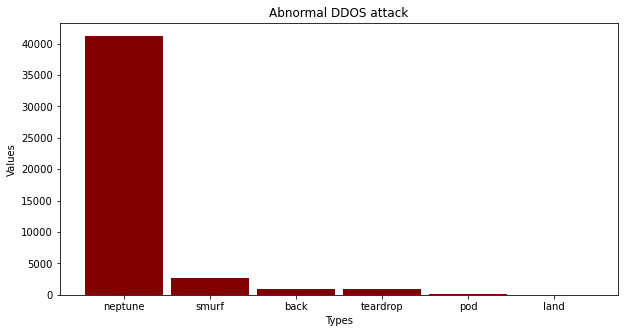

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#Abnormal DDOS attack
Abnormal = {'neptune':41214, 
            'smurf':2646,
            'back':956,
            'teardrop':892,
            'pod':201,
            'land':18}
types = list(Abnormal.keys())
values = list(Abnormal.values())  
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(types, values, color ='maroon',width =0.9)
 
plt.xlabel("Types")
plt.ylabel("Values")
plt.title("Abnormal DDOS attack")
plt.show()

## WE count value of protocol type

In [22]:
data4['protocol_type'].value_counts()

tcp     95788
udp     13326
icmp     4156
Name: protocol_type, dtype: int64

In [12]:
data4['flag'].value_counts()

SF      67992
S0      34698
REJ      8364
RSTO     1435
S1        363
RSTR      236
S2        124
S3         45
OTH        11
SH          2
Name: flag, dtype: int64

# Data Preprocessing

## Check rows With Missing Values


In [23]:
data4.isnull()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125969,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
125971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
null_data = data4[data4.isnull().any(axis=1)]
null_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y


## Let rename the protocol_type and flag

In [24]:
data4.protocol_type[data4.protocol_type == 'tcp'] = 1
data4.protocol_type[data4.protocol_type == 'udp'] = 2
data4.protocol_type[data4.protocol_type == 'icmp'] = 3
data4['protocol_type'].value_counts()

C:\Users\Massi\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


1    95788
2    13326
3     4156
Name: protocol_type, dtype: int64

In [25]:
data4.flag[data4.flag == 'SF'] = 1
data4.flag[data4.flag == 'S0'] = 2
data4.flag[data4.flag == 'REJ'] = 3
data4.flag[data4.flag == 'RSTO'] = 4
data4.flag[data4.flag == 'S1'] = 5
data4.flag[data4.flag == 'RSTR'] = 6
data4.flag[data4.flag == 'S2'] = 7
data4.flag[data4.flag == 'S3'] = 8
data4.flag[data4.flag == 'OTH'] = 9
data4.flag[data4.flag == 'SH'] = 10
data4['flag'].value_counts()

1     67992
2     34698
3      8364
4      1435
5       363
6       236
7       124
8        45
9        11
10        2
Name: flag, dtype: int64

In [26]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113270 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     113270 non-null  object
 1   protocol_type                113270 non-null  object
 2   service                      113270 non-null  object
 3   flag                         113270 non-null  object
 4   src_bytes                    113270 non-null  object
 5   dst_bytes                    113270 non-null  object
 6   land                         113270 non-null  object
 7   wrong_fragment               113270 non-null  object
 8   urgent                       113270 non-null  object
 9   hot                          113270 non-null  object
 10  num_failed_logins            113270 non-null  object
 11  logged_in                    113270 non-null  object
 12  num_compromised              113270 non-null  object
 13  root_shell    

## Let encode y as binary

In [27]:
selec_att2 = ['back' ,'land','neptune','pod','smurf','teardrop']
data4.y[data4.y== 'normal'] = 0
data4.y[data4.y.isin(selec_att2)] = 1
data4 
data4['y'].value_counts()

0    67343
1    45927
Name: y, dtype: int64

In [28]:
data4

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,1,ftp_data,1,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,0
1,0,2,other,1,146,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,0
2,0,1,private,2,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0,1,http,1,232,8153,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,0
4,0,1,http,1,199,420,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,private,2,0,0,0,0,0,0,...,25,0.1,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1
125969,8,2,private,1,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0
125970,0,1,smtp,1,2231,384,0,0,0,0,...,30,0.12,0.06,0.0,0.0,0.72,0.0,0.01,0.0,0
125971,0,1,klogin,2,0,0,0,0,0,0,...,8,0.03,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1


# Features selections


## Dataset with features selected for DDOS attack only
We need to select in our dataset the better feature for our analysis and remove those who don't bring more informations.
Some technique are use to remove those feature as : constant columns, quasiconstant columns or duplicate columns.

### Service Feature
This columns has 65 types values. We thing this will not bring more information in our analysis

In [29]:
data4['service'].value_counts()

http        40304
private     16953
domain_u     9034
smtp         7270
ftp_data     6193
            ...  
shell          57
urh_i          10
tim_i           8
red_i           8
tftp_u          3
Name: service, Length: 65, dtype: int64

In [30]:
data4 =data4.drop(['service'], axis=1)
data4

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,1,1,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,0
1,0,2,1,146,0,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,0
2,0,1,2,0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0,1,1,232,8153,0,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,0
4,0,1,1,199,420,0,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,2,0,0,0,0,0,0,0,...,25,0.1,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1
125969,8,2,1,105,145,0,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0
125970,0,1,1,2231,384,0,0,0,0,0,...,30,0.12,0.06,0.0,0.0,0.72,0.0,0.01,0.0,0
125971,0,1,2,0,0,0,0,0,0,0,...,8,0.03,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1


In [31]:
data4

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,y
0,0,1,1,491,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,0
1,0,2,1,146,0,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,0
2,0,1,2,0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0,1,1,232,8153,0,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,0
4,0,1,1,199,420,0,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,2,0,0,0,0,0,0,0,...,25,0.1,0.06,0.0,0.0,1.0,1.0,0.0,0.0,1
125969,8,2,1,105,145,0,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0
125970,0,1,1,2231,384,0,0,0,0,0,...,30,0.12,0.06,0.0,0.0,0.72,0.0,0.01,0.0,0
125971,0,1,2,0,0,0,0,0,0,0,...,8,0.03,0.05,0.0,0.0,1.0,1.0,0.0,0.0,1


In [32]:
from sklearn import preprocessing
#create database x_array
x_array = data4.iloc[:,0:40]
y_array = data4.iloc[:, [40]]

## Splitting the dataset into the Training set and Test set x_array

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.3, random_state=0) 

In [35]:
y_test
y_train
X_train

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
50385,0,1,2,0,0,0,0,0,0,0,...,255,63,0.25,0.03,0.01,0.0,1.0,1.0,0.0,0.0
62238,0,1,1,360,3200,0,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79441,0,2,1,43,136,0,0,0,0,0,...,255,254,1.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0
49835,0,1,2,0,0,0,0,0,0,0,...,255,5,0.02,0.08,0.0,0.0,1.0,1.0,0.0,0.0
124232,0,1,1,319,453,0,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23594,0,1,1,328,1579,0,0,0,0,0,...,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51115,0,1,2,0,0,0,0,0,0,0,...,255,1,0.0,0.07,0.0,0.0,1.0,1.0,0.0,0.0
47487,0,1,3,0,0,0,0,0,0,0,...,255,18,0.07,0.08,0.0,0.0,0.0,0.0,1.0,1.0
48537,0,3,1,1032,0,0,0,0,0,0,...,255,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## We use information gain with 50 percent mutual information  

In [36]:
y_train=y_train.astype('int')
y_test = y_test.astype('int') 

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


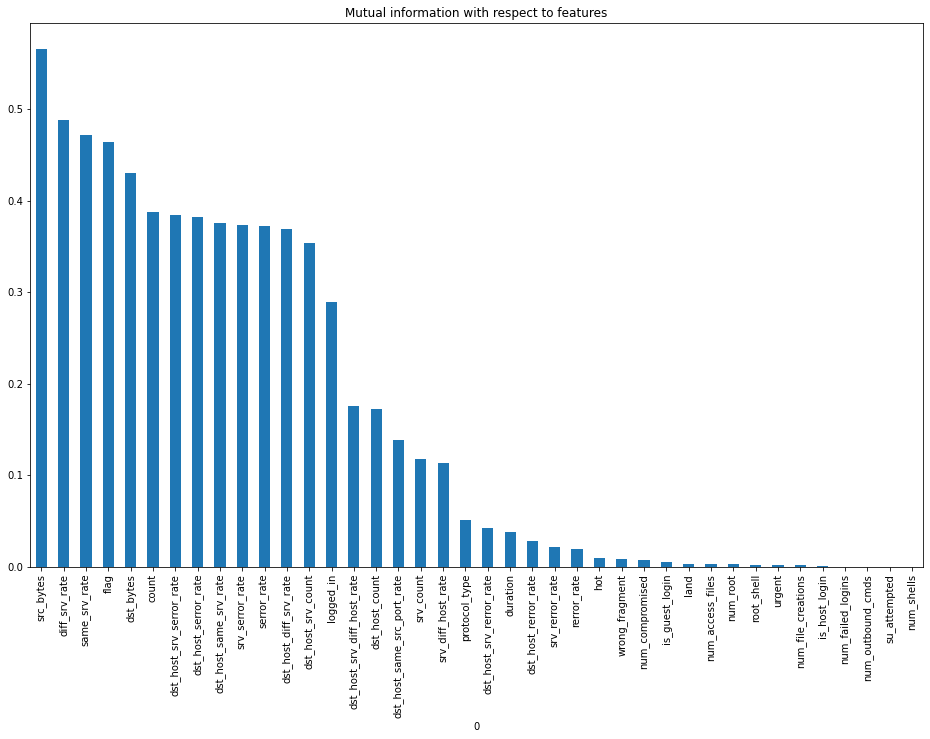

In [37]:
mi = mutual_info_classif(X_train, y_train) 
len(mi)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False, inplace = True)
#mi[79]
mi=mi[:78]
plt.title('Mutual information with respect to features')
mi.plot.bar(figsize = (16,10))
plt.show()

In [36]:
sel = SelectPercentile(mutual_info_classif, percentile=50).fit(X_train, y_train)
X_train.columns[sel.get_support()]

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object', name=0)

In [37]:
X_train_mi = sel.transform(X_train)
X_train_mi = pd.DataFrame(X_train_mi)
X_test_mi = sel.transform(X_test)
X_test_mi = pd.DataFrame(X_test_mi)
X_test_mi

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,2,0,0,0,297,24,1.0,1.0,0.08,0.05,0.0,255,24,0.09,0.05,0.0,0.0,1.0,1.0
1,2,1,44,72,0,200,200,0.0,0.0,1.0,0.0,0.0,255,250,0.98,0.01,0.01,0.0,0.0,0.0
2,1,1,221,10131,1,1,5,0.0,0.0,1.0,0.0,0.4,161,255,1.0,0.0,0.01,0.02,0.0,0.0
3,1,2,0,0,0,221,14,1.0,1.0,0.06,0.07,0.0,255,17,0.07,0.08,0.0,0.0,1.0,1.0
4,1,2,0,0,0,295,15,1.0,1.0,0.05,0.06,0.0,255,3,0.01,0.08,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33976,1,2,0,0,0,15,5,1.0,1.0,0.33,0.2,0.0,255,5,0.02,0.08,0.0,0.0,1.0,1.0
33977,1,1,866,331,1,3,3,0.33,0.33,1.0,0.0,0.0,69,46,0.67,0.06,0.01,0.0,0.01,0.02
33978,1,1,814,402,1,1,2,0.0,0.0,1.0,0.0,1.0,28,172,0.89,0.07,0.04,0.02,0.04,0.0
33979,1,1,225,398,1,3,4,0.0,0.0,1.0,0.0,0.5,255,255,1.0,0.0,0.0,0.0,0.0,0.0


## Scale preprocessing

In [38]:
X_train_mi= preprocessing.scale(X_train_mi)
X_train = pd.DataFrame(X_train_mi)
X_test_mi= preprocessing.scale(X_test_mi)
X_test = pd.DataFrame(X_test_mi)
X_test
X_train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.399438,0.611697,-0.039115,-0.053910,-0.871793,-0.597812,-0.350281,1.496051,1.501332,-1.143876,1.307989,-0.349216,0.713877,-0.545395,-0.637020,-0.194137,-0.353019,-0.281982,1.499678,1.515101
1,-0.399438,-0.673161,-0.037253,0.009946,1.147062,-0.661731,-0.205515,-0.677935,-0.675257,0.783071,-0.361586,0.286325,0.713877,1.171692,1.049421,-0.475554,-0.396053,-0.281982,-0.679626,-0.667349
2,1.693546,-0.673161,-0.038892,-0.051196,-0.871793,-0.095596,1.650119,-0.677935,-0.675257,0.783071,-0.361586,-0.303820,0.713877,1.162749,1.049421,-0.381748,-0.396053,-0.281982,-0.679626,-0.667349
3,-0.399438,0.611697,-0.039115,-0.053910,-0.871793,1.657596,-0.323960,1.496051,1.501332,-1.438585,0.139287,-0.349216,0.713877,-1.064098,-1.154195,0.274891,-0.396053,-0.281982,1.499678,1.515101
4,-0.399438,-0.673161,-0.037465,-0.044871,1.147062,-0.698256,-0.271318,-0.677935,-0.675257,0.783071,-0.361586,-0.349216,0.713877,1.171692,1.049421,-0.475554,-0.396053,-0.281982,-0.679626,-0.667349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79284,-0.399438,-0.673161,-0.037418,-0.022401,1.147062,-0.479107,0.057696,-0.677935,-0.675257,0.783071,-0.361586,-0.076841,0.713877,1.171692,1.049421,-0.475554,-0.396053,-0.281982,-0.679626,-0.667349
79285,-0.399438,0.611697,-0.039115,-0.053910,-0.871793,0.917968,-0.376602,1.496051,1.501332,-1.461255,0.222765,-0.349216,0.713877,-1.099871,-1.199167,0.181085,-0.396053,-0.281982,1.499678,1.515101
79286,-0.399438,1.896555,-0.039115,-0.053910,-0.871793,1.611940,-0.152873,-0.677935,-0.675257,-1.325235,0.139287,-0.349216,0.713877,-0.947837,-1.041766,0.274891,-0.396053,-0.281982,-0.679626,-0.667349
79287,3.786529,-0.673161,-0.033776,-0.053910,-0.871793,3.118590,5.229782,-0.677935,-0.675257,0.783071,-0.361586,-0.349216,0.713877,1.171692,1.049421,-0.475554,3.907345,-0.281982,-0.679626,-0.667349


# Machine Learning Algorithm

## List here some machine learning  models for classification  that we want to evaluate

<ipython-input-70-bd9bb7552784>:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.6132838939407316
Precision: 0.989010989010989
Recall: 0.05197430159532231
              precision    recall  f1-score   support

           0       0.61      1.00      0.75     20128
           1       0.99      0.05      0.10     13853

    accuracy                           0.61     33981
   macro avg       0.80      0.53      0.43     33981
weighted avg       0.76      0.61      0.49     33981

0.5257884226577565
RandomForestClassifier()


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8986198169565346
Precision: 0.9877225866916589
Recall: 0.7607738396015303
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     20128
           1       0.99      0.76      0.86     13853

    accuracy                           0.90     33981
   macro avg       0.92      0.88      0.89     33981
weighted avg       0.91      0.90      0.90     33981

0.8771327465098271
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delt

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.6111356346193461
Precision: 0.7780678851174935
Recall: 0.06453475781419188
              precision    recall  f1-score   support

           0       0.61      0.99      0.75     20128
           1       0.78      0.06      0.12     13853

    accuracy                           0.61     33981
   macro avg       0.69      0.53      0.43     33981
weighted avg       0.68      0.61      0.49     33981

0.5259329194476365
GradientBoostingClassifier()
Learning rate set to 0.066665
0:	learn: 0.4765858	total: 22ms	remaining: 22s
1:	learn: 0.3440422	total: 43.8ms	remaining: 21.9s
2:	learn: 0.2336717	total: 64.8ms	remaining: 21.5s
3:	learn: 0.1759710	total: 87.3ms	remaining: 21.7s
4:	learn: 0.1400740	total: 108ms	remaining: 21.5s
5:	learn: 0.1060272	total: 130ms	remaining: 21.5s
6:	learn: 0.0790957	total: 152ms	remaining: 21.5s
7:	learn: 0.0631835	total: 172ms	remaining: 21.3s
8:	learn: 0.0483877	total: 193ms	remaining: 21.2s
9:	learn: 0.0392373	total: 236ms	remaining: 23.4s
10:	lear

154:	learn: 0.0008982	total: 3.65s	remaining: 19.9s
155:	learn: 0.0008982	total: 3.67s	remaining: 19.8s
156:	learn: 0.0008982	total: 3.68s	remaining: 19.8s
157:	learn: 0.0008982	total: 3.69s	remaining: 19.7s
158:	learn: 0.0008982	total: 3.71s	remaining: 19.6s
159:	learn: 0.0008982	total: 3.72s	remaining: 19.6s
160:	learn: 0.0008951	total: 3.74s	remaining: 19.5s
161:	learn: 0.0008951	total: 3.76s	remaining: 19.4s
162:	learn: 0.0008950	total: 3.77s	remaining: 19.4s
163:	learn: 0.0008950	total: 3.79s	remaining: 19.3s
164:	learn: 0.0008950	total: 3.8s	remaining: 19.2s
165:	learn: 0.0008950	total: 3.81s	remaining: 19.2s
166:	learn: 0.0008950	total: 3.83s	remaining: 19.1s
167:	learn: 0.0008950	total: 3.85s	remaining: 19s
168:	learn: 0.0008857	total: 3.87s	remaining: 19s
169:	learn: 0.0008856	total: 3.88s	remaining: 18.9s
170:	learn: 0.0008856	total: 3.9s	remaining: 18.9s
171:	learn: 0.0008856	total: 3.91s	remaining: 18.8s
172:	learn: 0.0008856	total: 3.93s	remaining: 18.8s
173:	learn: 0.0008

322:	learn: 0.0008659	total: 7.2s	remaining: 15.1s
323:	learn: 0.0008659	total: 7.21s	remaining: 15s
324:	learn: 0.0008659	total: 7.22s	remaining: 15s
325:	learn: 0.0008659	total: 7.24s	remaining: 15s
326:	learn: 0.0008659	total: 7.25s	remaining: 14.9s
327:	learn: 0.0008659	total: 7.27s	remaining: 14.9s
328:	learn: 0.0008659	total: 7.28s	remaining: 14.9s
329:	learn: 0.0008659	total: 7.3s	remaining: 14.8s
330:	learn: 0.0008659	total: 7.31s	remaining: 14.8s
331:	learn: 0.0008659	total: 7.33s	remaining: 14.7s
332:	learn: 0.0008659	total: 7.35s	remaining: 14.7s
333:	learn: 0.0008659	total: 7.36s	remaining: 14.7s
334:	learn: 0.0008659	total: 7.38s	remaining: 14.6s
335:	learn: 0.0008659	total: 7.39s	remaining: 14.6s
336:	learn: 0.0008659	total: 7.41s	remaining: 14.6s
337:	learn: 0.0008659	total: 7.42s	remaining: 14.5s
338:	learn: 0.0008659	total: 7.43s	remaining: 14.5s
339:	learn: 0.0008659	total: 7.45s	remaining: 14.5s
340:	learn: 0.0008659	total: 7.46s	remaining: 14.4s
341:	learn: 0.000865

485:	learn: 0.0008659	total: 10s	remaining: 10.6s
486:	learn: 0.0008659	total: 10s	remaining: 10.6s
487:	learn: 0.0008659	total: 10s	remaining: 10.5s
488:	learn: 0.0008659	total: 10.1s	remaining: 10.5s
489:	learn: 0.0008659	total: 10.1s	remaining: 10.5s
490:	learn: 0.0008659	total: 10.1s	remaining: 10.5s
491:	learn: 0.0008659	total: 10.1s	remaining: 10.4s
492:	learn: 0.0008659	total: 10.1s	remaining: 10.4s
493:	learn: 0.0008659	total: 10.1s	remaining: 10.4s
494:	learn: 0.0008659	total: 10.2s	remaining: 10.4s
495:	learn: 0.0008659	total: 10.2s	remaining: 10.4s
496:	learn: 0.0008659	total: 10.2s	remaining: 10.4s
497:	learn: 0.0008659	total: 10.3s	remaining: 10.3s
498:	learn: 0.0008659	total: 10.3s	remaining: 10.3s
499:	learn: 0.0008659	total: 10.4s	remaining: 10.4s
500:	learn: 0.0008659	total: 10.4s	remaining: 10.4s
501:	learn: 0.0008659	total: 10.4s	remaining: 10.4s
502:	learn: 0.0008659	total: 10.5s	remaining: 10.4s
503:	learn: 0.0008659	total: 10.5s	remaining: 10.3s
504:	learn: 0.0008

653:	learn: 0.0008659	total: 13.5s	remaining: 7.13s
654:	learn: 0.0008659	total: 13.5s	remaining: 7.11s
655:	learn: 0.0008659	total: 13.5s	remaining: 7.09s
656:	learn: 0.0008659	total: 13.5s	remaining: 7.06s
657:	learn: 0.0008659	total: 13.5s	remaining: 7.04s
658:	learn: 0.0008659	total: 13.6s	remaining: 7.02s
659:	learn: 0.0008659	total: 13.6s	remaining: 6.99s
660:	learn: 0.0008659	total: 13.6s	remaining: 6.97s
661:	learn: 0.0008659	total: 13.6s	remaining: 6.95s
662:	learn: 0.0008659	total: 13.6s	remaining: 6.92s
663:	learn: 0.0008659	total: 13.6s	remaining: 6.9s
664:	learn: 0.0008659	total: 13.7s	remaining: 6.88s
665:	learn: 0.0008659	total: 13.7s	remaining: 6.86s
666:	learn: 0.0008659	total: 13.7s	remaining: 6.83s
667:	learn: 0.0008659	total: 13.7s	remaining: 6.81s
668:	learn: 0.0008659	total: 13.7s	remaining: 6.79s
669:	learn: 0.0008659	total: 13.7s	remaining: 6.76s
670:	learn: 0.0008659	total: 13.7s	remaining: 6.74s
671:	learn: 0.0008659	total: 13.8s	remaining: 6.72s
672:	learn: 0

812:	learn: 0.0008659	total: 17.1s	remaining: 3.93s
813:	learn: 0.0008659	total: 17.1s	remaining: 3.91s
814:	learn: 0.0008659	total: 17.1s	remaining: 3.88s
815:	learn: 0.0008659	total: 17.1s	remaining: 3.86s
816:	learn: 0.0008659	total: 17.1s	remaining: 3.84s
817:	learn: 0.0008659	total: 17.2s	remaining: 3.82s
818:	learn: 0.0008659	total: 17.2s	remaining: 3.79s
819:	learn: 0.0008659	total: 17.2s	remaining: 3.77s
820:	learn: 0.0008659	total: 17.2s	remaining: 3.75s
821:	learn: 0.0008659	total: 17.2s	remaining: 3.73s
822:	learn: 0.0008659	total: 17.2s	remaining: 3.71s
823:	learn: 0.0008659	total: 17.2s	remaining: 3.68s
824:	learn: 0.0008659	total: 17.3s	remaining: 3.66s
825:	learn: 0.0008659	total: 17.3s	remaining: 3.64s
826:	learn: 0.0008659	total: 17.3s	remaining: 3.62s
827:	learn: 0.0008659	total: 17.3s	remaining: 3.6s
828:	learn: 0.0008659	total: 17.3s	remaining: 3.57s
829:	learn: 0.0008659	total: 17.3s	remaining: 3.55s
830:	learn: 0.0008659	total: 17.4s	remaining: 3.53s
831:	learn: 0

980:	learn: 0.0008659	total: 21.2s	remaining: 411ms
981:	learn: 0.0008659	total: 21.2s	remaining: 389ms
982:	learn: 0.0008659	total: 21.2s	remaining: 367ms
983:	learn: 0.0008659	total: 21.3s	remaining: 346ms
984:	learn: 0.0008659	total: 21.3s	remaining: 324ms
985:	learn: 0.0008659	total: 21.3s	remaining: 303ms
986:	learn: 0.0008659	total: 21.3s	remaining: 281ms
987:	learn: 0.0008659	total: 21.4s	remaining: 260ms
988:	learn: 0.0008659	total: 21.4s	remaining: 238ms
989:	learn: 0.0008659	total: 21.4s	remaining: 216ms
990:	learn: 0.0008659	total: 21.4s	remaining: 195ms
991:	learn: 0.0008659	total: 21.5s	remaining: 173ms
992:	learn: 0.0008659	total: 21.5s	remaining: 151ms
993:	learn: 0.0008659	total: 21.5s	remaining: 130ms
994:	learn: 0.0008659	total: 21.5s	remaining: 108ms
995:	learn: 0.0008659	total: 21.5s	remaining: 86.4ms
996:	learn: 0.0008659	total: 21.5s	remaining: 64.8ms
997:	learn: 0.0008659	total: 21.6s	remaining: 43.2ms
998:	learn: 0.0008659	total: 21.6s	remaining: 21.6ms
999:	lea

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9585062240663901
Precision: 0.9634264432029795
Recall: 0.9336605789359705
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     20128
           1       0.96      0.93      0.95     13853

    accuracy                           0.96     33981
   macro avg       0.96      0.95      0.96     33981
weighted avg       0.96      0.96      0.96     33981

0.9546333498813397
GaussianNB()


C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9729849033283305
Precision: 0.9845658200344647
Recall: 0.9486031906446257
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20128
           1       0.98      0.95      0.97     13853

    accuracy                           0.97     33981
   macro avg       0.98      0.97      0.97     33981
weighted avg       0.97      0.97      0.97     33981

0.9691843457197692
LogisticRegression()


C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9516494511638857
Precision: 0.9353251568739304
Recall: 0.9468707139247816
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     20128
           1       0.94      0.95      0.94     13853

    accuracy                           0.95     33981
   macro avg       0.95      0.95      0.95     33981
weighted avg       0.95      0.95      0.95     33981

0.9509045541007055
AdaBoostClassifier()


C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.9715134928342309
Precision: 0.9888458911905303
Recall: 0.9407348588753338
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     20128
           1       0.99      0.94      0.96     13853

    accuracy                           0.97     33981
   macro avg       0.97      0.97      0.97     33981
weighted avg       0.97      0.97      0.97     33981

0.9667157998669198
SVC(C=1, kernel='linear', random_state=0)


<ipython-input-70-bd9bb7552784>:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9858450310467615
Precision: 0.9903197418597829
Recall: 0.9748069010322674
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20128
           1       0.99      0.97      0.98     13853

    accuracy                           0.99     33981
   macro avg       0.99      0.98      0.99     33981
weighted avg       0.99      0.99      0.99     33981

0.9841244362077077
ExtraTreesClassifier()


C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy: 0.6111356346193461
Precision: 0.7780678851174935
Recall: 0.06453475781419188
              precision    recall  f1-score   support

           0       0.61      0.99      0.75     20128
           1       0.78      0.06      0.12     13853

    accuracy                           0.61     33981
   macro avg       0.69      0.53      0.43     33981
weighted avg       0.68      0.61      0.49     33981

0.5259329194476365
BaggingClassifier()
[0.5257884226577565, 0.8771327465098271, 0.5259329194476365, 0.5335434949521647, 0.5541217594100996, 0.9546333498813397, 0.9691843457197692, 0.9509045541007055, 0.9667157998669198, 0.9841244362077077, 0.5259329194476365]


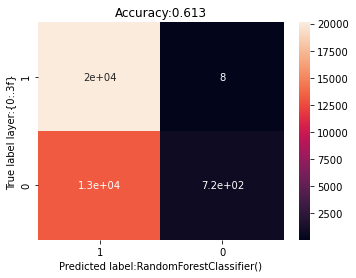

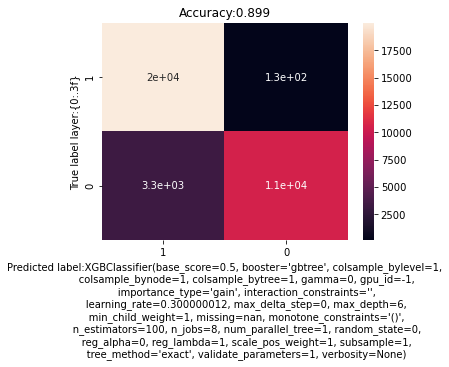

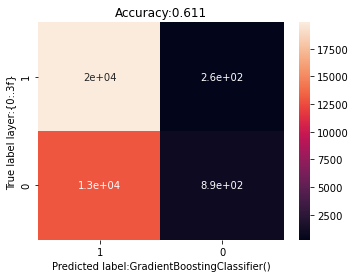

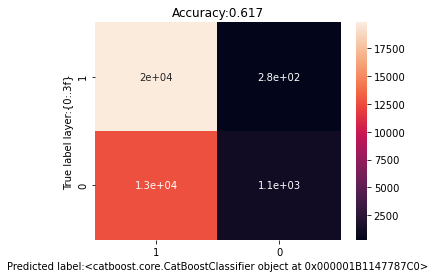

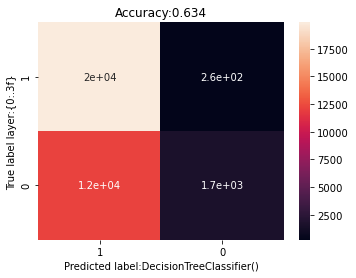

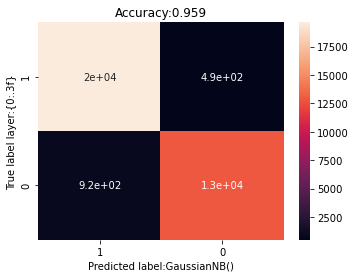

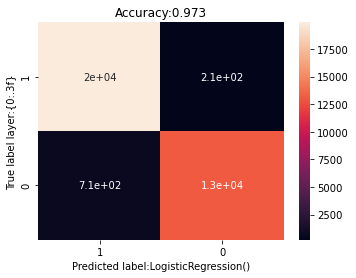

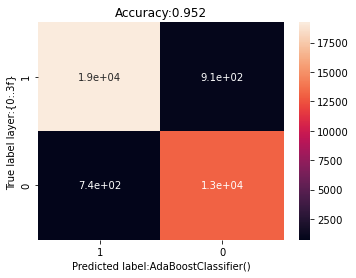

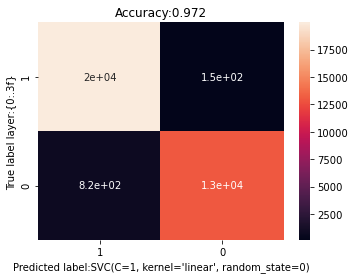

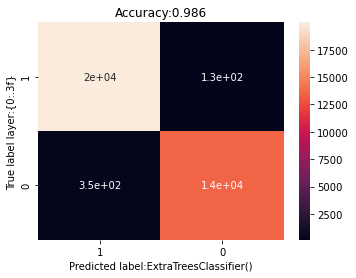

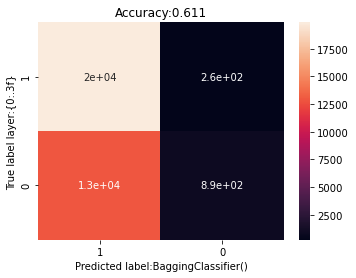

<ipython-input-70-bd9bb7552784>:94: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train) # train the model
C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:27:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Learning rate set to 0.066665
0:	learn: 0.4765858	total: 29ms	remaining: 29s
1:	learn: 0.3440422	total: 55ms	remaining: 27.4s
2:	learn: 0.2336717	total: 81.2ms	remaining: 27s
3:	learn: 0.1759710	total: 111ms	remaining: 27.6s
4:	learn: 0.1400740	total: 134ms	remaining: 26.8s
5:	learn: 0.1060272	total: 161ms	remaining: 26.7s
6:	learn: 0.0790957	total: 192ms	remaining: 27.3s
7:	learn: 0.0631835	total: 226ms	remaining: 28s
8:	learn: 0.0483877	total: 254ms	remaining: 27.9s
9:	learn: 0.0392373	total: 283ms	remaining: 28s
10:	learn: 0.0322863	total: 310ms	remaining: 27.9s
11:	learn: 0.0280521	total: 333ms	remaining: 27.4s
12:	learn: 0.0249214	total: 359ms	remaining: 27.3s
13:	learn: 0.0217011	total: 390ms	remaining: 27.4s
14:	learn: 0.0188959	total: 423ms	remaining: 27.8s
15:	learn: 0.0159326	total: 450ms	remaining: 27.7s
16:	learn: 0.0144761	total: 479ms	remaining: 27.7s
17:	learn: 0.0134449	total: 503ms	remaining: 27.4s
18:	learn: 0.0120988	total: 529ms	remaining: 27.3s
19:	learn: 0.0113673

161:	learn: 0.0008951	total: 3.5s	remaining: 18.1s
162:	learn: 0.0008950	total: 3.52s	remaining: 18.1s
163:	learn: 0.0008950	total: 3.54s	remaining: 18s
164:	learn: 0.0008950	total: 3.56s	remaining: 18s
165:	learn: 0.0008950	total: 3.58s	remaining: 18s
166:	learn: 0.0008950	total: 3.61s	remaining: 18s
167:	learn: 0.0008950	total: 3.63s	remaining: 18s
168:	learn: 0.0008857	total: 3.67s	remaining: 18s
169:	learn: 0.0008856	total: 3.69s	remaining: 18s
170:	learn: 0.0008856	total: 3.71s	remaining: 18s
171:	learn: 0.0008856	total: 3.73s	remaining: 18s
172:	learn: 0.0008856	total: 3.75s	remaining: 17.9s
173:	learn: 0.0008824	total: 3.78s	remaining: 17.9s
174:	learn: 0.0008824	total: 3.79s	remaining: 17.9s
175:	learn: 0.0008824	total: 3.82s	remaining: 17.9s
176:	learn: 0.0008824	total: 3.83s	remaining: 17.8s
177:	learn: 0.0008756	total: 3.86s	remaining: 17.8s
178:	learn: 0.0008756	total: 3.88s	remaining: 17.8s
179:	learn: 0.0008756	total: 3.9s	remaining: 17.8s
180:	learn: 0.0008756	total: 3.9

325:	learn: 0.0008659	total: 6.6s	remaining: 13.7s
326:	learn: 0.0008659	total: 6.62s	remaining: 13.6s
327:	learn: 0.0008659	total: 6.63s	remaining: 13.6s
328:	learn: 0.0008659	total: 6.65s	remaining: 13.6s
329:	learn: 0.0008659	total: 6.66s	remaining: 13.5s
330:	learn: 0.0008659	total: 6.68s	remaining: 13.5s
331:	learn: 0.0008659	total: 6.69s	remaining: 13.5s
332:	learn: 0.0008659	total: 6.71s	remaining: 13.4s
333:	learn: 0.0008659	total: 6.72s	remaining: 13.4s
334:	learn: 0.0008659	total: 6.73s	remaining: 13.4s
335:	learn: 0.0008659	total: 6.75s	remaining: 13.3s
336:	learn: 0.0008659	total: 6.76s	remaining: 13.3s
337:	learn: 0.0008659	total: 6.78s	remaining: 13.3s
338:	learn: 0.0008659	total: 6.79s	remaining: 13.2s
339:	learn: 0.0008659	total: 6.81s	remaining: 13.2s
340:	learn: 0.0008659	total: 6.82s	remaining: 13.2s
341:	learn: 0.0008659	total: 6.84s	remaining: 13.2s
342:	learn: 0.0008659	total: 6.85s	remaining: 13.1s
343:	learn: 0.0008659	total: 6.87s	remaining: 13.1s
344:	learn: 0

486:	learn: 0.0008659	total: 9.26s	remaining: 9.75s
487:	learn: 0.0008659	total: 9.27s	remaining: 9.73s
488:	learn: 0.0008659	total: 9.29s	remaining: 9.7s
489:	learn: 0.0008659	total: 9.3s	remaining: 9.68s
490:	learn: 0.0008659	total: 9.31s	remaining: 9.65s
491:	learn: 0.0008659	total: 9.33s	remaining: 9.63s
492:	learn: 0.0008659	total: 9.34s	remaining: 9.61s
493:	learn: 0.0008659	total: 9.36s	remaining: 9.58s
494:	learn: 0.0008659	total: 9.37s	remaining: 9.56s
495:	learn: 0.0008659	total: 9.38s	remaining: 9.54s
496:	learn: 0.0008659	total: 9.4s	remaining: 9.51s
497:	learn: 0.0008659	total: 9.41s	remaining: 9.49s
498:	learn: 0.0008659	total: 9.43s	remaining: 9.46s
499:	learn: 0.0008659	total: 9.44s	remaining: 9.44s
500:	learn: 0.0008659	total: 9.47s	remaining: 9.43s
501:	learn: 0.0008659	total: 9.49s	remaining: 9.41s
502:	learn: 0.0008659	total: 9.51s	remaining: 9.4s
503:	learn: 0.0008659	total: 9.54s	remaining: 9.39s
504:	learn: 0.0008659	total: 9.56s	remaining: 9.37s
505:	learn: 0.00

648:	learn: 0.0008659	total: 12.2s	remaining: 6.57s
649:	learn: 0.0008659	total: 12.2s	remaining: 6.55s
650:	learn: 0.0008659	total: 12.2s	remaining: 6.54s
651:	learn: 0.0008659	total: 12.2s	remaining: 6.52s
652:	learn: 0.0008659	total: 12.2s	remaining: 6.5s
653:	learn: 0.0008659	total: 12.2s	remaining: 6.48s
654:	learn: 0.0008659	total: 12.3s	remaining: 6.46s
655:	learn: 0.0008659	total: 12.3s	remaining: 6.44s
656:	learn: 0.0008659	total: 12.3s	remaining: 6.43s
657:	learn: 0.0008659	total: 12.3s	remaining: 6.41s
658:	learn: 0.0008659	total: 12.3s	remaining: 6.39s
659:	learn: 0.0008659	total: 12.4s	remaining: 6.37s
660:	learn: 0.0008659	total: 12.4s	remaining: 6.36s
661:	learn: 0.0008659	total: 12.4s	remaining: 6.33s
662:	learn: 0.0008659	total: 12.4s	remaining: 6.32s
663:	learn: 0.0008659	total: 12.4s	remaining: 6.29s
664:	learn: 0.0008659	total: 12.5s	remaining: 6.27s
665:	learn: 0.0008659	total: 12.5s	remaining: 6.25s
666:	learn: 0.0008659	total: 12.5s	remaining: 6.23s
667:	learn: 0

814:	learn: 0.0008659	total: 15s	remaining: 3.39s
815:	learn: 0.0008659	total: 15s	remaining: 3.38s
816:	learn: 0.0008659	total: 15s	remaining: 3.36s
817:	learn: 0.0008659	total: 15s	remaining: 3.34s
818:	learn: 0.0008659	total: 15s	remaining: 3.32s
819:	learn: 0.0008659	total: 15s	remaining: 3.3s
820:	learn: 0.0008659	total: 15s	remaining: 3.28s
821:	learn: 0.0008659	total: 15.1s	remaining: 3.26s
822:	learn: 0.0008659	total: 15.1s	remaining: 3.24s
823:	learn: 0.0008659	total: 15.1s	remaining: 3.22s
824:	learn: 0.0008659	total: 15.1s	remaining: 3.2s
825:	learn: 0.0008659	total: 15.1s	remaining: 3.18s
826:	learn: 0.0008659	total: 15.1s	remaining: 3.17s
827:	learn: 0.0008659	total: 15.1s	remaining: 3.15s
828:	learn: 0.0008659	total: 15.2s	remaining: 3.13s
829:	learn: 0.0008659	total: 15.2s	remaining: 3.11s
830:	learn: 0.0008659	total: 15.2s	remaining: 3.09s
831:	learn: 0.0008659	total: 15.2s	remaining: 3.07s
832:	learn: 0.0008659	total: 15.2s	remaining: 3.05s
833:	learn: 0.0008659	total:

979:	learn: 0.0008659	total: 17.9s	remaining: 364ms
980:	learn: 0.0008659	total: 17.9s	remaining: 346ms
981:	learn: 0.0008659	total: 17.9s	remaining: 328ms
982:	learn: 0.0008659	total: 17.9s	remaining: 310ms
983:	learn: 0.0008659	total: 17.9s	remaining: 292ms
984:	learn: 0.0008659	total: 17.9s	remaining: 273ms
985:	learn: 0.0008659	total: 18s	remaining: 255ms
986:	learn: 0.0008659	total: 18s	remaining: 237ms
987:	learn: 0.0008659	total: 18s	remaining: 219ms
988:	learn: 0.0008659	total: 18s	remaining: 200ms
989:	learn: 0.0008659	total: 18s	remaining: 182ms
990:	learn: 0.0008659	total: 18.1s	remaining: 164ms
991:	learn: 0.0008659	total: 18.1s	remaining: 146ms
992:	learn: 0.0008659	total: 18.1s	remaining: 128ms
993:	learn: 0.0008659	total: 18.1s	remaining: 109ms
994:	learn: 0.0008659	total: 18.1s	remaining: 91.2ms
995:	learn: 0.0008659	total: 18.2s	remaining: 73ms
996:	learn: 0.0008659	total: 18.2s	remaining: 54.7ms
997:	learn: 0.0008659	total: 18.2s	remaining: 36.5ms
998:	learn: 0.000865

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

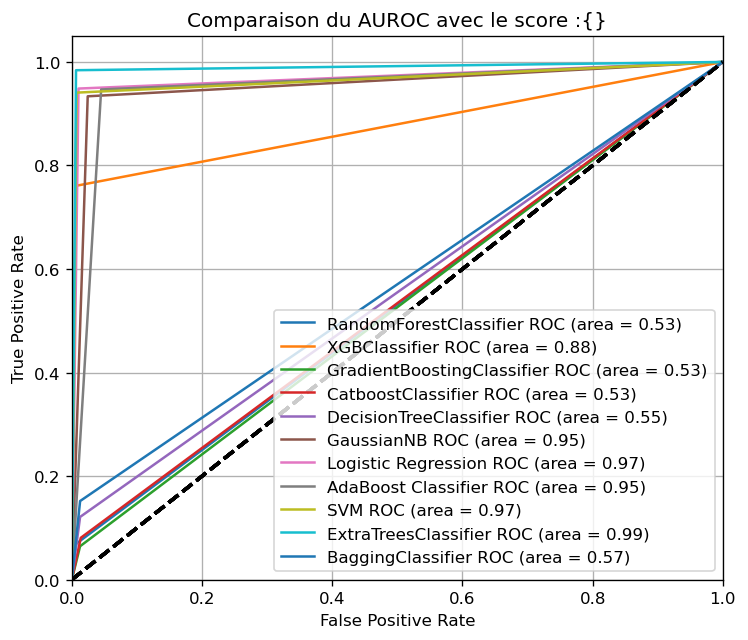

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) 

[23:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[23:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[00:01:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.063732
0:	learn: 0.5023320	total: 17.9ms	remaining: 17.8s
1:	learn: 0.3680344	total: 36.7ms	remaining: 18.3s
2:	learn: 0.2520563	total: 54.4ms	remaining: 18.1s
3:	learn: 0.1978174	total: 71.9ms	remaining: 17.9s
4:	learn: 0.1430761	total: 90.3ms	remaining: 18s
5:	learn: 0.1138237	total: 108ms	remaining: 17.8s
6:	learn: 0.0817299	total: 125ms	remaining: 17.8s
7:	learn: 0.0620758	total: 144ms	remaining: 17.8s
8:	learn: 0.0503685	total: 161ms	remaining: 17.7s
9:	learn: 0.0412868	total: 181ms	remaining: 17.9s
10:	learn: 0.0355952	total: 199ms	remaining: 17.9s
11:	learn: 0.0314806	total: 216ms	remaining: 17.8s
12:	learn: 0.0255183	total: 234ms	remaining: 17.8s
13:	

160:	learn: 0.0009267	total: 3.44s	remaining: 17.9s
161:	learn: 0.0009266	total: 3.46s	remaining: 17.9s
162:	learn: 0.0009206	total: 3.5s	remaining: 18s
163:	learn: 0.0009139	total: 3.53s	remaining: 18s
164:	learn: 0.0009138	total: 3.55s	remaining: 18s
165:	learn: 0.0009041	total: 3.57s	remaining: 18s
166:	learn: 0.0009041	total: 3.59s	remaining: 17.9s
167:	learn: 0.0008937	total: 3.61s	remaining: 17.9s
168:	learn: 0.0008881	total: 3.63s	remaining: 17.9s
169:	learn: 0.0008881	total: 3.65s	remaining: 17.8s
170:	learn: 0.0008881	total: 3.66s	remaining: 17.7s
171:	learn: 0.0008881	total: 3.67s	remaining: 17.7s
172:	learn: 0.0008881	total: 3.69s	remaining: 17.6s
173:	learn: 0.0008805	total: 3.7s	remaining: 17.6s
174:	learn: 0.0008767	total: 3.72s	remaining: 17.5s
175:	learn: 0.0008767	total: 3.73s	remaining: 17.5s
176:	learn: 0.0008767	total: 3.74s	remaining: 17.4s
177:	learn: 0.0008767	total: 3.76s	remaining: 17.4s
178:	learn: 0.0008767	total: 3.77s	remaining: 17.3s
179:	learn: 0.0008767	

321:	learn: 0.0008762	total: 6.04s	remaining: 12.7s
322:	learn: 0.0008762	total: 6.05s	remaining: 12.7s
323:	learn: 0.0008762	total: 6.07s	remaining: 12.7s
324:	learn: 0.0008762	total: 6.08s	remaining: 12.6s
325:	learn: 0.0008762	total: 6.09s	remaining: 12.6s
326:	learn: 0.0008762	total: 6.11s	remaining: 12.6s
327:	learn: 0.0008762	total: 6.12s	remaining: 12.5s
328:	learn: 0.0008762	total: 6.13s	remaining: 12.5s
329:	learn: 0.0008762	total: 6.14s	remaining: 12.5s
330:	learn: 0.0008762	total: 6.16s	remaining: 12.4s
331:	learn: 0.0008762	total: 6.17s	remaining: 12.4s
332:	learn: 0.0008762	total: 6.18s	remaining: 12.4s
333:	learn: 0.0008762	total: 6.2s	remaining: 12.4s
334:	learn: 0.0008762	total: 6.21s	remaining: 12.3s
335:	learn: 0.0008762	total: 6.23s	remaining: 12.3s
336:	learn: 0.0008762	total: 6.24s	remaining: 12.3s
337:	learn: 0.0008762	total: 6.25s	remaining: 12.2s
338:	learn: 0.0008762	total: 6.27s	remaining: 12.2s
339:	learn: 0.0008762	total: 6.28s	remaining: 12.2s
340:	learn: 0

487:	learn: 0.0008757	total: 8.68s	remaining: 9.11s
488:	learn: 0.0008757	total: 8.7s	remaining: 9.09s
489:	learn: 0.0008757	total: 8.71s	remaining: 9.07s
490:	learn: 0.0008757	total: 8.73s	remaining: 9.05s
491:	learn: 0.0008757	total: 8.75s	remaining: 9.04s
492:	learn: 0.0008757	total: 8.77s	remaining: 9.02s
493:	learn: 0.0008757	total: 8.79s	remaining: 9s
494:	learn: 0.0008757	total: 8.81s	remaining: 8.99s
495:	learn: 0.0008757	total: 8.83s	remaining: 8.97s
496:	learn: 0.0008757	total: 8.84s	remaining: 8.95s
497:	learn: 0.0008756	total: 8.86s	remaining: 8.93s
498:	learn: 0.0008756	total: 8.88s	remaining: 8.92s
499:	learn: 0.0008756	total: 8.91s	remaining: 8.91s
500:	learn: 0.0008756	total: 8.92s	remaining: 8.89s
501:	learn: 0.0008756	total: 8.94s	remaining: 8.87s
502:	learn: 0.0008756	total: 8.96s	remaining: 8.85s
503:	learn: 0.0008756	total: 8.98s	remaining: 8.84s
504:	learn: 0.0008756	total: 9.01s	remaining: 8.83s
505:	learn: 0.0008756	total: 9.03s	remaining: 8.81s
506:	learn: 0.00

651:	learn: 0.0008751	total: 11.5s	remaining: 6.14s
652:	learn: 0.0008751	total: 11.5s	remaining: 6.13s
653:	learn: 0.0008751	total: 11.5s	remaining: 6.11s
654:	learn: 0.0008751	total: 11.6s	remaining: 6.08s
655:	learn: 0.0008751	total: 11.6s	remaining: 6.06s
656:	learn: 0.0008751	total: 11.6s	remaining: 6.04s
657:	learn: 0.0008751	total: 11.6s	remaining: 6.02s
658:	learn: 0.0008751	total: 11.6s	remaining: 6s
659:	learn: 0.0008751	total: 11.6s	remaining: 5.98s
660:	learn: 0.0008751	total: 11.6s	remaining: 5.96s
661:	learn: 0.0008751	total: 11.6s	remaining: 5.94s
662:	learn: 0.0008751	total: 11.7s	remaining: 5.93s
663:	learn: 0.0008751	total: 11.7s	remaining: 5.91s
664:	learn: 0.0008751	total: 11.7s	remaining: 5.89s
665:	learn: 0.0008751	total: 11.7s	remaining: 5.87s
666:	learn: 0.0008751	total: 11.7s	remaining: 5.85s
667:	learn: 0.0008751	total: 11.7s	remaining: 5.83s
668:	learn: 0.0008751	total: 11.7s	remaining: 5.81s
669:	learn: 0.0008751	total: 11.8s	remaining: 5.79s
670:	learn: 0.0

816:	learn: 0.0008750	total: 14.1s	remaining: 3.16s
817:	learn: 0.0008750	total: 14.1s	remaining: 3.14s
818:	learn: 0.0008750	total: 14.1s	remaining: 3.12s
819:	learn: 0.0008750	total: 14.1s	remaining: 3.1s
820:	learn: 0.0008750	total: 14.2s	remaining: 3.08s
821:	learn: 0.0008750	total: 14.2s	remaining: 3.07s
822:	learn: 0.0008750	total: 14.2s	remaining: 3.05s
823:	learn: 0.0008750	total: 14.2s	remaining: 3.03s
824:	learn: 0.0008750	total: 14.2s	remaining: 3.01s
825:	learn: 0.0008750	total: 14.2s	remaining: 3s
826:	learn: 0.0008750	total: 14.2s	remaining: 2.98s
827:	learn: 0.0008750	total: 14.2s	remaining: 2.96s
828:	learn: 0.0008750	total: 14.3s	remaining: 2.94s
829:	learn: 0.0008750	total: 14.3s	remaining: 2.92s
830:	learn: 0.0008750	total: 14.3s	remaining: 2.9s
831:	learn: 0.0008750	total: 14.3s	remaining: 2.89s
832:	learn: 0.0008750	total: 14.3s	remaining: 2.87s
833:	learn: 0.0008750	total: 14.3s	remaining: 2.85s
834:	learn: 0.0008750	total: 14.3s	remaining: 2.83s
835:	learn: 0.000

977:	learn: 0.0008749	total: 16.7s	remaining: 376ms
978:	learn: 0.0008749	total: 16.7s	remaining: 359ms
979:	learn: 0.0008749	total: 16.8s	remaining: 342ms
980:	learn: 0.0008749	total: 16.8s	remaining: 325ms
981:	learn: 0.0008749	total: 16.8s	remaining: 308ms
982:	learn: 0.0008748	total: 16.8s	remaining: 291ms
983:	learn: 0.0008748	total: 16.9s	remaining: 274ms
984:	learn: 0.0008748	total: 16.9s	remaining: 257ms
985:	learn: 0.0008748	total: 16.9s	remaining: 240ms
986:	learn: 0.0008748	total: 16.9s	remaining: 223ms
987:	learn: 0.0008748	total: 17s	remaining: 206ms
988:	learn: 0.0008748	total: 17s	remaining: 189ms
989:	learn: 0.0008748	total: 17s	remaining: 172ms
990:	learn: 0.0008748	total: 17s	remaining: 155ms
991:	learn: 0.0008748	total: 17s	remaining: 137ms
992:	learn: 0.0008748	total: 17.1s	remaining: 120ms
993:	learn: 0.0008748	total: 17.1s	remaining: 103ms
994:	learn: 0.0008748	total: 17.1s	remaining: 85.9ms
995:	learn: 0.0008748	total: 17.1s	remaining: 68.7ms
996:	learn: 0.000874

142:	learn: 0.0009697	total: 3.21s	remaining: 19.2s
143:	learn: 0.0009519	total: 3.24s	remaining: 19.2s
144:	learn: 0.0009224	total: 3.26s	remaining: 19.2s
145:	learn: 0.0009224	total: 3.28s	remaining: 19.2s
146:	learn: 0.0009158	total: 3.3s	remaining: 19.2s
147:	learn: 0.0009158	total: 3.33s	remaining: 19.1s
148:	learn: 0.0009158	total: 3.34s	remaining: 19.1s
149:	learn: 0.0009158	total: 3.37s	remaining: 19.1s
150:	learn: 0.0008956	total: 3.4s	remaining: 19.1s
151:	learn: 0.0008956	total: 3.45s	remaining: 19.2s
152:	learn: 0.0008867	total: 3.49s	remaining: 19.3s
153:	learn: 0.0008867	total: 3.52s	remaining: 19.3s
154:	learn: 0.0008867	total: 3.54s	remaining: 19.3s
155:	learn: 0.0008867	total: 3.57s	remaining: 19.3s
156:	learn: 0.0008867	total: 3.59s	remaining: 19.3s
157:	learn: 0.0008833	total: 3.61s	remaining: 19.3s
158:	learn: 0.0008833	total: 3.63s	remaining: 19.2s
159:	learn: 0.0008776	total: 3.67s	remaining: 19.3s
160:	learn: 0.0008776	total: 3.69s	remaining: 19.2s
161:	learn: 0.

313:	learn: 0.0008265	total: 6.44s	remaining: 14.1s
314:	learn: 0.0008265	total: 6.45s	remaining: 14s
315:	learn: 0.0008265	total: 6.47s	remaining: 14s
316:	learn: 0.0008265	total: 6.48s	remaining: 14s
317:	learn: 0.0008264	total: 6.5s	remaining: 13.9s
318:	learn: 0.0008264	total: 6.51s	remaining: 13.9s
319:	learn: 0.0008264	total: 6.53s	remaining: 13.9s
320:	learn: 0.0008264	total: 6.54s	remaining: 13.8s
321:	learn: 0.0008264	total: 6.55s	remaining: 13.8s
322:	learn: 0.0008263	total: 6.57s	remaining: 13.8s
323:	learn: 0.0008263	total: 6.58s	remaining: 13.7s
324:	learn: 0.0008263	total: 6.6s	remaining: 13.7s
325:	learn: 0.0008263	total: 6.61s	remaining: 13.7s
326:	learn: 0.0008262	total: 6.63s	remaining: 13.6s
327:	learn: 0.0008262	total: 6.64s	remaining: 13.6s
328:	learn: 0.0008262	total: 6.66s	remaining: 13.6s
329:	learn: 0.0008262	total: 6.67s	remaining: 13.5s
330:	learn: 0.0008262	total: 6.68s	remaining: 13.5s
331:	learn: 0.0008261	total: 6.7s	remaining: 13.5s
332:	learn: 0.0008261

478:	learn: 0.0008243	total: 9.35s	remaining: 10.2s
479:	learn: 0.0008243	total: 9.37s	remaining: 10.2s
480:	learn: 0.0008243	total: 9.4s	remaining: 10.1s
481:	learn: 0.0008243	total: 9.42s	remaining: 10.1s
482:	learn: 0.0008243	total: 9.44s	remaining: 10.1s
483:	learn: 0.0008242	total: 9.47s	remaining: 10.1s
484:	learn: 0.0008242	total: 9.49s	remaining: 10.1s
485:	learn: 0.0008242	total: 9.51s	remaining: 10.1s
486:	learn: 0.0008242	total: 9.53s	remaining: 10s
487:	learn: 0.0008242	total: 9.54s	remaining: 10s
488:	learn: 0.0008242	total: 9.57s	remaining: 10s
489:	learn: 0.0008242	total: 9.59s	remaining: 9.98s
490:	learn: 0.0008241	total: 9.61s	remaining: 9.96s
491:	learn: 0.0008241	total: 9.62s	remaining: 9.94s
492:	learn: 0.0008241	total: 9.64s	remaining: 9.91s
493:	learn: 0.0008241	total: 9.66s	remaining: 9.9s
494:	learn: 0.0008241	total: 9.68s	remaining: 9.88s
495:	learn: 0.0008241	total: 9.7s	remaining: 9.85s
496:	learn: 0.0008241	total: 9.71s	remaining: 9.83s
497:	learn: 0.0008240

648:	learn: 0.0008220	total: 12.2s	remaining: 6.59s
649:	learn: 0.0008220	total: 12.2s	remaining: 6.57s
650:	learn: 0.0008220	total: 12.2s	remaining: 6.55s
651:	learn: 0.0008220	total: 12.2s	remaining: 6.52s
652:	learn: 0.0008220	total: 12.2s	remaining: 6.5s
653:	learn: 0.0008220	total: 12.3s	remaining: 6.48s
654:	learn: 0.0008220	total: 12.3s	remaining: 6.46s
655:	learn: 0.0008219	total: 12.3s	remaining: 6.44s
656:	learn: 0.0008219	total: 12.3s	remaining: 6.42s
657:	learn: 0.0008219	total: 12.3s	remaining: 6.39s
658:	learn: 0.0008219	total: 12.3s	remaining: 6.37s
659:	learn: 0.0008219	total: 12.3s	remaining: 6.35s
660:	learn: 0.0008219	total: 12.3s	remaining: 6.33s
661:	learn: 0.0008219	total: 12.4s	remaining: 6.31s
662:	learn: 0.0008219	total: 12.4s	remaining: 6.29s
663:	learn: 0.0008219	total: 12.4s	remaining: 6.27s
664:	learn: 0.0008219	total: 12.4s	remaining: 6.25s
665:	learn: 0.0008219	total: 12.4s	remaining: 6.22s
666:	learn: 0.0008219	total: 12.4s	remaining: 6.2s
667:	learn: 0.

818:	learn: 0.0008211	total: 14.8s	remaining: 3.28s
819:	learn: 0.0008211	total: 14.9s	remaining: 3.26s
820:	learn: 0.0008211	total: 14.9s	remaining: 3.24s
821:	learn: 0.0008211	total: 14.9s	remaining: 3.23s
822:	learn: 0.0008211	total: 14.9s	remaining: 3.21s
823:	learn: 0.0008211	total: 14.9s	remaining: 3.19s
824:	learn: 0.0008211	total: 15s	remaining: 3.17s
825:	learn: 0.0008211	total: 15s	remaining: 3.15s
826:	learn: 0.0008211	total: 15s	remaining: 3.13s
827:	learn: 0.0008211	total: 15s	remaining: 3.12s
828:	learn: 0.0008211	total: 15s	remaining: 3.1s
829:	learn: 0.0008211	total: 15.1s	remaining: 3.08s
830:	learn: 0.0008211	total: 15.1s	remaining: 3.07s
831:	learn: 0.0008211	total: 15.1s	remaining: 3.05s
832:	learn: 0.0008211	total: 15.1s	remaining: 3.03s
833:	learn: 0.0008211	total: 15.1s	remaining: 3.01s
834:	learn: 0.0008211	total: 15.2s	remaining: 2.99s
835:	learn: 0.0008211	total: 15.2s	remaining: 2.98s
836:	learn: 0.0008211	total: 15.2s	remaining: 2.96s
837:	learn: 0.0008210	t

978:	learn: 0.0008205	total: 17.6s	remaining: 378ms
979:	learn: 0.0008205	total: 17.6s	remaining: 360ms
980:	learn: 0.0008205	total: 17.7s	remaining: 342ms
981:	learn: 0.0008205	total: 17.7s	remaining: 324ms
982:	learn: 0.0008205	total: 17.7s	remaining: 306ms
983:	learn: 0.0008205	total: 17.7s	remaining: 288ms
984:	learn: 0.0008205	total: 17.8s	remaining: 271ms
985:	learn: 0.0008205	total: 17.8s	remaining: 253ms
986:	learn: 0.0008205	total: 17.8s	remaining: 234ms
987:	learn: 0.0008205	total: 17.8s	remaining: 216ms
988:	learn: 0.0008205	total: 17.8s	remaining: 198ms
989:	learn: 0.0008205	total: 17.8s	remaining: 180ms
990:	learn: 0.0008205	total: 17.9s	remaining: 162ms
991:	learn: 0.0008205	total: 17.9s	remaining: 144ms
992:	learn: 0.0008205	total: 17.9s	remaining: 126ms
993:	learn: 0.0008205	total: 17.9s	remaining: 108ms
994:	learn: 0.0008205	total: 17.9s	remaining: 90ms
995:	learn: 0.0008205	total: 17.9s	remaining: 72ms
996:	learn: 0.0008205	total: 17.9s	remaining: 54ms
997:	learn: 0.0

146:	learn: 0.0010383	total: 3.06s	remaining: 17.7s
147:	learn: 0.0010383	total: 3.1s	remaining: 17.8s
148:	learn: 0.0010382	total: 3.12s	remaining: 17.8s
149:	learn: 0.0010232	total: 3.16s	remaining: 17.9s
150:	learn: 0.0010216	total: 3.19s	remaining: 17.9s
151:	learn: 0.0010189	total: 3.21s	remaining: 17.9s
152:	learn: 0.0010158	total: 3.24s	remaining: 17.9s
153:	learn: 0.0010158	total: 3.27s	remaining: 17.9s
154:	learn: 0.0010080	total: 3.29s	remaining: 17.9s
155:	learn: 0.0010080	total: 3.32s	remaining: 18s
156:	learn: 0.0010080	total: 3.35s	remaining: 18s
157:	learn: 0.0010080	total: 3.38s	remaining: 18s
158:	learn: 0.0009995	total: 3.41s	remaining: 18s
159:	learn: 0.0009965	total: 3.44s	remaining: 18s
160:	learn: 0.0009708	total: 3.46s	remaining: 18s
161:	learn: 0.0009708	total: 3.48s	remaining: 18s
162:	learn: 0.0009708	total: 3.51s	remaining: 18s
163:	learn: 0.0009708	total: 3.52s	remaining: 18s
164:	learn: 0.0009708	total: 3.54s	remaining: 17.9s
165:	learn: 0.0009708	total: 3.

308:	learn: 0.0008679	total: 5.95s	remaining: 13.3s
309:	learn: 0.0008679	total: 5.97s	remaining: 13.3s
310:	learn: 0.0008679	total: 5.98s	remaining: 13.3s
311:	learn: 0.0008679	total: 6s	remaining: 13.2s
312:	learn: 0.0008679	total: 6.01s	remaining: 13.2s
313:	learn: 0.0008679	total: 6.02s	remaining: 13.2s
314:	learn: 0.0008679	total: 6.04s	remaining: 13.1s
315:	learn: 0.0008679	total: 6.05s	remaining: 13.1s
316:	learn: 0.0008679	total: 6.06s	remaining: 13.1s
317:	learn: 0.0008679	total: 6.08s	remaining: 13s
318:	learn: 0.0008679	total: 6.09s	remaining: 13s
319:	learn: 0.0008678	total: 6.11s	remaining: 13s
320:	learn: 0.0008678	total: 6.12s	remaining: 12.9s
321:	learn: 0.0008678	total: 6.14s	remaining: 12.9s
322:	learn: 0.0008678	total: 6.15s	remaining: 12.9s
323:	learn: 0.0008678	total: 6.16s	remaining: 12.9s
324:	learn: 0.0008678	total: 6.18s	remaining: 12.8s
325:	learn: 0.0008678	total: 6.19s	remaining: 12.8s
326:	learn: 0.0008678	total: 6.2s	remaining: 12.8s
327:	learn: 0.0008678	

471:	learn: 0.0008673	total: 8.7s	remaining: 9.74s
472:	learn: 0.0008673	total: 8.72s	remaining: 9.72s
473:	learn: 0.0008673	total: 8.74s	remaining: 9.7s
474:	learn: 0.0008673	total: 8.76s	remaining: 9.68s
475:	learn: 0.0008673	total: 8.78s	remaining: 9.66s
476:	learn: 0.0008673	total: 8.79s	remaining: 9.64s
477:	learn: 0.0008673	total: 8.81s	remaining: 9.62s
478:	learn: 0.0008673	total: 8.83s	remaining: 9.61s
479:	learn: 0.0008673	total: 8.85s	remaining: 9.59s
480:	learn: 0.0008673	total: 8.87s	remaining: 9.57s
481:	learn: 0.0008673	total: 8.89s	remaining: 9.55s
482:	learn: 0.0008673	total: 8.91s	remaining: 9.54s
483:	learn: 0.0008673	total: 8.93s	remaining: 9.52s
484:	learn: 0.0008673	total: 8.95s	remaining: 9.5s
485:	learn: 0.0008673	total: 8.97s	remaining: 9.49s
486:	learn: 0.0008673	total: 8.99s	remaining: 9.47s
487:	learn: 0.0008673	total: 9.02s	remaining: 9.46s
488:	learn: 0.0008673	total: 9.04s	remaining: 9.45s
489:	learn: 0.0008673	total: 9.06s	remaining: 9.43s
490:	learn: 0.0

632:	learn: 0.0008671	total: 11.6s	remaining: 6.71s
633:	learn: 0.0008671	total: 11.6s	remaining: 6.68s
634:	learn: 0.0008671	total: 11.6s	remaining: 6.66s
635:	learn: 0.0008671	total: 11.6s	remaining: 6.64s
636:	learn: 0.0008671	total: 11.6s	remaining: 6.62s
637:	learn: 0.0008671	total: 11.6s	remaining: 6.6s
638:	learn: 0.0008671	total: 11.7s	remaining: 6.58s
639:	learn: 0.0008671	total: 11.7s	remaining: 6.56s
640:	learn: 0.0008671	total: 11.7s	remaining: 6.54s
641:	learn: 0.0008671	total: 11.7s	remaining: 6.52s
642:	learn: 0.0008671	total: 11.7s	remaining: 6.5s
643:	learn: 0.0008671	total: 11.7s	remaining: 6.48s
644:	learn: 0.0008671	total: 11.7s	remaining: 6.46s
645:	learn: 0.0008671	total: 11.7s	remaining: 6.44s
646:	learn: 0.0008671	total: 11.8s	remaining: 6.42s
647:	learn: 0.0008671	total: 11.8s	remaining: 6.39s
648:	learn: 0.0008671	total: 11.8s	remaining: 6.38s
649:	learn: 0.0008671	total: 11.8s	remaining: 6.36s
650:	learn: 0.0008671	total: 11.8s	remaining: 6.33s
651:	learn: 0.

799:	learn: 0.0008671	total: 14.2s	remaining: 3.55s
800:	learn: 0.0008671	total: 14.2s	remaining: 3.54s
801:	learn: 0.0008671	total: 14.2s	remaining: 3.52s
802:	learn: 0.0008671	total: 14.3s	remaining: 3.5s
803:	learn: 0.0008671	total: 14.3s	remaining: 3.48s
804:	learn: 0.0008671	total: 14.3s	remaining: 3.46s
805:	learn: 0.0008671	total: 14.3s	remaining: 3.44s
806:	learn: 0.0008671	total: 14.3s	remaining: 3.42s
807:	learn: 0.0008671	total: 14.3s	remaining: 3.4s
808:	learn: 0.0008671	total: 14.3s	remaining: 3.39s
809:	learn: 0.0008671	total: 14.4s	remaining: 3.37s
810:	learn: 0.0008671	total: 14.4s	remaining: 3.35s
811:	learn: 0.0008671	total: 14.4s	remaining: 3.33s
812:	learn: 0.0008671	total: 14.4s	remaining: 3.31s
813:	learn: 0.0008671	total: 14.4s	remaining: 3.29s
814:	learn: 0.0008671	total: 14.4s	remaining: 3.27s
815:	learn: 0.0008671	total: 14.4s	remaining: 3.26s
816:	learn: 0.0008671	total: 14.5s	remaining: 3.24s
817:	learn: 0.0008671	total: 14.5s	remaining: 3.22s
818:	learn: 0.

963:	learn: 0.0008671	total: 17s	remaining: 637ms
964:	learn: 0.0008671	total: 17.1s	remaining: 619ms
965:	learn: 0.0008671	total: 17.1s	remaining: 601ms
966:	learn: 0.0008671	total: 17.1s	remaining: 584ms
967:	learn: 0.0008671	total: 17.1s	remaining: 566ms
968:	learn: 0.0008671	total: 17.1s	remaining: 548ms
969:	learn: 0.0008671	total: 17.2s	remaining: 531ms
970:	learn: 0.0008671	total: 17.2s	remaining: 513ms
971:	learn: 0.0008671	total: 17.2s	remaining: 495ms
972:	learn: 0.0008671	total: 17.2s	remaining: 478ms
973:	learn: 0.0008671	total: 17.2s	remaining: 460ms
974:	learn: 0.0008671	total: 17.3s	remaining: 443ms
975:	learn: 0.0008671	total: 17.3s	remaining: 425ms
976:	learn: 0.0008671	total: 17.3s	remaining: 407ms
977:	learn: 0.0008671	total: 17.3s	remaining: 389ms
978:	learn: 0.0008671	total: 17.3s	remaining: 372ms
979:	learn: 0.0008671	total: 17.4s	remaining: 354ms
980:	learn: 0.0008671	total: 17.4s	remaining: 336ms
981:	learn: 0.0008671	total: 17.4s	remaining: 319ms
982:	learn: 0.

131:	learn: 0.0011009	total: 2.75s	remaining: 18.1s
132:	learn: 0.0010737	total: 2.78s	remaining: 18.1s
133:	learn: 0.0010737	total: 2.79s	remaining: 18.1s
134:	learn: 0.0010626	total: 2.82s	remaining: 18.1s
135:	learn: 0.0010449	total: 2.84s	remaining: 18.1s
136:	learn: 0.0010449	total: 2.86s	remaining: 18s
137:	learn: 0.0010350	total: 2.88s	remaining: 18s
138:	learn: 0.0010280	total: 2.91s	remaining: 18s
139:	learn: 0.0010035	total: 2.93s	remaining: 18s
140:	learn: 0.0010035	total: 2.97s	remaining: 18.1s
141:	learn: 0.0009958	total: 3s	remaining: 18.1s
142:	learn: 0.0009958	total: 3.02s	remaining: 18.1s
143:	learn: 0.0009825	total: 3.05s	remaining: 18.1s
144:	learn: 0.0009730	total: 3.07s	remaining: 18.1s
145:	learn: 0.0009730	total: 3.08s	remaining: 18s
146:	learn: 0.0009654	total: 3.1s	remaining: 18s
147:	learn: 0.0009654	total: 3.12s	remaining: 18s
148:	learn: 0.0009608	total: 3.14s	remaining: 18s
149:	learn: 0.0009292	total: 3.17s	remaining: 18s
150:	learn: 0.0009234	total: 3.2s	

297:	learn: 0.0007740	total: 5.58s	remaining: 13.1s
298:	learn: 0.0007740	total: 5.59s	remaining: 13.1s
299:	learn: 0.0007740	total: 5.6s	remaining: 13.1s
300:	learn: 0.0007740	total: 5.61s	remaining: 13s
301:	learn: 0.0007740	total: 5.63s	remaining: 13s
302:	learn: 0.0007740	total: 5.64s	remaining: 13s
303:	learn: 0.0007740	total: 5.65s	remaining: 12.9s
304:	learn: 0.0007740	total: 5.66s	remaining: 12.9s
305:	learn: 0.0007740	total: 5.68s	remaining: 12.9s
306:	learn: 0.0007740	total: 5.69s	remaining: 12.8s
307:	learn: 0.0007740	total: 5.7s	remaining: 12.8s
308:	learn: 0.0007740	total: 5.71s	remaining: 12.8s
309:	learn: 0.0007740	total: 5.73s	remaining: 12.7s
310:	learn: 0.0007740	total: 5.74s	remaining: 12.7s
311:	learn: 0.0007740	total: 5.75s	remaining: 12.7s
312:	learn: 0.0007740	total: 5.76s	remaining: 12.7s
313:	learn: 0.0007740	total: 5.78s	remaining: 12.6s
314:	learn: 0.0007740	total: 5.79s	remaining: 12.6s
315:	learn: 0.0007740	total: 5.8s	remaining: 12.6s
316:	learn: 0.0007740

459:	learn: 0.0007740	total: 7.98s	remaining: 9.37s
460:	learn: 0.0007740	total: 7.99s	remaining: 9.34s
461:	learn: 0.0007740	total: 8.01s	remaining: 9.32s
462:	learn: 0.0007740	total: 8.02s	remaining: 9.3s
463:	learn: 0.0007740	total: 8.04s	remaining: 9.28s
464:	learn: 0.0007740	total: 8.05s	remaining: 9.26s
465:	learn: 0.0007740	total: 8.06s	remaining: 9.24s
466:	learn: 0.0007740	total: 8.07s	remaining: 9.21s
467:	learn: 0.0007740	total: 8.09s	remaining: 9.2s
468:	learn: 0.0007740	total: 8.1s	remaining: 9.17s
469:	learn: 0.0007740	total: 8.12s	remaining: 9.15s
470:	learn: 0.0007740	total: 8.13s	remaining: 9.13s
471:	learn: 0.0007740	total: 8.14s	remaining: 9.11s
472:	learn: 0.0007740	total: 8.15s	remaining: 9.08s
473:	learn: 0.0007740	total: 8.16s	remaining: 9.06s
474:	learn: 0.0007740	total: 8.18s	remaining: 9.04s
475:	learn: 0.0007740	total: 8.19s	remaining: 9.02s
476:	learn: 0.0007740	total: 8.2s	remaining: 8.99s
477:	learn: 0.0007740	total: 8.21s	remaining: 8.97s
478:	learn: 0.00

618:	learn: 0.0007740	total: 10.4s	remaining: 6.38s
619:	learn: 0.0007740	total: 10.4s	remaining: 6.36s
620:	learn: 0.0007740	total: 10.4s	remaining: 6.34s
621:	learn: 0.0007740	total: 10.4s	remaining: 6.32s
622:	learn: 0.0007740	total: 10.4s	remaining: 6.3s
623:	learn: 0.0007740	total: 10.4s	remaining: 6.28s
624:	learn: 0.0007740	total: 10.4s	remaining: 6.26s
625:	learn: 0.0007740	total: 10.5s	remaining: 6.24s
626:	learn: 0.0007740	total: 10.5s	remaining: 6.22s
627:	learn: 0.0007740	total: 10.5s	remaining: 6.21s
628:	learn: 0.0007740	total: 10.5s	remaining: 6.19s
629:	learn: 0.0007740	total: 10.5s	remaining: 6.18s
630:	learn: 0.0007740	total: 10.5s	remaining: 6.17s
631:	learn: 0.0007740	total: 10.6s	remaining: 6.16s
632:	learn: 0.0007740	total: 10.6s	remaining: 6.15s
633:	learn: 0.0007740	total: 10.6s	remaining: 6.13s
634:	learn: 0.0007740	total: 10.6s	remaining: 6.12s
635:	learn: 0.0007740	total: 10.7s	remaining: 6.1s
636:	learn: 0.0007740	total: 10.7s	remaining: 6.08s
637:	learn: 0.

779:	learn: 0.0007740	total: 13s	remaining: 3.66s
780:	learn: 0.0007740	total: 13s	remaining: 3.64s
781:	learn: 0.0007740	total: 13s	remaining: 3.63s
782:	learn: 0.0007740	total: 13s	remaining: 3.61s
783:	learn: 0.0007740	total: 13s	remaining: 3.59s
784:	learn: 0.0007740	total: 13.1s	remaining: 3.58s
785:	learn: 0.0007740	total: 13.1s	remaining: 3.56s
786:	learn: 0.0007740	total: 13.1s	remaining: 3.55s
787:	learn: 0.0007740	total: 13.1s	remaining: 3.53s
788:	learn: 0.0007740	total: 13.1s	remaining: 3.52s
789:	learn: 0.0007740	total: 13.2s	remaining: 3.5s
790:	learn: 0.0007740	total: 13.2s	remaining: 3.48s
791:	learn: 0.0007740	total: 13.2s	remaining: 3.47s
792:	learn: 0.0007740	total: 13.2s	remaining: 3.45s
793:	learn: 0.0007740	total: 13.3s	remaining: 3.44s
794:	learn: 0.0007740	total: 13.3s	remaining: 3.42s
795:	learn: 0.0007740	total: 13.3s	remaining: 3.41s
796:	learn: 0.0007740	total: 13.3s	remaining: 3.39s
797:	learn: 0.0007740	total: 13.3s	remaining: 3.38s
798:	learn: 0.0007740	t

943:	learn: 0.0007740	total: 15.6s	remaining: 925ms
944:	learn: 0.0007740	total: 15.6s	remaining: 908ms
945:	learn: 0.0007740	total: 15.6s	remaining: 891ms
946:	learn: 0.0007740	total: 15.6s	remaining: 875ms
947:	learn: 0.0007740	total: 15.6s	remaining: 858ms
948:	learn: 0.0007740	total: 15.7s	remaining: 841ms
949:	learn: 0.0007740	total: 15.7s	remaining: 825ms
950:	learn: 0.0007740	total: 15.7s	remaining: 808ms
951:	learn: 0.0007740	total: 15.7s	remaining: 791ms
952:	learn: 0.0007740	total: 15.7s	remaining: 775ms
953:	learn: 0.0007740	total: 15.7s	remaining: 758ms
954:	learn: 0.0007740	total: 15.7s	remaining: 741ms
955:	learn: 0.0007740	total: 15.7s	remaining: 725ms
956:	learn: 0.0007740	total: 15.8s	remaining: 708ms
957:	learn: 0.0007740	total: 15.8s	remaining: 692ms
958:	learn: 0.0007740	total: 15.8s	remaining: 675ms
959:	learn: 0.0007740	total: 15.8s	remaining: 658ms
960:	learn: 0.0007740	total: 15.8s	remaining: 642ms
961:	learn: 0.0007740	total: 15.8s	remaining: 625ms
962:	learn: 

109:	learn: 0.0012397	total: 2.68s	remaining: 21.7s
110:	learn: 0.0012213	total: 2.71s	remaining: 21.7s
111:	learn: 0.0012112	total: 2.73s	remaining: 21.7s
112:	learn: 0.0012112	total: 2.75s	remaining: 21.6s
113:	learn: 0.0011893	total: 2.77s	remaining: 21.6s
114:	learn: 0.0011893	total: 2.79s	remaining: 21.5s
115:	learn: 0.0011793	total: 2.83s	remaining: 21.5s
116:	learn: 0.0011515	total: 2.85s	remaining: 21.5s
117:	learn: 0.0011395	total: 2.86s	remaining: 21.4s
118:	learn: 0.0011291	total: 2.88s	remaining: 21.3s
119:	learn: 0.0011201	total: 2.9s	remaining: 21.2s
120:	learn: 0.0011201	total: 2.91s	remaining: 21.1s
121:	learn: 0.0011143	total: 2.93s	remaining: 21.1s
122:	learn: 0.0011057	total: 2.94s	remaining: 21s
123:	learn: 0.0010978	total: 2.96s	remaining: 20.9s
124:	learn: 0.0010977	total: 2.98s	remaining: 20.9s
125:	learn: 0.0010927	total: 3s	remaining: 20.8s
126:	learn: 0.0010869	total: 3.02s	remaining: 20.8s
127:	learn: 0.0010759	total: 3.04s	remaining: 20.7s
128:	learn: 0.0010

280:	learn: 0.0007410	total: 5.7s	remaining: 14.6s
281:	learn: 0.0007410	total: 5.71s	remaining: 14.6s
282:	learn: 0.0007410	total: 5.73s	remaining: 14.5s
283:	learn: 0.0007410	total: 5.74s	remaining: 14.5s
284:	learn: 0.0007410	total: 5.76s	remaining: 14.4s
285:	learn: 0.0007410	total: 5.77s	remaining: 14.4s
286:	learn: 0.0007410	total: 5.79s	remaining: 14.4s
287:	learn: 0.0007410	total: 5.81s	remaining: 14.4s
288:	learn: 0.0007410	total: 5.83s	remaining: 14.3s
289:	learn: 0.0007410	total: 5.85s	remaining: 14.3s
290:	learn: 0.0007410	total: 5.87s	remaining: 14.3s
291:	learn: 0.0007410	total: 5.89s	remaining: 14.3s
292:	learn: 0.0007410	total: 5.91s	remaining: 14.3s
293:	learn: 0.0007410	total: 5.93s	remaining: 14.2s
294:	learn: 0.0007410	total: 5.95s	remaining: 14.2s
295:	learn: 0.0007410	total: 5.97s	remaining: 14.2s
296:	learn: 0.0007410	total: 6s	remaining: 14.2s
297:	learn: 0.0007410	total: 6.01s	remaining: 14.2s
298:	learn: 0.0007410	total: 6.03s	remaining: 14.1s
299:	learn: 0.00

439:	learn: 0.0007408	total: 8.34s	remaining: 10.6s
440:	learn: 0.0007408	total: 8.35s	remaining: 10.6s
441:	learn: 0.0007408	total: 8.37s	remaining: 10.6s
442:	learn: 0.0007408	total: 8.39s	remaining: 10.5s
443:	learn: 0.0007408	total: 8.42s	remaining: 10.5s
444:	learn: 0.0007408	total: 8.44s	remaining: 10.5s
445:	learn: 0.0007408	total: 8.46s	remaining: 10.5s
446:	learn: 0.0007408	total: 8.48s	remaining: 10.5s
447:	learn: 0.0007408	total: 8.51s	remaining: 10.5s
448:	learn: 0.0007408	total: 8.52s	remaining: 10.5s
449:	learn: 0.0007408	total: 8.54s	remaining: 10.4s
450:	learn: 0.0007408	total: 8.56s	remaining: 10.4s
451:	learn: 0.0007408	total: 8.58s	remaining: 10.4s
452:	learn: 0.0007408	total: 8.6s	remaining: 10.4s
453:	learn: 0.0007408	total: 8.61s	remaining: 10.4s
454:	learn: 0.0007408	total: 8.63s	remaining: 10.3s
455:	learn: 0.0007408	total: 8.65s	remaining: 10.3s
456:	learn: 0.0007408	total: 8.66s	remaining: 10.3s
457:	learn: 0.0007408	total: 8.68s	remaining: 10.3s
458:	learn: 0

604:	learn: 0.0007408	total: 10.9s	remaining: 7.13s
605:	learn: 0.0007408	total: 10.9s	remaining: 7.11s
606:	learn: 0.0007408	total: 10.9s	remaining: 7.09s
607:	learn: 0.0007408	total: 11s	remaining: 7.07s
608:	learn: 0.0007408	total: 11s	remaining: 7.05s
609:	learn: 0.0007408	total: 11s	remaining: 7.02s
610:	learn: 0.0007408	total: 11s	remaining: 7s
611:	learn: 0.0007408	total: 11s	remaining: 6.98s
612:	learn: 0.0007408	total: 11s	remaining: 6.96s
613:	learn: 0.0007408	total: 11s	remaining: 6.94s
614:	learn: 0.0007408	total: 11.1s	remaining: 6.92s
615:	learn: 0.0007408	total: 11.1s	remaining: 6.9s
616:	learn: 0.0007408	total: 11.1s	remaining: 6.88s
617:	learn: 0.0007408	total: 11.1s	remaining: 6.86s
618:	learn: 0.0007408	total: 11.1s	remaining: 6.83s
619:	learn: 0.0007408	total: 11.1s	remaining: 6.81s
620:	learn: 0.0007408	total: 11.1s	remaining: 6.79s
621:	learn: 0.0007408	total: 11.1s	remaining: 6.77s
622:	learn: 0.0007408	total: 11.2s	remaining: 6.75s
623:	learn: 0.0007408	total: 1

765:	learn: 0.0007408	total: 13.4s	remaining: 4.09s
766:	learn: 0.0007408	total: 13.4s	remaining: 4.07s
767:	learn: 0.0007408	total: 13.4s	remaining: 4.05s
768:	learn: 0.0007408	total: 13.4s	remaining: 4.03s
769:	learn: 0.0007408	total: 13.4s	remaining: 4.01s
770:	learn: 0.0007408	total: 13.5s	remaining: 4s
771:	learn: 0.0007408	total: 13.5s	remaining: 3.98s
772:	learn: 0.0007408	total: 13.5s	remaining: 3.96s
773:	learn: 0.0007408	total: 13.5s	remaining: 3.94s
774:	learn: 0.0007408	total: 13.5s	remaining: 3.92s
775:	learn: 0.0007408	total: 13.5s	remaining: 3.9s
776:	learn: 0.0007408	total: 13.5s	remaining: 3.88s
777:	learn: 0.0007408	total: 13.5s	remaining: 3.86s
778:	learn: 0.0007408	total: 13.6s	remaining: 3.84s
779:	learn: 0.0007408	total: 13.6s	remaining: 3.83s
780:	learn: 0.0007408	total: 13.6s	remaining: 3.81s
781:	learn: 0.0007408	total: 13.6s	remaining: 3.79s
782:	learn: 0.0007408	total: 13.6s	remaining: 3.77s
783:	learn: 0.0007408	total: 13.6s	remaining: 3.75s
784:	learn: 0.00

925:	learn: 0.0007408	total: 15.8s	remaining: 1.26s
926:	learn: 0.0007408	total: 15.8s	remaining: 1.24s
927:	learn: 0.0007408	total: 15.8s	remaining: 1.23s
928:	learn: 0.0007408	total: 15.8s	remaining: 1.21s
929:	learn: 0.0007408	total: 15.9s	remaining: 1.19s
930:	learn: 0.0007408	total: 15.9s	remaining: 1.18s
931:	learn: 0.0007408	total: 15.9s	remaining: 1.16s
932:	learn: 0.0007408	total: 15.9s	remaining: 1.14s
933:	learn: 0.0007408	total: 15.9s	remaining: 1.13s
934:	learn: 0.0007408	total: 16s	remaining: 1.11s
935:	learn: 0.0007408	total: 16s	remaining: 1.09s
936:	learn: 0.0007408	total: 16s	remaining: 1.08s
937:	learn: 0.0007408	total: 16s	remaining: 1.06s
938:	learn: 0.0007408	total: 16.1s	remaining: 1.04s
939:	learn: 0.0007408	total: 16.1s	remaining: 1.03s
940:	learn: 0.0007408	total: 16.1s	remaining: 1.01s
941:	learn: 0.0007408	total: 16.2s	remaining: 995ms
942:	learn: 0.0007408	total: 16.2s	remaining: 978ms
943:	learn: 0.0007408	total: 16.2s	remaining: 961ms
944:	learn: 0.000740

94:	learn: 0.0014182	total: 2.08s	remaining: 19.9s
95:	learn: 0.0014115	total: 2.1s	remaining: 19.8s
96:	learn: 0.0013789	total: 2.12s	remaining: 19.7s
97:	learn: 0.0013654	total: 2.14s	remaining: 19.7s
98:	learn: 0.0013523	total: 2.15s	remaining: 19.6s
99:	learn: 0.0013523	total: 2.17s	remaining: 19.5s
100:	learn: 0.0013402	total: 2.18s	remaining: 19.4s
101:	learn: 0.0013196	total: 2.2s	remaining: 19.4s
102:	learn: 0.0012968	total: 2.22s	remaining: 19.3s
103:	learn: 0.0012968	total: 2.23s	remaining: 19.2s
104:	learn: 0.0012940	total: 2.24s	remaining: 19.1s
105:	learn: 0.0012940	total: 2.26s	remaining: 19s
106:	learn: 0.0012862	total: 2.27s	remaining: 19s
107:	learn: 0.0012770	total: 2.29s	remaining: 18.9s
108:	learn: 0.0012658	total: 2.31s	remaining: 18.8s
109:	learn: 0.0012494	total: 2.32s	remaining: 18.8s
110:	learn: 0.0012336	total: 2.34s	remaining: 18.7s
111:	learn: 0.0012336	total: 2.35s	remaining: 18.7s
112:	learn: 0.0012299	total: 2.37s	remaining: 18.6s
113:	learn: 0.0012258	to

253:	learn: 0.0007547	total: 5.12s	remaining: 15s
254:	learn: 0.0007547	total: 5.13s	remaining: 15s
255:	learn: 0.0007547	total: 5.15s	remaining: 15s
256:	learn: 0.0007531	total: 5.17s	remaining: 15s
257:	learn: 0.0007531	total: 5.2s	remaining: 14.9s
258:	learn: 0.0007531	total: 5.21s	remaining: 14.9s
259:	learn: 0.0007531	total: 5.23s	remaining: 14.9s
260:	learn: 0.0007531	total: 5.25s	remaining: 14.9s
261:	learn: 0.0007531	total: 5.27s	remaining: 14.8s
262:	learn: 0.0007531	total: 5.29s	remaining: 14.8s
263:	learn: 0.0007531	total: 5.32s	remaining: 14.8s
264:	learn: 0.0007531	total: 5.34s	remaining: 14.8s
265:	learn: 0.0007531	total: 5.36s	remaining: 14.8s
266:	learn: 0.0007531	total: 5.37s	remaining: 14.7s
267:	learn: 0.0007531	total: 5.38s	remaining: 14.7s
268:	learn: 0.0007531	total: 5.4s	remaining: 14.7s
269:	learn: 0.0007519	total: 5.41s	remaining: 14.6s
270:	learn: 0.0007519	total: 5.42s	remaining: 14.6s
271:	learn: 0.0007519	total: 5.44s	remaining: 14.6s
272:	learn: 0.0007519	

418:	learn: 0.0007518	total: 7.73s	remaining: 10.7s
419:	learn: 0.0007518	total: 7.74s	remaining: 10.7s
420:	learn: 0.0007518	total: 7.76s	remaining: 10.7s
421:	learn: 0.0007518	total: 7.77s	remaining: 10.6s
422:	learn: 0.0007518	total: 7.78s	remaining: 10.6s
423:	learn: 0.0007518	total: 7.8s	remaining: 10.6s
424:	learn: 0.0007518	total: 7.81s	remaining: 10.6s
425:	learn: 0.0007518	total: 7.82s	remaining: 10.5s
426:	learn: 0.0007518	total: 7.83s	remaining: 10.5s
427:	learn: 0.0007518	total: 7.85s	remaining: 10.5s
428:	learn: 0.0007518	total: 7.86s	remaining: 10.5s
429:	learn: 0.0007518	total: 7.87s	remaining: 10.4s
430:	learn: 0.0007518	total: 7.89s	remaining: 10.4s
431:	learn: 0.0007518	total: 7.9s	remaining: 10.4s
432:	learn: 0.0007518	total: 7.91s	remaining: 10.4s
433:	learn: 0.0007518	total: 7.93s	remaining: 10.3s
434:	learn: 0.0007518	total: 7.94s	remaining: 10.3s
435:	learn: 0.0007518	total: 7.95s	remaining: 10.3s
436:	learn: 0.0007518	total: 7.96s	remaining: 10.3s
437:	learn: 0.

583:	learn: 0.0007518	total: 10.3s	remaining: 7.35s
584:	learn: 0.0007518	total: 10.3s	remaining: 7.33s
585:	learn: 0.0007518	total: 10.4s	remaining: 7.32s
586:	learn: 0.0007518	total: 10.4s	remaining: 7.3s
587:	learn: 0.0007518	total: 10.4s	remaining: 7.28s
588:	learn: 0.0007518	total: 10.4s	remaining: 7.26s
589:	learn: 0.0007518	total: 10.4s	remaining: 7.25s
590:	learn: 0.0007518	total: 10.4s	remaining: 7.23s
591:	learn: 0.0007518	total: 10.5s	remaining: 7.21s
592:	learn: 0.0007518	total: 10.5s	remaining: 7.19s
593:	learn: 0.0007518	total: 10.5s	remaining: 7.17s
594:	learn: 0.0007518	total: 10.5s	remaining: 7.16s
595:	learn: 0.0007518	total: 10.5s	remaining: 7.14s
596:	learn: 0.0007518	total: 10.6s	remaining: 7.12s
597:	learn: 0.0007518	total: 10.6s	remaining: 7.11s
598:	learn: 0.0007518	total: 10.6s	remaining: 7.1s
599:	learn: 0.0007518	total: 10.6s	remaining: 7.09s
600:	learn: 0.0007518	total: 10.7s	remaining: 7.07s
601:	learn: 0.0007518	total: 10.7s	remaining: 7.05s
602:	learn: 0.

752:	learn: 0.0007518	total: 13.2s	remaining: 4.33s
753:	learn: 0.0007518	total: 13.2s	remaining: 4.31s
754:	learn: 0.0007518	total: 13.2s	remaining: 4.29s
755:	learn: 0.0007518	total: 13.3s	remaining: 4.28s
756:	learn: 0.0007518	total: 13.3s	remaining: 4.26s
757:	learn: 0.0007518	total: 13.3s	remaining: 4.24s
758:	learn: 0.0007518	total: 13.3s	remaining: 4.22s
759:	learn: 0.0007518	total: 13.3s	remaining: 4.2s
760:	learn: 0.0007518	total: 13.3s	remaining: 4.18s
761:	learn: 0.0007518	total: 13.3s	remaining: 4.16s
762:	learn: 0.0007518	total: 13.3s	remaining: 4.14s
763:	learn: 0.0007518	total: 13.4s	remaining: 4.13s
764:	learn: 0.0007518	total: 13.4s	remaining: 4.11s
765:	learn: 0.0007518	total: 13.4s	remaining: 4.09s
766:	learn: 0.0007518	total: 13.4s	remaining: 4.07s
767:	learn: 0.0007518	total: 13.4s	remaining: 4.05s
768:	learn: 0.0007518	total: 13.4s	remaining: 4.03s
769:	learn: 0.0007518	total: 13.4s	remaining: 4.01s
770:	learn: 0.0007518	total: 13.4s	remaining: 4s
771:	learn: 0.00

916:	learn: 0.0007518	total: 15.8s	remaining: 1.43s
917:	learn: 0.0007518	total: 15.8s	remaining: 1.41s
918:	learn: 0.0007518	total: 15.8s	remaining: 1.39s
919:	learn: 0.0007518	total: 15.8s	remaining: 1.38s
920:	learn: 0.0007518	total: 15.8s	remaining: 1.36s
921:	learn: 0.0007518	total: 15.9s	remaining: 1.34s
922:	learn: 0.0007518	total: 15.9s	remaining: 1.32s
923:	learn: 0.0007518	total: 15.9s	remaining: 1.31s
924:	learn: 0.0007518	total: 15.9s	remaining: 1.29s
925:	learn: 0.0007518	total: 15.9s	remaining: 1.27s
926:	learn: 0.0007518	total: 15.9s	remaining: 1.25s
927:	learn: 0.0007518	total: 15.9s	remaining: 1.24s
928:	learn: 0.0007518	total: 16s	remaining: 1.22s
929:	learn: 0.0007518	total: 16s	remaining: 1.2s
930:	learn: 0.0007518	total: 16s	remaining: 1.18s
931:	learn: 0.0007518	total: 16s	remaining: 1.17s
932:	learn: 0.0007518	total: 16s	remaining: 1.15s
933:	learn: 0.0007518	total: 16s	remaining: 1.13s
934:	learn: 0.0007518	total: 16s	remaining: 1.11s
935:	learn: 0.0007518	total

81:	learn: 0.0016824	total: 1.91s	remaining: 21.4s
82:	learn: 0.0016599	total: 1.93s	remaining: 21.3s
83:	learn: 0.0016124	total: 1.94s	remaining: 21.2s
84:	learn: 0.0015952	total: 1.96s	remaining: 21.1s
85:	learn: 0.0015703	total: 1.98s	remaining: 21s
86:	learn: 0.0015486	total: 2s	remaining: 21s
87:	learn: 0.0015094	total: 2.02s	remaining: 20.9s
88:	learn: 0.0015007	total: 2.04s	remaining: 20.9s
89:	learn: 0.0014919	total: 2.05s	remaining: 20.8s
90:	learn: 0.0014860	total: 2.07s	remaining: 20.7s
91:	learn: 0.0014694	total: 2.09s	remaining: 20.6s
92:	learn: 0.0014408	total: 2.1s	remaining: 20.5s
93:	learn: 0.0014093	total: 2.12s	remaining: 20.5s
94:	learn: 0.0013976	total: 2.15s	remaining: 20.4s
95:	learn: 0.0013976	total: 2.16s	remaining: 20.3s
96:	learn: 0.0013837	total: 2.18s	remaining: 20.3s
97:	learn: 0.0013770	total: 2.19s	remaining: 20.2s
98:	learn: 0.0013505	total: 2.21s	remaining: 20.2s
99:	learn: 0.0013505	total: 2.23s	remaining: 20.1s
100:	learn: 0.0013505	total: 2.25s	rema

248:	learn: 0.0008108	total: 4.88s	remaining: 14.7s
249:	learn: 0.0008108	total: 4.9s	remaining: 14.7s
250:	learn: 0.0008108	total: 4.92s	remaining: 14.7s
251:	learn: 0.0008108	total: 4.95s	remaining: 14.7s
252:	learn: 0.0008108	total: 4.99s	remaining: 14.7s
253:	learn: 0.0008108	total: 5.01s	remaining: 14.7s
254:	learn: 0.0008108	total: 5.03s	remaining: 14.7s
255:	learn: 0.0008108	total: 5.05s	remaining: 14.7s
256:	learn: 0.0008108	total: 5.08s	remaining: 14.7s
257:	learn: 0.0008108	total: 5.1s	remaining: 14.7s
258:	learn: 0.0008108	total: 5.13s	remaining: 14.7s
259:	learn: 0.0008108	total: 5.15s	remaining: 14.7s
260:	learn: 0.0008108	total: 5.18s	remaining: 14.7s
261:	learn: 0.0008108	total: 5.2s	remaining: 14.6s
262:	learn: 0.0008108	total: 5.22s	remaining: 14.6s
263:	learn: 0.0008108	total: 5.24s	remaining: 14.6s
264:	learn: 0.0008108	total: 5.26s	remaining: 14.6s
265:	learn: 0.0008108	total: 5.28s	remaining: 14.6s
266:	learn: 0.0008108	total: 5.3s	remaining: 14.6s
267:	learn: 0.00

420:	learn: 0.0008105	total: 7.9s	remaining: 10.9s
421:	learn: 0.0008105	total: 7.92s	remaining: 10.8s
422:	learn: 0.0008105	total: 7.93s	remaining: 10.8s
423:	learn: 0.0008105	total: 7.94s	remaining: 10.8s
424:	learn: 0.0008105	total: 7.96s	remaining: 10.8s
425:	learn: 0.0008105	total: 7.97s	remaining: 10.7s
426:	learn: 0.0008105	total: 7.98s	remaining: 10.7s
427:	learn: 0.0008105	total: 8s	remaining: 10.7s
428:	learn: 0.0008105	total: 8.01s	remaining: 10.7s
429:	learn: 0.0008105	total: 8.02s	remaining: 10.6s
430:	learn: 0.0008105	total: 8.04s	remaining: 10.6s
431:	learn: 0.0008105	total: 8.05s	remaining: 10.6s
432:	learn: 0.0008105	total: 8.06s	remaining: 10.6s
433:	learn: 0.0008105	total: 8.08s	remaining: 10.5s
434:	learn: 0.0008105	total: 8.09s	remaining: 10.5s
435:	learn: 0.0008105	total: 8.1s	remaining: 10.5s
436:	learn: 0.0008105	total: 8.12s	remaining: 10.5s
437:	learn: 0.0008105	total: 8.13s	remaining: 10.4s
438:	learn: 0.0008105	total: 8.14s	remaining: 10.4s
439:	learn: 0.000

592:	learn: 0.0008105	total: 10.5s	remaining: 7.24s
593:	learn: 0.0008105	total: 10.6s	remaining: 7.21s
594:	learn: 0.0008105	total: 10.6s	remaining: 7.19s
595:	learn: 0.0008105	total: 10.6s	remaining: 7.17s
596:	learn: 0.0008105	total: 10.6s	remaining: 7.15s
597:	learn: 0.0008105	total: 10.6s	remaining: 7.13s
598:	learn: 0.0008105	total: 10.6s	remaining: 7.11s
599:	learn: 0.0008105	total: 10.6s	remaining: 7.09s
600:	learn: 0.0008105	total: 10.7s	remaining: 7.08s
601:	learn: 0.0008105	total: 10.7s	remaining: 7.06s
602:	learn: 0.0008105	total: 10.7s	remaining: 7.04s
603:	learn: 0.0008105	total: 10.7s	remaining: 7.02s
604:	learn: 0.0008105	total: 10.7s	remaining: 7.01s
605:	learn: 0.0008105	total: 10.8s	remaining: 6.99s
606:	learn: 0.0008105	total: 10.8s	remaining: 6.98s
607:	learn: 0.0008105	total: 10.8s	remaining: 6.96s
608:	learn: 0.0008105	total: 10.8s	remaining: 6.95s
609:	learn: 0.0008105	total: 10.8s	remaining: 6.93s
610:	learn: 0.0008105	total: 10.9s	remaining: 6.91s
611:	learn: 

751:	learn: 0.0008105	total: 13.2s	remaining: 4.35s
752:	learn: 0.0008105	total: 13.2s	remaining: 4.34s
753:	learn: 0.0008105	total: 13.2s	remaining: 4.32s
754:	learn: 0.0008105	total: 13.3s	remaining: 4.3s
755:	learn: 0.0008105	total: 13.3s	remaining: 4.28s
756:	learn: 0.0008105	total: 13.3s	remaining: 4.27s
757:	learn: 0.0008105	total: 13.3s	remaining: 4.25s
758:	learn: 0.0008105	total: 13.3s	remaining: 4.23s
759:	learn: 0.0008105	total: 13.4s	remaining: 4.22s
760:	learn: 0.0008105	total: 13.4s	remaining: 4.2s
761:	learn: 0.0008105	total: 13.4s	remaining: 4.18s
762:	learn: 0.0008105	total: 13.4s	remaining: 4.17s
763:	learn: 0.0008105	total: 13.4s	remaining: 4.15s
764:	learn: 0.0008105	total: 13.5s	remaining: 4.13s
765:	learn: 0.0008105	total: 13.5s	remaining: 4.12s
766:	learn: 0.0008105	total: 13.5s	remaining: 4.1s
767:	learn: 0.0008105	total: 13.5s	remaining: 4.08s
768:	learn: 0.0008105	total: 13.5s	remaining: 4.06s
769:	learn: 0.0008105	total: 13.5s	remaining: 4.04s
770:	learn: 0.0

915:	learn: 0.0008105	total: 15.8s	remaining: 1.45s
916:	learn: 0.0008105	total: 15.8s	remaining: 1.43s
917:	learn: 0.0008105	total: 15.9s	remaining: 1.42s
918:	learn: 0.0008105	total: 15.9s	remaining: 1.4s
919:	learn: 0.0008105	total: 15.9s	remaining: 1.38s
920:	learn: 0.0008105	total: 15.9s	remaining: 1.36s
921:	learn: 0.0008105	total: 15.9s	remaining: 1.35s
922:	learn: 0.0008105	total: 15.9s	remaining: 1.33s
923:	learn: 0.0008105	total: 15.9s	remaining: 1.31s
924:	learn: 0.0008105	total: 16s	remaining: 1.29s
925:	learn: 0.0008105	total: 16s	remaining: 1.28s
926:	learn: 0.0008105	total: 16s	remaining: 1.26s
927:	learn: 0.0008105	total: 16s	remaining: 1.24s
928:	learn: 0.0008105	total: 16s	remaining: 1.22s
929:	learn: 0.0008105	total: 16s	remaining: 1.21s
930:	learn: 0.0008105	total: 16s	remaining: 1.19s
931:	learn: 0.0008105	total: 16.1s	remaining: 1.17s
932:	learn: 0.0008105	total: 16.1s	remaining: 1.15s
933:	learn: 0.0008105	total: 16.1s	remaining: 1.14s
934:	learn: 0.0008105	total

80:	learn: 0.0017788	total: 1.68s	remaining: 19.1s
81:	learn: 0.0017447	total: 1.72s	remaining: 19.2s
82:	learn: 0.0017075	total: 1.75s	remaining: 19.4s
83:	learn: 0.0016991	total: 1.79s	remaining: 19.5s
84:	learn: 0.0016521	total: 1.82s	remaining: 19.6s
85:	learn: 0.0016279	total: 1.84s	remaining: 19.6s
86:	learn: 0.0016078	total: 1.86s	remaining: 19.6s
87:	learn: 0.0015734	total: 1.89s	remaining: 19.6s
88:	learn: 0.0015340	total: 1.92s	remaining: 19.6s
89:	learn: 0.0014907	total: 1.94s	remaining: 19.6s
90:	learn: 0.0014746	total: 1.97s	remaining: 19.7s
91:	learn: 0.0014521	total: 2s	remaining: 19.7s
92:	learn: 0.0014381	total: 2.02s	remaining: 19.7s
93:	learn: 0.0014090	total: 2.04s	remaining: 19.7s
94:	learn: 0.0014045	total: 2.07s	remaining: 19.7s
95:	learn: 0.0013985	total: 2.09s	remaining: 19.7s
96:	learn: 0.0013824	total: 2.11s	remaining: 19.6s
97:	learn: 0.0013615	total: 2.12s	remaining: 19.6s
98:	learn: 0.0013405	total: 2.14s	remaining: 19.5s
99:	learn: 0.0013137	total: 2.16s	

241:	learn: 0.0007010	total: 4.7s	remaining: 14.7s
242:	learn: 0.0007010	total: 4.71s	remaining: 14.7s
243:	learn: 0.0007009	total: 4.73s	remaining: 14.6s
244:	learn: 0.0007009	total: 4.74s	remaining: 14.6s
245:	learn: 0.0007009	total: 4.75s	remaining: 14.6s
246:	learn: 0.0007009	total: 4.77s	remaining: 14.5s
247:	learn: 0.0007009	total: 4.78s	remaining: 14.5s
248:	learn: 0.0007009	total: 4.79s	remaining: 14.5s
249:	learn: 0.0007009	total: 4.81s	remaining: 14.4s
250:	learn: 0.0007009	total: 4.82s	remaining: 14.4s
251:	learn: 0.0007009	total: 4.83s	remaining: 14.3s
252:	learn: 0.0007009	total: 4.85s	remaining: 14.3s
253:	learn: 0.0007009	total: 4.86s	remaining: 14.3s
254:	learn: 0.0007009	total: 4.87s	remaining: 14.2s
255:	learn: 0.0007008	total: 4.89s	remaining: 14.2s
256:	learn: 0.0007008	total: 4.9s	remaining: 14.2s
257:	learn: 0.0007008	total: 4.91s	remaining: 14.1s
258:	learn: 0.0007008	total: 4.93s	remaining: 14.1s
259:	learn: 0.0007008	total: 4.94s	remaining: 14.1s
260:	learn: 0.

401:	learn: 0.0006993	total: 7.33s	remaining: 10.9s
402:	learn: 0.0006993	total: 7.35s	remaining: 10.9s
403:	learn: 0.0006993	total: 7.37s	remaining: 10.9s
404:	learn: 0.0006993	total: 7.38s	remaining: 10.8s
405:	learn: 0.0006993	total: 7.4s	remaining: 10.8s
406:	learn: 0.0006993	total: 7.42s	remaining: 10.8s
407:	learn: 0.0006993	total: 7.44s	remaining: 10.8s
408:	learn: 0.0006993	total: 7.45s	remaining: 10.8s
409:	learn: 0.0006993	total: 7.47s	remaining: 10.8s
410:	learn: 0.0006992	total: 7.49s	remaining: 10.7s
411:	learn: 0.0006992	total: 7.51s	remaining: 10.7s
412:	learn: 0.0006992	total: 7.53s	remaining: 10.7s
413:	learn: 0.0006992	total: 7.55s	remaining: 10.7s
414:	learn: 0.0006992	total: 7.57s	remaining: 10.7s
415:	learn: 0.0006992	total: 7.58s	remaining: 10.6s
416:	learn: 0.0006992	total: 7.61s	remaining: 10.6s
417:	learn: 0.0006991	total: 7.62s	remaining: 10.6s
418:	learn: 0.0006990	total: 7.65s	remaining: 10.6s
419:	learn: 0.0006990	total: 7.67s	remaining: 10.6s
420:	learn: 0

572:	learn: 0.0006990	total: 10.2s	remaining: 7.58s
573:	learn: 0.0006990	total: 10.2s	remaining: 7.56s
574:	learn: 0.0006990	total: 10.2s	remaining: 7.54s
575:	learn: 0.0006990	total: 10.2s	remaining: 7.52s
576:	learn: 0.0006990	total: 10.2s	remaining: 7.5s
577:	learn: 0.0006990	total: 10.2s	remaining: 7.48s
578:	learn: 0.0006990	total: 10.3s	remaining: 7.46s
579:	learn: 0.0006990	total: 10.3s	remaining: 7.43s
580:	learn: 0.0006990	total: 10.3s	remaining: 7.41s
581:	learn: 0.0006990	total: 10.3s	remaining: 7.39s
582:	learn: 0.0006990	total: 10.3s	remaining: 7.37s
583:	learn: 0.0006990	total: 10.3s	remaining: 7.35s
584:	learn: 0.0006990	total: 10.3s	remaining: 7.33s
585:	learn: 0.0006990	total: 10.3s	remaining: 7.31s
586:	learn: 0.0006990	total: 10.4s	remaining: 7.29s
587:	learn: 0.0006990	total: 10.4s	remaining: 7.27s
588:	learn: 0.0006990	total: 10.4s	remaining: 7.25s
589:	learn: 0.0006990	total: 10.4s	remaining: 7.22s
590:	learn: 0.0006990	total: 10.4s	remaining: 7.21s
591:	learn: 0

741:	learn: 0.0006990	total: 12.8s	remaining: 4.45s
742:	learn: 0.0006990	total: 12.8s	remaining: 4.43s
743:	learn: 0.0006990	total: 12.8s	remaining: 4.41s
744:	learn: 0.0006990	total: 12.8s	remaining: 4.39s
745:	learn: 0.0006990	total: 12.8s	remaining: 4.37s
746:	learn: 0.0006990	total: 12.9s	remaining: 4.35s
747:	learn: 0.0006990	total: 12.9s	remaining: 4.33s
748:	learn: 0.0006990	total: 12.9s	remaining: 4.32s
749:	learn: 0.0006990	total: 12.9s	remaining: 4.3s
750:	learn: 0.0006990	total: 12.9s	remaining: 4.28s
751:	learn: 0.0006990	total: 12.9s	remaining: 4.26s
752:	learn: 0.0006990	total: 12.9s	remaining: 4.24s
753:	learn: 0.0006990	total: 12.9s	remaining: 4.22s
754:	learn: 0.0006990	total: 13s	remaining: 4.21s
755:	learn: 0.0006990	total: 13s	remaining: 4.19s
756:	learn: 0.0006990	total: 13s	remaining: 4.17s
757:	learn: 0.0006990	total: 13s	remaining: 4.16s
758:	learn: 0.0006990	total: 13s	remaining: 4.14s
759:	learn: 0.0006990	total: 13.1s	remaining: 4.12s
760:	learn: 0.0006990	t

906:	learn: 0.0006982	total: 15.7s	remaining: 1.6s
907:	learn: 0.0006982	total: 15.7s	remaining: 1.59s
908:	learn: 0.0006982	total: 15.7s	remaining: 1.57s
909:	learn: 0.0006982	total: 15.7s	remaining: 1.55s
910:	learn: 0.0006982	total: 15.8s	remaining: 1.54s
911:	learn: 0.0006982	total: 15.8s	remaining: 1.52s
912:	learn: 0.0006982	total: 15.8s	remaining: 1.5s
913:	learn: 0.0006982	total: 15.8s	remaining: 1.49s
914:	learn: 0.0006982	total: 15.9s	remaining: 1.47s
915:	learn: 0.0006982	total: 15.9s	remaining: 1.46s
916:	learn: 0.0006982	total: 15.9s	remaining: 1.44s
917:	learn: 0.0006982	total: 15.9s	remaining: 1.42s
918:	learn: 0.0006982	total: 15.9s	remaining: 1.4s
919:	learn: 0.0006982	total: 15.9s	remaining: 1.39s
920:	learn: 0.0006981	total: 16s	remaining: 1.37s
921:	learn: 0.0006981	total: 16s	remaining: 1.35s
922:	learn: 0.0006981	total: 16s	remaining: 1.33s
923:	learn: 0.0006981	total: 16s	remaining: 1.32s
924:	learn: 0.0006981	total: 16s	remaining: 1.3s
925:	learn: 0.0006981	tota

71:	learn: 0.0018428	total: 1.64s	remaining: 21.2s
72:	learn: 0.0017668	total: 1.67s	remaining: 21.3s
73:	learn: 0.0017390	total: 1.7s	remaining: 21.3s
74:	learn: 0.0017157	total: 1.73s	remaining: 21.3s
75:	learn: 0.0016910	total: 1.75s	remaining: 21.3s
76:	learn: 0.0016777	total: 1.78s	remaining: 21.3s
77:	learn: 0.0016652	total: 1.8s	remaining: 21.3s
78:	learn: 0.0016090	total: 1.83s	remaining: 21.3s
79:	learn: 0.0015908	total: 1.87s	remaining: 21.5s
80:	learn: 0.0015597	total: 1.92s	remaining: 21.8s
81:	learn: 0.0015558	total: 1.96s	remaining: 21.9s
82:	learn: 0.0015558	total: 1.99s	remaining: 21.9s
83:	learn: 0.0015371	total: 2.02s	remaining: 22.1s
84:	learn: 0.0014719	total: 2.05s	remaining: 22.1s
85:	learn: 0.0014624	total: 2.08s	remaining: 22.1s
86:	learn: 0.0014501	total: 2.11s	remaining: 22.2s
87:	learn: 0.0014385	total: 2.13s	remaining: 22.1s
88:	learn: 0.0014385	total: 2.15s	remaining: 22s
89:	learn: 0.0014118	total: 2.18s	remaining: 22.1s
90:	learn: 0.0014023	total: 2.21s	r

238:	learn: 0.0007057	total: 4.89s	remaining: 15.6s
239:	learn: 0.0007037	total: 4.91s	remaining: 15.6s
240:	learn: 0.0007037	total: 4.92s	remaining: 15.5s
241:	learn: 0.0007037	total: 4.94s	remaining: 15.5s
242:	learn: 0.0007036	total: 4.95s	remaining: 15.4s
243:	learn: 0.0007036	total: 4.96s	remaining: 15.4s
244:	learn: 0.0007036	total: 4.98s	remaining: 15.4s
245:	learn: 0.0007036	total: 5s	remaining: 15.3s
246:	learn: 0.0007036	total: 5.01s	remaining: 15.3s
247:	learn: 0.0007036	total: 5.02s	remaining: 15.2s
248:	learn: 0.0007036	total: 5.03s	remaining: 15.2s
249:	learn: 0.0007036	total: 5.05s	remaining: 15.1s
250:	learn: 0.0007020	total: 5.06s	remaining: 15.1s
251:	learn: 0.0007019	total: 5.08s	remaining: 15.1s
252:	learn: 0.0007019	total: 5.1s	remaining: 15.1s
253:	learn: 0.0007019	total: 5.11s	remaining: 15s
254:	learn: 0.0007019	total: 5.12s	remaining: 15s
255:	learn: 0.0007019	total: 5.14s	remaining: 14.9s
256:	learn: 0.0007019	total: 5.15s	remaining: 14.9s
257:	learn: 0.000701

400:	learn: 0.0007011	total: 7.57s	remaining: 11.3s
401:	learn: 0.0007011	total: 7.66s	remaining: 11.4s
402:	learn: 0.0007011	total: 7.79s	remaining: 11.5s
403:	learn: 0.0007011	total: 7.83s	remaining: 11.6s
404:	learn: 0.0007010	total: 7.89s	remaining: 11.6s
405:	learn: 0.0007010	total: 7.93s	remaining: 11.6s
406:	learn: 0.0007010	total: 7.97s	remaining: 11.6s
407:	learn: 0.0007010	total: 8s	remaining: 11.6s
408:	learn: 0.0007010	total: 8.04s	remaining: 11.6s
409:	learn: 0.0007010	total: 8.06s	remaining: 11.6s
410:	learn: 0.0007009	total: 8.08s	remaining: 11.6s
411:	learn: 0.0007009	total: 8.12s	remaining: 11.6s
412:	learn: 0.0007009	total: 8.14s	remaining: 11.6s
413:	learn: 0.0007009	total: 8.16s	remaining: 11.6s
414:	learn: 0.0007008	total: 8.19s	remaining: 11.5s
415:	learn: 0.0007008	total: 8.21s	remaining: 11.5s
416:	learn: 0.0007008	total: 8.23s	remaining: 11.5s
417:	learn: 0.0007008	total: 8.25s	remaining: 11.5s
418:	learn: 0.0007008	total: 8.27s	remaining: 11.5s
419:	learn: 0.0

564:	learn: 0.0006756	total: 10.7s	remaining: 8.24s
565:	learn: 0.0006756	total: 10.7s	remaining: 8.21s
566:	learn: 0.0006754	total: 10.7s	remaining: 8.19s
567:	learn: 0.0006753	total: 10.7s	remaining: 8.17s
568:	learn: 0.0006751	total: 10.8s	remaining: 8.15s
569:	learn: 0.0006749	total: 10.8s	remaining: 8.13s
570:	learn: 0.0006749	total: 10.8s	remaining: 8.1s
571:	learn: 0.0006748	total: 10.8s	remaining: 8.08s
572:	learn: 0.0006748	total: 10.8s	remaining: 8.06s
573:	learn: 0.0006748	total: 10.8s	remaining: 8.04s
574:	learn: 0.0006747	total: 10.8s	remaining: 8.02s
575:	learn: 0.0006747	total: 10.9s	remaining: 7.99s
576:	learn: 0.0006746	total: 10.9s	remaining: 7.97s
577:	learn: 0.0006745	total: 10.9s	remaining: 7.95s
578:	learn: 0.0006745	total: 10.9s	remaining: 7.92s
579:	learn: 0.0006743	total: 10.9s	remaining: 7.9s
580:	learn: 0.0006743	total: 10.9s	remaining: 7.88s
581:	learn: 0.0006743	total: 10.9s	remaining: 7.86s
582:	learn: 0.0006741	total: 11s	remaining: 7.84s
583:	learn: 0.00

732:	learn: 0.0006693	total: 13.5s	remaining: 4.91s
733:	learn: 0.0006693	total: 13.5s	remaining: 4.89s
734:	learn: 0.0006693	total: 13.5s	remaining: 4.88s
735:	learn: 0.0006693	total: 13.5s	remaining: 4.86s
736:	learn: 0.0006693	total: 13.6s	remaining: 4.84s
737:	learn: 0.0006693	total: 13.6s	remaining: 4.82s
738:	learn: 0.0006692	total: 13.6s	remaining: 4.8s
739:	learn: 0.0006692	total: 13.6s	remaining: 4.79s
740:	learn: 0.0006692	total: 13.6s	remaining: 4.77s
741:	learn: 0.0006692	total: 13.7s	remaining: 4.75s
742:	learn: 0.0006692	total: 13.7s	remaining: 4.73s
743:	learn: 0.0006691	total: 13.7s	remaining: 4.72s
744:	learn: 0.0006691	total: 13.7s	remaining: 4.7s
745:	learn: 0.0006691	total: 13.8s	remaining: 4.68s
746:	learn: 0.0006690	total: 13.8s	remaining: 4.67s
747:	learn: 0.0006690	total: 13.8s	remaining: 4.65s
748:	learn: 0.0006690	total: 13.8s	remaining: 4.63s
749:	learn: 0.0006689	total: 13.9s	remaining: 4.62s
750:	learn: 0.0006689	total: 13.9s	remaining: 4.6s
751:	learn: 0.0

900:	learn: 0.0006688	total: 16.5s	remaining: 1.81s
901:	learn: 0.0006688	total: 16.5s	remaining: 1.79s
902:	learn: 0.0006688	total: 16.5s	remaining: 1.77s
903:	learn: 0.0006688	total: 16.5s	remaining: 1.75s
904:	learn: 0.0006688	total: 16.5s	remaining: 1.74s
905:	learn: 0.0006688	total: 16.6s	remaining: 1.72s
906:	learn: 0.0006688	total: 16.6s	remaining: 1.7s
907:	learn: 0.0006688	total: 16.6s	remaining: 1.68s
908:	learn: 0.0006688	total: 16.6s	remaining: 1.66s
909:	learn: 0.0006688	total: 16.6s	remaining: 1.64s
910:	learn: 0.0006688	total: 16.6s	remaining: 1.62s
911:	learn: 0.0006688	total: 16.6s	remaining: 1.6s
912:	learn: 0.0006688	total: 16.7s	remaining: 1.59s
913:	learn: 0.0006688	total: 16.7s	remaining: 1.57s
914:	learn: 0.0006688	total: 16.7s	remaining: 1.55s
915:	learn: 0.0006688	total: 16.7s	remaining: 1.53s
916:	learn: 0.0006688	total: 16.7s	remaining: 1.51s
917:	learn: 0.0006688	total: 16.7s	remaining: 1.49s
918:	learn: 0.0006688	total: 16.7s	remaining: 1.48s
919:	learn: 0.

59:	learn: 0.0026886	total: 1.28s	remaining: 20s
60:	learn: 0.0026255	total: 1.3s	remaining: 20s
61:	learn: 0.0025170	total: 1.33s	remaining: 20.2s
62:	learn: 0.0024692	total: 1.36s	remaining: 20.3s
63:	learn: 0.0024568	total: 1.4s	remaining: 20.4s
64:	learn: 0.0024095	total: 1.43s	remaining: 20.5s
65:	learn: 0.0023201	total: 1.46s	remaining: 20.7s
66:	learn: 0.0022836	total: 1.49s	remaining: 20.8s
67:	learn: 0.0022332	total: 1.52s	remaining: 20.8s
68:	learn: 0.0021469	total: 1.54s	remaining: 20.8s
69:	learn: 0.0021094	total: 1.57s	remaining: 20.8s
70:	learn: 0.0020680	total: 1.59s	remaining: 20.8s
71:	learn: 0.0020477	total: 1.61s	remaining: 20.8s
72:	learn: 0.0019998	total: 1.64s	remaining: 20.8s
73:	learn: 0.0019856	total: 1.66s	remaining: 20.8s
74:	learn: 0.0019600	total: 1.69s	remaining: 20.8s
75:	learn: 0.0019495	total: 1.72s	remaining: 20.9s
76:	learn: 0.0019398	total: 1.75s	remaining: 21s
77:	learn: 0.0018799	total: 1.78s	remaining: 21.1s
78:	learn: 0.0018565	total: 1.81s	remai

227:	learn: 0.0008404	total: 4.63s	remaining: 15.7s
228:	learn: 0.0008404	total: 4.64s	remaining: 15.6s
229:	learn: 0.0008404	total: 4.66s	remaining: 15.6s
230:	learn: 0.0008404	total: 4.67s	remaining: 15.6s
231:	learn: 0.0008404	total: 4.69s	remaining: 15.5s
232:	learn: 0.0008404	total: 4.7s	remaining: 15.5s
233:	learn: 0.0008403	total: 4.71s	remaining: 15.4s
234:	learn: 0.0008403	total: 4.73s	remaining: 15.4s
235:	learn: 0.0008403	total: 4.74s	remaining: 15.3s
236:	learn: 0.0008403	total: 4.75s	remaining: 15.3s
237:	learn: 0.0008403	total: 4.77s	remaining: 15.3s
238:	learn: 0.0008403	total: 4.78s	remaining: 15.2s
239:	learn: 0.0008403	total: 4.79s	remaining: 15.2s
240:	learn: 0.0008403	total: 4.81s	remaining: 15.1s
241:	learn: 0.0008403	total: 4.82s	remaining: 15.1s
242:	learn: 0.0008403	total: 4.84s	remaining: 15.1s
243:	learn: 0.0008403	total: 4.85s	remaining: 15s
244:	learn: 0.0008403	total: 4.87s	remaining: 15s
245:	learn: 0.0008403	total: 4.88s	remaining: 15s
246:	learn: 0.00084

388:	learn: 0.0008391	total: 7.49s	remaining: 11.8s
389:	learn: 0.0008391	total: 7.51s	remaining: 11.7s
390:	learn: 0.0008391	total: 7.53s	remaining: 11.7s
391:	learn: 0.0008391	total: 7.54s	remaining: 11.7s
392:	learn: 0.0008391	total: 7.56s	remaining: 11.7s
393:	learn: 0.0008391	total: 7.58s	remaining: 11.7s
394:	learn: 0.0008391	total: 7.6s	remaining: 11.6s
395:	learn: 0.0008391	total: 7.62s	remaining: 11.6s
396:	learn: 0.0008391	total: 7.64s	remaining: 11.6s
397:	learn: 0.0008391	total: 7.65s	remaining: 11.6s
398:	learn: 0.0008391	total: 7.67s	remaining: 11.6s
399:	learn: 0.0008391	total: 7.7s	remaining: 11.5s
400:	learn: 0.0008391	total: 7.71s	remaining: 11.5s
401:	learn: 0.0008391	total: 7.73s	remaining: 11.5s
402:	learn: 0.0008391	total: 7.75s	remaining: 11.5s
403:	learn: 0.0008391	total: 7.77s	remaining: 11.5s
404:	learn: 0.0008391	total: 7.78s	remaining: 11.4s
405:	learn: 0.0008391	total: 7.8s	remaining: 11.4s
406:	learn: 0.0008390	total: 7.82s	remaining: 11.4s
407:	learn: 0.0

549:	learn: 0.0008389	total: 10.1s	remaining: 8.29s
550:	learn: 0.0008389	total: 10.1s	remaining: 8.27s
551:	learn: 0.0008389	total: 10.2s	remaining: 8.25s
552:	learn: 0.0008389	total: 10.2s	remaining: 8.22s
553:	learn: 0.0008389	total: 10.2s	remaining: 8.2s
554:	learn: 0.0008389	total: 10.2s	remaining: 8.18s
555:	learn: 0.0008389	total: 10.2s	remaining: 8.16s
556:	learn: 0.0008389	total: 10.2s	remaining: 8.14s
557:	learn: 0.0008389	total: 10.2s	remaining: 8.12s
558:	learn: 0.0008389	total: 10.3s	remaining: 8.09s
559:	learn: 0.0008389	total: 10.3s	remaining: 8.07s
560:	learn: 0.0008389	total: 10.3s	remaining: 8.05s
561:	learn: 0.0008389	total: 10.3s	remaining: 8.03s
562:	learn: 0.0008389	total: 10.3s	remaining: 8.01s
563:	learn: 0.0008389	total: 10.3s	remaining: 7.98s
564:	learn: 0.0008389	total: 10.3s	remaining: 7.96s
565:	learn: 0.0008389	total: 10.4s	remaining: 7.94s
566:	learn: 0.0008389	total: 10.4s	remaining: 7.92s
567:	learn: 0.0008389	total: 10.4s	remaining: 7.89s
568:	learn: 0

715:	learn: 0.0008389	total: 12.8s	remaining: 5.07s
716:	learn: 0.0008389	total: 12.8s	remaining: 5.05s
717:	learn: 0.0008389	total: 12.8s	remaining: 5.03s
718:	learn: 0.0008389	total: 12.8s	remaining: 5.01s
719:	learn: 0.0008389	total: 12.8s	remaining: 4.99s
720:	learn: 0.0008389	total: 12.9s	remaining: 4.98s
721:	learn: 0.0008389	total: 12.9s	remaining: 4.96s
722:	learn: 0.0008389	total: 12.9s	remaining: 4.94s
723:	learn: 0.0008389	total: 12.9s	remaining: 4.92s
724:	learn: 0.0008389	total: 12.9s	remaining: 4.9s
725:	learn: 0.0008389	total: 12.9s	remaining: 4.89s
726:	learn: 0.0008389	total: 13s	remaining: 4.87s
727:	learn: 0.0008389	total: 13s	remaining: 4.85s
728:	learn: 0.0008389	total: 13s	remaining: 4.83s
729:	learn: 0.0008389	total: 13s	remaining: 4.82s
730:	learn: 0.0008389	total: 13s	remaining: 4.8s
731:	learn: 0.0008389	total: 13.1s	remaining: 4.78s
732:	learn: 0.0008389	total: 13.1s	remaining: 4.76s
733:	learn: 0.0008389	total: 13.1s	remaining: 4.75s
734:	learn: 0.0008389	to

879:	learn: 0.0008389	total: 15.6s	remaining: 2.13s
880:	learn: 0.0008389	total: 15.6s	remaining: 2.11s
881:	learn: 0.0008389	total: 15.7s	remaining: 2.09s
882:	learn: 0.0008389	total: 15.7s	remaining: 2.08s
883:	learn: 0.0008389	total: 15.7s	remaining: 2.06s
884:	learn: 0.0008389	total: 15.7s	remaining: 2.04s
885:	learn: 0.0008389	total: 15.7s	remaining: 2.02s
886:	learn: 0.0008389	total: 15.7s	remaining: 2s
887:	learn: 0.0008389	total: 15.8s	remaining: 1.99s
888:	learn: 0.0008389	total: 15.8s	remaining: 1.97s
889:	learn: 0.0008389	total: 15.8s	remaining: 1.95s
890:	learn: 0.0008389	total: 15.8s	remaining: 1.93s
891:	learn: 0.0008389	total: 15.8s	remaining: 1.91s
892:	learn: 0.0008389	total: 15.8s	remaining: 1.9s
893:	learn: 0.0008389	total: 15.8s	remaining: 1.88s
894:	learn: 0.0008389	total: 15.8s	remaining: 1.86s
895:	learn: 0.0008389	total: 15.9s	remaining: 1.84s
896:	learn: 0.0008389	total: 15.9s	remaining: 1.82s
897:	learn: 0.0008389	total: 15.9s	remaining: 1.8s
898:	learn: 0.000

C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:04:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:05:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:05:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Massi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[00:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.063732
0:	learn: 0.5023320	total: 20.1ms	remaining: 20.1s
1:	learn: 0.3680344	total: 38ms	remaining: 19s
2:	learn: 0.2520563	total: 57.1ms	remaining: 19s
3:	learn: 0.1978174	total: 75.1ms	remaining: 18.7s
4:	learn: 0.1430761	total: 94.7ms	remaining: 18.8s
5:	learn: 0.1138237	total: 112ms	remaining: 18.5s
6:	learn: 0.0817299	total: 129ms	remaining: 18.3s
7:	learn: 0.0620758	total: 147ms	remaining: 18.2s
8:	learn: 0.0503685	total: 168ms	remaining: 18.5s
9:	learn: 0.0412868	total: 187ms	remaining: 18.6s
10:	learn: 0.0355952	total: 206ms	remaining: 18.6s
11:	learn: 0.0314806	total: 224ms	remaining: 18.4s
12:	learn: 0.0255183	total: 242ms	remaining: 18.4s
13:	lear

156:	learn: 0.0009683	total: 3.3s	remaining: 17.7s
157:	learn: 0.0009596	total: 3.33s	remaining: 17.7s
158:	learn: 0.0009435	total: 3.35s	remaining: 17.7s
159:	learn: 0.0009435	total: 3.37s	remaining: 17.7s
160:	learn: 0.0009267	total: 3.4s	remaining: 17.7s
161:	learn: 0.0009266	total: 3.41s	remaining: 17.7s
162:	learn: 0.0009206	total: 3.44s	remaining: 17.6s
163:	learn: 0.0009139	total: 3.46s	remaining: 17.7s
164:	learn: 0.0009138	total: 3.48s	remaining: 17.6s
165:	learn: 0.0009041	total: 3.51s	remaining: 17.6s
166:	learn: 0.0009041	total: 3.53s	remaining: 17.6s
167:	learn: 0.0008937	total: 3.56s	remaining: 17.6s
168:	learn: 0.0008881	total: 3.58s	remaining: 17.6s
169:	learn: 0.0008881	total: 3.6s	remaining: 17.6s
170:	learn: 0.0008881	total: 3.62s	remaining: 17.5s
171:	learn: 0.0008881	total: 3.64s	remaining: 17.5s
172:	learn: 0.0008881	total: 3.66s	remaining: 17.5s
173:	learn: 0.0008805	total: 3.67s	remaining: 17.4s
174:	learn: 0.0008767	total: 3.69s	remaining: 17.4s
175:	learn: 0.0

327:	learn: 0.0008762	total: 6.12s	remaining: 12.5s
328:	learn: 0.0008762	total: 6.14s	remaining: 12.5s
329:	learn: 0.0008762	total: 6.15s	remaining: 12.5s
330:	learn: 0.0008762	total: 6.17s	remaining: 12.5s
331:	learn: 0.0008762	total: 6.18s	remaining: 12.4s
332:	learn: 0.0008762	total: 6.19s	remaining: 12.4s
333:	learn: 0.0008762	total: 6.21s	remaining: 12.4s
334:	learn: 0.0008762	total: 6.22s	remaining: 12.4s
335:	learn: 0.0008762	total: 6.24s	remaining: 12.3s
336:	learn: 0.0008762	total: 6.25s	remaining: 12.3s
337:	learn: 0.0008762	total: 6.26s	remaining: 12.3s
338:	learn: 0.0008762	total: 6.28s	remaining: 12.2s
339:	learn: 0.0008762	total: 6.29s	remaining: 12.2s
340:	learn: 0.0008762	total: 6.31s	remaining: 12.2s
341:	learn: 0.0008762	total: 6.32s	remaining: 12.2s
342:	learn: 0.0008762	total: 6.34s	remaining: 12.1s
343:	learn: 0.0008762	total: 6.35s	remaining: 12.1s
344:	learn: 0.0008762	total: 6.37s	remaining: 12.1s
345:	learn: 0.0008762	total: 6.38s	remaining: 12.1s
346:	learn: 

486:	learn: 0.0008757	total: 8.77s	remaining: 9.24s
487:	learn: 0.0008757	total: 8.79s	remaining: 9.23s
488:	learn: 0.0008757	total: 8.81s	remaining: 9.21s
489:	learn: 0.0008757	total: 8.83s	remaining: 9.19s
490:	learn: 0.0008757	total: 8.85s	remaining: 9.17s
491:	learn: 0.0008757	total: 8.86s	remaining: 9.15s
492:	learn: 0.0008757	total: 8.88s	remaining: 9.14s
493:	learn: 0.0008757	total: 8.91s	remaining: 9.12s
494:	learn: 0.0008757	total: 8.93s	remaining: 9.11s
495:	learn: 0.0008757	total: 8.95s	remaining: 9.1s
496:	learn: 0.0008757	total: 8.99s	remaining: 9.1s
497:	learn: 0.0008756	total: 9.02s	remaining: 9.09s
498:	learn: 0.0008756	total: 9.04s	remaining: 9.08s
499:	learn: 0.0008756	total: 9.06s	remaining: 9.06s
500:	learn: 0.0008756	total: 9.08s	remaining: 9.04s
501:	learn: 0.0008756	total: 9.09s	remaining: 9.02s
502:	learn: 0.0008756	total: 9.11s	remaining: 9s
503:	learn: 0.0008756	total: 9.13s	remaining: 8.98s
504:	learn: 0.0008756	total: 9.15s	remaining: 8.97s
505:	learn: 0.000

656:	learn: 0.0008751	total: 11.8s	remaining: 6.15s
657:	learn: 0.0008751	total: 11.8s	remaining: 6.13s
658:	learn: 0.0008751	total: 11.8s	remaining: 6.11s
659:	learn: 0.0008751	total: 11.8s	remaining: 6.09s
660:	learn: 0.0008751	total: 11.8s	remaining: 6.07s
661:	learn: 0.0008751	total: 11.9s	remaining: 6.05s
662:	learn: 0.0008751	total: 11.9s	remaining: 6.03s
663:	learn: 0.0008751	total: 11.9s	remaining: 6.01s
664:	learn: 0.0008751	total: 11.9s	remaining: 5.99s
665:	learn: 0.0008751	total: 11.9s	remaining: 5.97s
666:	learn: 0.0008751	total: 11.9s	remaining: 5.95s
667:	learn: 0.0008751	total: 11.9s	remaining: 5.93s
668:	learn: 0.0008751	total: 11.9s	remaining: 5.91s
669:	learn: 0.0008751	total: 12s	remaining: 5.89s
670:	learn: 0.0008751	total: 12s	remaining: 5.87s
671:	learn: 0.0008751	total: 12s	remaining: 5.85s
672:	learn: 0.0008751	total: 12s	remaining: 5.83s
673:	learn: 0.0008751	total: 12s	remaining: 5.81s
674:	learn: 0.0008751	total: 12s	remaining: 5.79s
675:	learn: 0.0008751	to

825:	learn: 0.0008750	total: 14.5s	remaining: 3.05s
826:	learn: 0.0008750	total: 14.5s	remaining: 3.03s
827:	learn: 0.0008750	total: 14.5s	remaining: 3.01s
828:	learn: 0.0008750	total: 14.5s	remaining: 2.99s
829:	learn: 0.0008750	total: 14.5s	remaining: 2.97s
830:	learn: 0.0008750	total: 14.5s	remaining: 2.96s
831:	learn: 0.0008750	total: 14.6s	remaining: 2.94s
832:	learn: 0.0008750	total: 14.6s	remaining: 2.92s
833:	learn: 0.0008750	total: 14.6s	remaining: 2.9s
834:	learn: 0.0008750	total: 14.6s	remaining: 2.89s
835:	learn: 0.0008750	total: 14.6s	remaining: 2.87s
836:	learn: 0.0008750	total: 14.7s	remaining: 2.85s
837:	learn: 0.0008750	total: 14.7s	remaining: 2.84s
838:	learn: 0.0008750	total: 14.7s	remaining: 2.82s
839:	learn: 0.0008750	total: 14.7s	remaining: 2.8s
840:	learn: 0.0008750	total: 14.7s	remaining: 2.79s
841:	learn: 0.0008750	total: 14.8s	remaining: 2.77s
842:	learn: 0.0008750	total: 14.8s	remaining: 2.75s
843:	learn: 0.0008750	total: 14.8s	remaining: 2.74s
844:	learn: 0.

990:	learn: 0.0008748	total: 17.3s	remaining: 157ms
991:	learn: 0.0008748	total: 17.4s	remaining: 140ms
992:	learn: 0.0008748	total: 17.4s	remaining: 123ms
993:	learn: 0.0008748	total: 17.4s	remaining: 105ms
994:	learn: 0.0008748	total: 17.4s	remaining: 87.5ms
995:	learn: 0.0008748	total: 17.4s	remaining: 70ms
996:	learn: 0.0008748	total: 17.5s	remaining: 52.5ms
997:	learn: 0.0008748	total: 17.5s	remaining: 35ms
998:	learn: 0.0008748	total: 17.5s	remaining: 17.5ms
999:	learn: 0.0008748	total: 17.5s	remaining: 0us
Learning rate set to 0.063732
0:	learn: 0.4861444	total: 22.4ms	remaining: 22.4s
1:	learn: 0.3565779	total: 42.8ms	remaining: 21.4s
2:	learn: 0.2467209	total: 62.3ms	remaining: 20.7s
3:	learn: 0.1931018	total: 82.1ms	remaining: 20.5s
4:	learn: 0.1402325	total: 101ms	remaining: 20.1s
5:	learn: 0.1109020	total: 122ms	remaining: 20.2s
6:	learn: 0.0832078	total: 140ms	remaining: 19.9s
7:	learn: 0.0650332	total: 158ms	remaining: 19.6s
8:	learn: 0.0531732	total: 177ms	remaining: 19.

150:	learn: 0.0008956	total: 3.31s	remaining: 18.6s
151:	learn: 0.0008956	total: 3.33s	remaining: 18.6s
152:	learn: 0.0008867	total: 3.36s	remaining: 18.6s
153:	learn: 0.0008867	total: 3.38s	remaining: 18.6s
154:	learn: 0.0008867	total: 3.4s	remaining: 18.6s
155:	learn: 0.0008867	total: 3.42s	remaining: 18.5s
156:	learn: 0.0008867	total: 3.44s	remaining: 18.5s
157:	learn: 0.0008833	total: 3.46s	remaining: 18.5s
158:	learn: 0.0008833	total: 3.48s	remaining: 18.4s
159:	learn: 0.0008776	total: 3.51s	remaining: 18.4s
160:	learn: 0.0008776	total: 3.53s	remaining: 18.4s
161:	learn: 0.0008688	total: 3.56s	remaining: 18.4s
162:	learn: 0.0008688	total: 3.58s	remaining: 18.4s
163:	learn: 0.0008688	total: 3.59s	remaining: 18.3s
164:	learn: 0.0008615	total: 3.61s	remaining: 18.3s
165:	learn: 0.0008615	total: 3.63s	remaining: 18.2s
166:	learn: 0.0008615	total: 3.65s	remaining: 18.2s
167:	learn: 0.0008615	total: 3.67s	remaining: 18.2s
168:	learn: 0.0008550	total: 3.7s	remaining: 18.2s
169:	learn: 0.

314:	learn: 0.0008265	total: 6.16s	remaining: 13.4s
315:	learn: 0.0008265	total: 6.17s	remaining: 13.4s
316:	learn: 0.0008265	total: 6.19s	remaining: 13.3s
317:	learn: 0.0008264	total: 6.2s	remaining: 13.3s
318:	learn: 0.0008264	total: 6.22s	remaining: 13.3s
319:	learn: 0.0008264	total: 6.23s	remaining: 13.2s
320:	learn: 0.0008264	total: 6.25s	remaining: 13.2s
321:	learn: 0.0008264	total: 6.26s	remaining: 13.2s
322:	learn: 0.0008263	total: 6.27s	remaining: 13.2s
323:	learn: 0.0008263	total: 6.29s	remaining: 13.1s
324:	learn: 0.0008263	total: 6.3s	remaining: 13.1s
325:	learn: 0.0008263	total: 6.32s	remaining: 13.1s
326:	learn: 0.0008262	total: 6.33s	remaining: 13s
327:	learn: 0.0008262	total: 6.35s	remaining: 13s
328:	learn: 0.0008262	total: 6.36s	remaining: 13s
329:	learn: 0.0008262	total: 6.38s	remaining: 12.9s
330:	learn: 0.0008262	total: 6.39s	remaining: 12.9s
331:	learn: 0.0008261	total: 6.41s	remaining: 12.9s
332:	learn: 0.0008261	total: 6.42s	remaining: 12.9s
333:	learn: 0.000826

477:	learn: 0.0008243	total: 8.98s	remaining: 9.8s
478:	learn: 0.0008243	total: 9.01s	remaining: 9.8s
479:	learn: 0.0008243	total: 9.04s	remaining: 9.8s
480:	learn: 0.0008243	total: 9.07s	remaining: 9.79s
481:	learn: 0.0008243	total: 9.1s	remaining: 9.78s
482:	learn: 0.0008243	total: 9.13s	remaining: 9.78s
483:	learn: 0.0008242	total: 9.16s	remaining: 9.76s
484:	learn: 0.0008242	total: 9.18s	remaining: 9.75s
485:	learn: 0.0008242	total: 9.2s	remaining: 9.73s
486:	learn: 0.0008242	total: 9.22s	remaining: 9.72s
487:	learn: 0.0008242	total: 9.24s	remaining: 9.7s
488:	learn: 0.0008242	total: 9.26s	remaining: 9.68s
489:	learn: 0.0008242	total: 9.28s	remaining: 9.66s
490:	learn: 0.0008241	total: 9.31s	remaining: 9.65s
491:	learn: 0.0008241	total: 9.33s	remaining: 9.63s
492:	learn: 0.0008241	total: 9.35s	remaining: 9.61s
493:	learn: 0.0008241	total: 9.37s	remaining: 9.59s
494:	learn: 0.0008241	total: 9.38s	remaining: 9.57s
495:	learn: 0.0008241	total: 9.41s	remaining: 9.56s
496:	learn: 0.0008

636:	learn: 0.0008221	total: 11.9s	remaining: 6.76s
637:	learn: 0.0008221	total: 11.9s	remaining: 6.74s
638:	learn: 0.0008220	total: 11.9s	remaining: 6.71s
639:	learn: 0.0008220	total: 11.9s	remaining: 6.69s
640:	learn: 0.0008220	total: 11.9s	remaining: 6.67s
641:	learn: 0.0008220	total: 11.9s	remaining: 6.65s
642:	learn: 0.0008220	total: 11.9s	remaining: 6.63s
643:	learn: 0.0008220	total: 12s	remaining: 6.61s
644:	learn: 0.0008220	total: 12s	remaining: 6.59s
645:	learn: 0.0008220	total: 12s	remaining: 6.57s
646:	learn: 0.0008220	total: 12s	remaining: 6.54s
647:	learn: 0.0008220	total: 12s	remaining: 6.52s
648:	learn: 0.0008220	total: 12s	remaining: 6.5s
649:	learn: 0.0008220	total: 12s	remaining: 6.48s
650:	learn: 0.0008220	total: 12s	remaining: 6.46s
651:	learn: 0.0008220	total: 12.1s	remaining: 6.44s
652:	learn: 0.0008220	total: 12.1s	remaining: 6.42s
653:	learn: 0.0008220	total: 12.1s	remaining: 6.4s
654:	learn: 0.0008220	total: 12.1s	remaining: 6.38s
655:	learn: 0.0008219	total: 1

803:	learn: 0.0008211	total: 14.5s	remaining: 3.54s
804:	learn: 0.0008211	total: 14.5s	remaining: 3.52s
805:	learn: 0.0008211	total: 14.5s	remaining: 3.5s
806:	learn: 0.0008211	total: 14.6s	remaining: 3.48s
807:	learn: 0.0008211	total: 14.6s	remaining: 3.46s
808:	learn: 0.0008211	total: 14.6s	remaining: 3.44s
809:	learn: 0.0008211	total: 14.6s	remaining: 3.42s
810:	learn: 0.0008211	total: 14.6s	remaining: 3.4s
811:	learn: 0.0008211	total: 14.6s	remaining: 3.38s
812:	learn: 0.0008211	total: 14.6s	remaining: 3.37s
813:	learn: 0.0008211	total: 14.7s	remaining: 3.35s
814:	learn: 0.0008211	total: 14.7s	remaining: 3.33s
815:	learn: 0.0008211	total: 14.7s	remaining: 3.32s
816:	learn: 0.0008211	total: 14.7s	remaining: 3.3s
817:	learn: 0.0008211	total: 14.7s	remaining: 3.28s
818:	learn: 0.0008211	total: 14.8s	remaining: 3.26s
819:	learn: 0.0008211	total: 14.8s	remaining: 3.25s
820:	learn: 0.0008211	total: 14.8s	remaining: 3.23s
821:	learn: 0.0008211	total: 14.8s	remaining: 3.21s
822:	learn: 0.0

967:	learn: 0.0008206	total: 17.3s	remaining: 573ms
968:	learn: 0.0008206	total: 17.4s	remaining: 556ms
969:	learn: 0.0008206	total: 17.4s	remaining: 538ms
970:	learn: 0.0008206	total: 17.4s	remaining: 520ms
971:	learn: 0.0008206	total: 17.4s	remaining: 502ms
972:	learn: 0.0008206	total: 17.4s	remaining: 484ms
973:	learn: 0.0008206	total: 17.5s	remaining: 466ms
974:	learn: 0.0008205	total: 17.5s	remaining: 448ms
975:	learn: 0.0008205	total: 17.5s	remaining: 430ms
976:	learn: 0.0008205	total: 17.5s	remaining: 412ms
977:	learn: 0.0008205	total: 17.5s	remaining: 395ms
978:	learn: 0.0008205	total: 17.6s	remaining: 377ms
979:	learn: 0.0008205	total: 17.6s	remaining: 359ms
980:	learn: 0.0008205	total: 17.6s	remaining: 341ms
981:	learn: 0.0008205	total: 17.6s	remaining: 323ms
982:	learn: 0.0008205	total: 17.6s	remaining: 305ms
983:	learn: 0.0008205	total: 17.6s	remaining: 287ms
984:	learn: 0.0008205	total: 17.6s	remaining: 269ms
985:	learn: 0.0008205	total: 17.7s	remaining: 251ms
986:	learn: 

130:	learn: 0.0011575	total: 2.93s	remaining: 19.4s
131:	learn: 0.0011450	total: 2.96s	remaining: 19.5s
132:	learn: 0.0011275	total: 3s	remaining: 19.6s
133:	learn: 0.0011136	total: 3.04s	remaining: 19.7s
134:	learn: 0.0011075	total: 3.07s	remaining: 19.7s
135:	learn: 0.0011075	total: 3.09s	remaining: 19.6s
136:	learn: 0.0010972	total: 3.12s	remaining: 19.6s
137:	learn: 0.0010929	total: 3.16s	remaining: 19.7s
138:	learn: 0.0010821	total: 3.2s	remaining: 19.8s
139:	learn: 0.0010791	total: 3.24s	remaining: 19.9s
140:	learn: 0.0010683	total: 3.27s	remaining: 19.9s
141:	learn: 0.0010600	total: 3.29s	remaining: 19.9s
142:	learn: 0.0010600	total: 3.31s	remaining: 19.8s
143:	learn: 0.0010600	total: 3.33s	remaining: 19.8s
144:	learn: 0.0010600	total: 3.35s	remaining: 19.7s
145:	learn: 0.0010554	total: 3.38s	remaining: 19.8s
146:	learn: 0.0010383	total: 3.4s	remaining: 19.7s
147:	learn: 0.0010383	total: 3.42s	remaining: 19.7s
148:	learn: 0.0010382	total: 3.45s	remaining: 19.7s
149:	learn: 0.001

296:	learn: 0.0008680	total: 6s	remaining: 14.2s
297:	learn: 0.0008679	total: 6.02s	remaining: 14.2s
298:	learn: 0.0008679	total: 6.03s	remaining: 14.1s
299:	learn: 0.0008679	total: 6.05s	remaining: 14.1s
300:	learn: 0.0008679	total: 6.06s	remaining: 14.1s
301:	learn: 0.0008679	total: 6.08s	remaining: 14s
302:	learn: 0.0008679	total: 6.09s	remaining: 14s
303:	learn: 0.0008679	total: 6.11s	remaining: 14s
304:	learn: 0.0008679	total: 6.12s	remaining: 14s
305:	learn: 0.0008679	total: 6.14s	remaining: 13.9s
306:	learn: 0.0008679	total: 6.15s	remaining: 13.9s
307:	learn: 0.0008679	total: 6.17s	remaining: 13.9s
308:	learn: 0.0008679	total: 6.18s	remaining: 13.8s
309:	learn: 0.0008679	total: 6.19s	remaining: 13.8s
310:	learn: 0.0008679	total: 6.21s	remaining: 13.8s
311:	learn: 0.0008679	total: 6.22s	remaining: 13.7s
312:	learn: 0.0008679	total: 6.24s	remaining: 13.7s
313:	learn: 0.0008679	total: 6.25s	remaining: 13.7s
314:	learn: 0.0008679	total: 6.26s	remaining: 13.6s
315:	learn: 0.0008679	t

458:	learn: 0.0008674	total: 8.68s	remaining: 10.2s
459:	learn: 0.0008674	total: 8.71s	remaining: 10.2s
460:	learn: 0.0008674	total: 8.73s	remaining: 10.2s
461:	learn: 0.0008673	total: 8.77s	remaining: 10.2s
462:	learn: 0.0008673	total: 8.8s	remaining: 10.2s
463:	learn: 0.0008673	total: 8.84s	remaining: 10.2s
464:	learn: 0.0008673	total: 8.86s	remaining: 10.2s
465:	learn: 0.0008673	total: 8.89s	remaining: 10.2s
466:	learn: 0.0008673	total: 8.91s	remaining: 10.2s
467:	learn: 0.0008673	total: 8.93s	remaining: 10.2s
468:	learn: 0.0008673	total: 8.95s	remaining: 10.1s
469:	learn: 0.0008673	total: 8.97s	remaining: 10.1s
470:	learn: 0.0008673	total: 8.99s	remaining: 10.1s
471:	learn: 0.0008673	total: 9.01s	remaining: 10.1s
472:	learn: 0.0008673	total: 9.03s	remaining: 10.1s
473:	learn: 0.0008673	total: 9.05s	remaining: 10s
474:	learn: 0.0008673	total: 9.06s	remaining: 10s
475:	learn: 0.0008673	total: 9.09s	remaining: 10s
476:	learn: 0.0008673	total: 9.11s	remaining: 9.99s
477:	learn: 0.00086

621:	learn: 0.0008671	total: 11.6s	remaining: 7.04s
622:	learn: 0.0008671	total: 11.6s	remaining: 7.01s
623:	learn: 0.0008671	total: 11.6s	remaining: 6.99s
624:	learn: 0.0008671	total: 11.6s	remaining: 6.97s
625:	learn: 0.0008671	total: 11.6s	remaining: 6.95s
626:	learn: 0.0008671	total: 11.6s	remaining: 6.93s
627:	learn: 0.0008671	total: 11.7s	remaining: 6.91s
628:	learn: 0.0008671	total: 11.7s	remaining: 6.89s
629:	learn: 0.0008671	total: 11.7s	remaining: 6.87s
630:	learn: 0.0008671	total: 11.7s	remaining: 6.84s
631:	learn: 0.0008671	total: 11.7s	remaining: 6.82s
632:	learn: 0.0008671	total: 11.7s	remaining: 6.8s
633:	learn: 0.0008671	total: 11.7s	remaining: 6.78s
634:	learn: 0.0008671	total: 11.8s	remaining: 6.76s
635:	learn: 0.0008671	total: 11.8s	remaining: 6.74s
636:	learn: 0.0008671	total: 11.8s	remaining: 6.72s
637:	learn: 0.0008671	total: 11.8s	remaining: 6.7s
638:	learn: 0.0008671	total: 11.8s	remaining: 6.68s
639:	learn: 0.0008671	total: 11.8s	remaining: 6.66s
640:	learn: 0.

789:	learn: 0.0008671	total: 14.2s	remaining: 3.77s
790:	learn: 0.0008671	total: 14.2s	remaining: 3.76s
791:	learn: 0.0008671	total: 14.2s	remaining: 3.74s
792:	learn: 0.0008671	total: 14.2s	remaining: 3.72s
793:	learn: 0.0008671	total: 14.3s	remaining: 3.7s
794:	learn: 0.0008671	total: 14.3s	remaining: 3.68s
795:	learn: 0.0008671	total: 14.3s	remaining: 3.66s
796:	learn: 0.0008671	total: 14.3s	remaining: 3.64s
797:	learn: 0.0008671	total: 14.3s	remaining: 3.62s
798:	learn: 0.0008671	total: 14.3s	remaining: 3.6s
799:	learn: 0.0008671	total: 14.3s	remaining: 3.58s
800:	learn: 0.0008671	total: 14.4s	remaining: 3.57s
801:	learn: 0.0008671	total: 14.4s	remaining: 3.55s
802:	learn: 0.0008671	total: 14.4s	remaining: 3.53s
803:	learn: 0.0008671	total: 14.4s	remaining: 3.51s
804:	learn: 0.0008671	total: 14.4s	remaining: 3.49s
805:	learn: 0.0008671	total: 14.4s	remaining: 3.48s
806:	learn: 0.0008671	total: 14.5s	remaining: 3.46s
807:	learn: 0.0008671	total: 14.5s	remaining: 3.44s
808:	learn: 0.

956:	learn: 0.0008671	total: 17.2s	remaining: 774ms
957:	learn: 0.0008671	total: 17.3s	remaining: 756ms
958:	learn: 0.0008671	total: 17.3s	remaining: 738ms
959:	learn: 0.0008671	total: 17.3s	remaining: 720ms
960:	learn: 0.0008671	total: 17.3s	remaining: 702ms
961:	learn: 0.0008671	total: 17.3s	remaining: 684ms
962:	learn: 0.0008671	total: 17.3s	remaining: 666ms
963:	learn: 0.0008671	total: 17.4s	remaining: 648ms
964:	learn: 0.0008671	total: 17.4s	remaining: 630ms
965:	learn: 0.0008671	total: 17.4s	remaining: 612ms
966:	learn: 0.0008671	total: 17.4s	remaining: 594ms
967:	learn: 0.0008671	total: 17.4s	remaining: 576ms
968:	learn: 0.0008671	total: 17.4s	remaining: 558ms
969:	learn: 0.0008671	total: 17.4s	remaining: 539ms
970:	learn: 0.0008671	total: 17.5s	remaining: 521ms
971:	learn: 0.0008671	total: 17.5s	remaining: 503ms
972:	learn: 0.0008671	total: 17.5s	remaining: 485ms
973:	learn: 0.0008671	total: 17.5s	remaining: 467ms
974:	learn: 0.0008671	total: 17.5s	remaining: 449ms
975:	learn: 

122:	learn: 0.0012061	total: 2.79s	remaining: 19.9s
123:	learn: 0.0011931	total: 2.82s	remaining: 19.9s
124:	learn: 0.0011858	total: 2.84s	remaining: 19.9s
125:	learn: 0.0011430	total: 2.87s	remaining: 19.9s
126:	learn: 0.0011323	total: 2.89s	remaining: 19.9s
127:	learn: 0.0011249	total: 2.92s	remaining: 19.9s
128:	learn: 0.0011142	total: 2.94s	remaining: 19.9s
129:	learn: 0.0011142	total: 2.96s	remaining: 19.8s
130:	learn: 0.0011009	total: 3s	remaining: 19.9s
131:	learn: 0.0011009	total: 3.03s	remaining: 19.9s
132:	learn: 0.0010737	total: 3.07s	remaining: 20s
133:	learn: 0.0010737	total: 3.1s	remaining: 20s
134:	learn: 0.0010626	total: 3.12s	remaining: 20s
135:	learn: 0.0010449	total: 3.15s	remaining: 20s
136:	learn: 0.0010449	total: 3.17s	remaining: 19.9s
137:	learn: 0.0010350	total: 3.19s	remaining: 19.9s
138:	learn: 0.0010280	total: 3.22s	remaining: 19.9s
139:	learn: 0.0010035	total: 3.25s	remaining: 20s
140:	learn: 0.0010035	total: 3.27s	remaining: 19.9s
141:	learn: 0.0009958	tota

286:	learn: 0.0007740	total: 5.66s	remaining: 14.1s
287:	learn: 0.0007740	total: 5.67s	remaining: 14s
288:	learn: 0.0007740	total: 5.68s	remaining: 14s
289:	learn: 0.0007740	total: 5.7s	remaining: 13.9s
290:	learn: 0.0007740	total: 5.71s	remaining: 13.9s
291:	learn: 0.0007740	total: 5.72s	remaining: 13.9s
292:	learn: 0.0007740	total: 5.74s	remaining: 13.9s
293:	learn: 0.0007740	total: 5.75s	remaining: 13.8s
294:	learn: 0.0007740	total: 5.77s	remaining: 13.8s
295:	learn: 0.0007740	total: 5.78s	remaining: 13.8s
296:	learn: 0.0007740	total: 5.79s	remaining: 13.7s
297:	learn: 0.0007740	total: 5.81s	remaining: 13.7s
298:	learn: 0.0007740	total: 5.82s	remaining: 13.6s
299:	learn: 0.0007740	total: 5.83s	remaining: 13.6s
300:	learn: 0.0007740	total: 5.85s	remaining: 13.6s
301:	learn: 0.0007740	total: 5.86s	remaining: 13.6s
302:	learn: 0.0007740	total: 5.88s	remaining: 13.5s
303:	learn: 0.0007740	total: 5.89s	remaining: 13.5s
304:	learn: 0.0007740	total: 5.91s	remaining: 13.5s
305:	learn: 0.000

454:	learn: 0.0007740	total: 8.28s	remaining: 9.92s
455:	learn: 0.0007740	total: 8.3s	remaining: 9.9s
456:	learn: 0.0007740	total: 8.32s	remaining: 9.89s
457:	learn: 0.0007740	total: 8.34s	remaining: 9.87s
458:	learn: 0.0007740	total: 8.37s	remaining: 9.86s
459:	learn: 0.0007740	total: 8.38s	remaining: 9.84s
460:	learn: 0.0007740	total: 8.41s	remaining: 9.83s
461:	learn: 0.0007740	total: 8.43s	remaining: 9.81s
462:	learn: 0.0007740	total: 8.45s	remaining: 9.79s
463:	learn: 0.0007740	total: 8.47s	remaining: 9.78s
464:	learn: 0.0007740	total: 8.51s	remaining: 9.79s
465:	learn: 0.0007740	total: 8.53s	remaining: 9.78s
466:	learn: 0.0007740	total: 8.55s	remaining: 9.76s
467:	learn: 0.0007740	total: 8.61s	remaining: 9.79s
468:	learn: 0.0007740	total: 8.63s	remaining: 9.77s
469:	learn: 0.0007740	total: 8.66s	remaining: 9.76s
470:	learn: 0.0007740	total: 8.69s	remaining: 9.76s
471:	learn: 0.0007740	total: 8.71s	remaining: 9.74s
472:	learn: 0.0007740	total: 8.73s	remaining: 9.72s
473:	learn: 0.

618:	learn: 0.0007740	total: 11.2s	remaining: 6.87s
619:	learn: 0.0007740	total: 11.2s	remaining: 6.85s
620:	learn: 0.0007740	total: 11.2s	remaining: 6.83s
621:	learn: 0.0007740	total: 11.2s	remaining: 6.81s
622:	learn: 0.0007740	total: 11.2s	remaining: 6.79s
623:	learn: 0.0007740	total: 11.2s	remaining: 6.77s
624:	learn: 0.0007740	total: 11.2s	remaining: 6.75s
625:	learn: 0.0007740	total: 11.3s	remaining: 6.73s
626:	learn: 0.0007740	total: 11.3s	remaining: 6.71s
627:	learn: 0.0007740	total: 11.3s	remaining: 6.68s
628:	learn: 0.0007740	total: 11.3s	remaining: 6.67s
629:	learn: 0.0007740	total: 11.3s	remaining: 6.64s
630:	learn: 0.0007740	total: 11.3s	remaining: 6.62s
631:	learn: 0.0007740	total: 11.3s	remaining: 6.6s
632:	learn: 0.0007740	total: 11.4s	remaining: 6.58s
633:	learn: 0.0007740	total: 11.4s	remaining: 6.56s
634:	learn: 0.0007740	total: 11.4s	remaining: 6.54s
635:	learn: 0.0007740	total: 11.4s	remaining: 6.52s
636:	learn: 0.0007740	total: 11.4s	remaining: 6.5s
637:	learn: 0.

781:	learn: 0.0007740	total: 13.7s	remaining: 3.83s
782:	learn: 0.0007740	total: 13.7s	remaining: 3.81s
783:	learn: 0.0007740	total: 13.8s	remaining: 3.79s
784:	learn: 0.0007740	total: 13.8s	remaining: 3.77s
785:	learn: 0.0007740	total: 13.8s	remaining: 3.75s
786:	learn: 0.0007740	total: 13.8s	remaining: 3.73s
787:	learn: 0.0007740	total: 13.8s	remaining: 3.71s
788:	learn: 0.0007740	total: 13.8s	remaining: 3.7s
789:	learn: 0.0007740	total: 13.8s	remaining: 3.68s
790:	learn: 0.0007740	total: 13.8s	remaining: 3.66s
791:	learn: 0.0007740	total: 13.9s	remaining: 3.64s
792:	learn: 0.0007740	total: 13.9s	remaining: 3.62s
793:	learn: 0.0007740	total: 13.9s	remaining: 3.6s
794:	learn: 0.0007740	total: 13.9s	remaining: 3.58s
795:	learn: 0.0007740	total: 13.9s	remaining: 3.56s
796:	learn: 0.0007740	total: 13.9s	remaining: 3.55s
797:	learn: 0.0007740	total: 13.9s	remaining: 3.53s
798:	learn: 0.0007740	total: 14s	remaining: 3.51s
799:	learn: 0.0007740	total: 14s	remaining: 3.49s
800:	learn: 0.0007

944:	learn: 0.0007740	total: 16.3s	remaining: 950ms
945:	learn: 0.0007740	total: 16.3s	remaining: 933ms
946:	learn: 0.0007740	total: 16.4s	remaining: 916ms
947:	learn: 0.0007740	total: 16.4s	remaining: 899ms
948:	learn: 0.0007740	total: 16.4s	remaining: 882ms
949:	learn: 0.0007740	total: 16.4s	remaining: 865ms
950:	learn: 0.0007740	total: 16.5s	remaining: 849ms
951:	learn: 0.0007740	total: 16.5s	remaining: 832ms
952:	learn: 0.0007740	total: 16.5s	remaining: 815ms
953:	learn: 0.0007740	total: 16.5s	remaining: 798ms
954:	learn: 0.0007740	total: 16.6s	remaining: 781ms
955:	learn: 0.0007740	total: 16.6s	remaining: 763ms
956:	learn: 0.0007740	total: 16.6s	remaining: 746ms
957:	learn: 0.0007740	total: 16.6s	remaining: 729ms
958:	learn: 0.0007740	total: 16.7s	remaining: 712ms
959:	learn: 0.0007740	total: 16.7s	remaining: 695ms
960:	learn: 0.0007740	total: 16.7s	remaining: 678ms
961:	learn: 0.0007740	total: 16.7s	remaining: 661ms
962:	learn: 0.0007740	total: 16.8s	remaining: 644ms
963:	learn: 

113:	learn: 0.0011893	total: 2.48s	remaining: 19.3s
114:	learn: 0.0011893	total: 2.49s	remaining: 19.2s
115:	learn: 0.0011793	total: 2.51s	remaining: 19.1s
116:	learn: 0.0011515	total: 2.53s	remaining: 19.1s
117:	learn: 0.0011395	total: 2.55s	remaining: 19s
118:	learn: 0.0011291	total: 2.56s	remaining: 19s
119:	learn: 0.0011201	total: 2.58s	remaining: 19s
120:	learn: 0.0011201	total: 2.6s	remaining: 18.9s
121:	learn: 0.0011143	total: 2.63s	remaining: 18.9s
122:	learn: 0.0011057	total: 2.65s	remaining: 18.9s
123:	learn: 0.0010978	total: 2.67s	remaining: 18.9s
124:	learn: 0.0010977	total: 2.7s	remaining: 18.9s
125:	learn: 0.0010927	total: 2.72s	remaining: 18.9s
126:	learn: 0.0010869	total: 2.75s	remaining: 18.9s
127:	learn: 0.0010759	total: 2.77s	remaining: 18.9s
128:	learn: 0.0010680	total: 2.79s	remaining: 18.8s
129:	learn: 0.0010616	total: 2.81s	remaining: 18.8s
130:	learn: 0.0010616	total: 2.83s	remaining: 18.8s
131:	learn: 0.0010466	total: 2.87s	remaining: 18.9s
132:	learn: 0.001041

282:	learn: 0.0007410	total: 5.74s	remaining: 14.5s
283:	learn: 0.0007410	total: 5.76s	remaining: 14.5s
284:	learn: 0.0007410	total: 5.77s	remaining: 14.5s
285:	learn: 0.0007410	total: 5.78s	remaining: 14.4s
286:	learn: 0.0007410	total: 5.79s	remaining: 14.4s
287:	learn: 0.0007410	total: 5.82s	remaining: 14.4s
288:	learn: 0.0007410	total: 5.83s	remaining: 14.3s
289:	learn: 0.0007410	total: 5.84s	remaining: 14.3s
290:	learn: 0.0007410	total: 5.86s	remaining: 14.3s
291:	learn: 0.0007410	total: 5.87s	remaining: 14.2s
292:	learn: 0.0007410	total: 5.88s	remaining: 14.2s
293:	learn: 0.0007410	total: 5.9s	remaining: 14.2s
294:	learn: 0.0007410	total: 5.91s	remaining: 14.1s
295:	learn: 0.0007410	total: 5.92s	remaining: 14.1s
296:	learn: 0.0007410	total: 5.94s	remaining: 14.1s
297:	learn: 0.0007410	total: 5.95s	remaining: 14s
298:	learn: 0.0007410	total: 5.97s	remaining: 14s
299:	learn: 0.0007410	total: 5.98s	remaining: 14s
300:	learn: 0.0007410	total: 6s	remaining: 13.9s
301:	learn: 0.0007410	

442:	learn: 0.0007408	total: 8.22s	remaining: 10.3s
443:	learn: 0.0007408	total: 8.23s	remaining: 10.3s
444:	learn: 0.0007408	total: 8.25s	remaining: 10.3s
445:	learn: 0.0007408	total: 8.26s	remaining: 10.3s
446:	learn: 0.0007408	total: 8.27s	remaining: 10.2s
447:	learn: 0.0007408	total: 8.29s	remaining: 10.2s
448:	learn: 0.0007408	total: 8.3s	remaining: 10.2s
449:	learn: 0.0007408	total: 8.31s	remaining: 10.2s
450:	learn: 0.0007408	total: 8.32s	remaining: 10.1s
451:	learn: 0.0007408	total: 8.34s	remaining: 10.1s
452:	learn: 0.0007408	total: 8.35s	remaining: 10.1s
453:	learn: 0.0007408	total: 8.37s	remaining: 10.1s
454:	learn: 0.0007408	total: 8.38s	remaining: 10s
455:	learn: 0.0007408	total: 8.39s	remaining: 10s
456:	learn: 0.0007408	total: 8.4s	remaining: 9.99s
457:	learn: 0.0007408	total: 8.42s	remaining: 9.96s
458:	learn: 0.0007408	total: 8.43s	remaining: 9.94s
459:	learn: 0.0007408	total: 8.45s	remaining: 9.91s
460:	learn: 0.0007408	total: 8.46s	remaining: 9.89s
461:	learn: 0.0007

603:	learn: 0.0007408	total: 10.9s	remaining: 7.18s
604:	learn: 0.0007408	total: 11s	remaining: 7.16s
605:	learn: 0.0007408	total: 11s	remaining: 7.14s
606:	learn: 0.0007408	total: 11s	remaining: 7.12s
607:	learn: 0.0007408	total: 11s	remaining: 7.1s
608:	learn: 0.0007408	total: 11s	remaining: 7.08s
609:	learn: 0.0007408	total: 11.1s	remaining: 7.07s
610:	learn: 0.0007408	total: 11.1s	remaining: 7.05s
611:	learn: 0.0007408	total: 11.1s	remaining: 7.03s
612:	learn: 0.0007408	total: 11.1s	remaining: 7.01s
613:	learn: 0.0007408	total: 11.1s	remaining: 7s
614:	learn: 0.0007408	total: 11.2s	remaining: 7s
615:	learn: 0.0007408	total: 11.2s	remaining: 6.98s
616:	learn: 0.0007408	total: 11.2s	remaining: 6.96s
617:	learn: 0.0007408	total: 11.2s	remaining: 6.95s
618:	learn: 0.0007408	total: 11.3s	remaining: 6.93s
619:	learn: 0.0007408	total: 11.3s	remaining: 6.91s
620:	learn: 0.0007408	total: 11.3s	remaining: 6.89s
621:	learn: 0.0007408	total: 11.3s	remaining: 6.87s
622:	learn: 0.0007408	total: 

765:	learn: 0.0007408	total: 13.5s	remaining: 4.13s
766:	learn: 0.0007408	total: 13.5s	remaining: 4.11s
767:	learn: 0.0007408	total: 13.6s	remaining: 4.1s
768:	learn: 0.0007408	total: 13.6s	remaining: 4.08s
769:	learn: 0.0007408	total: 13.6s	remaining: 4.06s
770:	learn: 0.0007408	total: 13.6s	remaining: 4.04s
771:	learn: 0.0007408	total: 13.6s	remaining: 4.02s
772:	learn: 0.0007408	total: 13.6s	remaining: 4s
773:	learn: 0.0007408	total: 13.6s	remaining: 3.98s
774:	learn: 0.0007408	total: 13.6s	remaining: 3.96s
775:	learn: 0.0007408	total: 13.7s	remaining: 3.94s
776:	learn: 0.0007408	total: 13.7s	remaining: 3.92s
777:	learn: 0.0007408	total: 13.7s	remaining: 3.91s
778:	learn: 0.0007408	total: 13.7s	remaining: 3.89s
779:	learn: 0.0007408	total: 13.7s	remaining: 3.87s
780:	learn: 0.0007408	total: 13.7s	remaining: 3.85s
781:	learn: 0.0007408	total: 13.7s	remaining: 3.83s
782:	learn: 0.0007408	total: 13.8s	remaining: 3.81s
783:	learn: 0.0007408	total: 13.8s	remaining: 3.79s
784:	learn: 0.00

925:	learn: 0.0007408	total: 16s	remaining: 1.28s
926:	learn: 0.0007408	total: 16s	remaining: 1.26s
927:	learn: 0.0007408	total: 16s	remaining: 1.24s
928:	learn: 0.0007408	total: 16s	remaining: 1.23s
929:	learn: 0.0007408	total: 16s	remaining: 1.21s
930:	learn: 0.0007408	total: 16.1s	remaining: 1.19s
931:	learn: 0.0007408	total: 16.1s	remaining: 1.17s
932:	learn: 0.0007408	total: 16.1s	remaining: 1.16s
933:	learn: 0.0007408	total: 16.1s	remaining: 1.14s
934:	learn: 0.0007408	total: 16.1s	remaining: 1.12s
935:	learn: 0.0007408	total: 16.1s	remaining: 1.1s
936:	learn: 0.0007408	total: 16.1s	remaining: 1.08s
937:	learn: 0.0007408	total: 16.2s	remaining: 1.07s
938:	learn: 0.0007408	total: 16.2s	remaining: 1.05s
939:	learn: 0.0007408	total: 16.2s	remaining: 1.03s
940:	learn: 0.0007408	total: 16.2s	remaining: 1.01s
941:	learn: 0.0007408	total: 16.2s	remaining: 998ms
942:	learn: 0.0007408	total: 16.2s	remaining: 980ms
943:	learn: 0.0007408	total: 16.2s	remaining: 963ms
944:	learn: 0.0007408	t

94:	learn: 0.0014182	total: 2.12s	remaining: 20.2s
95:	learn: 0.0014115	total: 2.13s	remaining: 20.1s
96:	learn: 0.0013789	total: 2.15s	remaining: 20s
97:	learn: 0.0013654	total: 2.17s	remaining: 20s
98:	learn: 0.0013523	total: 2.19s	remaining: 19.9s
99:	learn: 0.0013523	total: 2.2s	remaining: 19.8s
100:	learn: 0.0013402	total: 2.21s	remaining: 19.7s
101:	learn: 0.0013196	total: 2.23s	remaining: 19.7s
102:	learn: 0.0012968	total: 2.25s	remaining: 19.6s
103:	learn: 0.0012968	total: 2.27s	remaining: 19.5s
104:	learn: 0.0012940	total: 2.28s	remaining: 19.4s
105:	learn: 0.0012940	total: 2.29s	remaining: 19.3s
106:	learn: 0.0012862	total: 2.31s	remaining: 19.3s
107:	learn: 0.0012770	total: 2.33s	remaining: 19.2s
108:	learn: 0.0012658	total: 2.35s	remaining: 19.2s
109:	learn: 0.0012494	total: 2.37s	remaining: 19.1s
110:	learn: 0.0012336	total: 2.38s	remaining: 19.1s
111:	learn: 0.0012336	total: 2.4s	remaining: 19s
112:	learn: 0.0012299	total: 2.42s	remaining: 19s
113:	learn: 0.0012258	total:

263:	learn: 0.0007531	total: 5.29s	remaining: 14.7s
264:	learn: 0.0007531	total: 5.3s	remaining: 14.7s
265:	learn: 0.0007531	total: 5.32s	remaining: 14.7s
266:	learn: 0.0007531	total: 5.34s	remaining: 14.7s
267:	learn: 0.0007531	total: 5.36s	remaining: 14.6s
268:	learn: 0.0007531	total: 5.38s	remaining: 14.6s
269:	learn: 0.0007519	total: 5.4s	remaining: 14.6s
270:	learn: 0.0007519	total: 5.42s	remaining: 14.6s
271:	learn: 0.0007519	total: 5.44s	remaining: 14.6s
272:	learn: 0.0007519	total: 5.46s	remaining: 14.5s
273:	learn: 0.0007519	total: 5.47s	remaining: 14.5s
274:	learn: 0.0007519	total: 5.5s	remaining: 14.5s
275:	learn: 0.0007519	total: 5.52s	remaining: 14.5s
276:	learn: 0.0007519	total: 5.54s	remaining: 14.5s
277:	learn: 0.0007519	total: 5.55s	remaining: 14.4s
278:	learn: 0.0007519	total: 5.57s	remaining: 14.4s
279:	learn: 0.0007519	total: 5.59s	remaining: 14.4s
280:	learn: 0.0007518	total: 5.62s	remaining: 14.4s
281:	learn: 0.0007518	total: 5.64s	remaining: 14.4s
282:	learn: 0.0

435:	learn: 0.0007518	total: 8.1s	remaining: 10.5s
436:	learn: 0.0007518	total: 8.11s	remaining: 10.4s
437:	learn: 0.0007518	total: 8.12s	remaining: 10.4s
438:	learn: 0.0007518	total: 8.14s	remaining: 10.4s
439:	learn: 0.0007518	total: 8.15s	remaining: 10.4s
440:	learn: 0.0007518	total: 8.16s	remaining: 10.3s
441:	learn: 0.0007518	total: 8.18s	remaining: 10.3s
442:	learn: 0.0007518	total: 8.19s	remaining: 10.3s
443:	learn: 0.0007518	total: 8.2s	remaining: 10.3s
444:	learn: 0.0007518	total: 8.22s	remaining: 10.3s
445:	learn: 0.0007518	total: 8.23s	remaining: 10.2s
446:	learn: 0.0007518	total: 8.24s	remaining: 10.2s
447:	learn: 0.0007518	total: 8.26s	remaining: 10.2s
448:	learn: 0.0007518	total: 8.27s	remaining: 10.2s
449:	learn: 0.0007518	total: 8.29s	remaining: 10.1s
450:	learn: 0.0007518	total: 8.3s	remaining: 10.1s
451:	learn: 0.0007518	total: 8.31s	remaining: 10.1s
452:	learn: 0.0007518	total: 8.33s	remaining: 10.1s
453:	learn: 0.0007518	total: 8.34s	remaining: 10s
454:	learn: 0.000

607:	learn: 0.0007518	total: 10.7s	remaining: 6.91s
608:	learn: 0.0007518	total: 10.7s	remaining: 6.89s
609:	learn: 0.0007518	total: 10.7s	remaining: 6.87s
610:	learn: 0.0007518	total: 10.8s	remaining: 6.86s
611:	learn: 0.0007518	total: 10.8s	remaining: 6.84s
612:	learn: 0.0007518	total: 10.8s	remaining: 6.82s
613:	learn: 0.0007518	total: 10.8s	remaining: 6.8s
614:	learn: 0.0007518	total: 10.8s	remaining: 6.78s
615:	learn: 0.0007518	total: 10.9s	remaining: 6.76s
616:	learn: 0.0007518	total: 10.9s	remaining: 6.75s
617:	learn: 0.0007518	total: 10.9s	remaining: 6.73s
618:	learn: 0.0007518	total: 10.9s	remaining: 6.72s
619:	learn: 0.0007518	total: 10.9s	remaining: 6.7s
620:	learn: 0.0007518	total: 10.9s	remaining: 6.68s
621:	learn: 0.0007518	total: 11s	remaining: 6.67s
622:	learn: 0.0007518	total: 11s	remaining: 6.65s
623:	learn: 0.0007518	total: 11s	remaining: 6.64s
624:	learn: 0.0007518	total: 11s	remaining: 6.62s
625:	learn: 0.0007518	total: 11.1s	remaining: 6.61s
626:	learn: 0.0007518	

767:	learn: 0.0007518	total: 13.4s	remaining: 4.04s
768:	learn: 0.0007518	total: 13.4s	remaining: 4.02s
769:	learn: 0.0007518	total: 13.4s	remaining: 4s
770:	learn: 0.0007518	total: 13.4s	remaining: 3.98s
771:	learn: 0.0007518	total: 13.4s	remaining: 3.97s
772:	learn: 0.0007518	total: 13.4s	remaining: 3.95s
773:	learn: 0.0007518	total: 13.5s	remaining: 3.93s
774:	learn: 0.0007518	total: 13.5s	remaining: 3.91s
775:	learn: 0.0007518	total: 13.5s	remaining: 3.9s
776:	learn: 0.0007518	total: 13.5s	remaining: 3.88s
777:	learn: 0.0007518	total: 13.5s	remaining: 3.86s
778:	learn: 0.0007518	total: 13.6s	remaining: 3.85s
779:	learn: 0.0007518	total: 13.6s	remaining: 3.83s
780:	learn: 0.0007518	total: 13.6s	remaining: 3.81s
781:	learn: 0.0007518	total: 13.6s	remaining: 3.79s
782:	learn: 0.0007518	total: 13.6s	remaining: 3.77s
783:	learn: 0.0007518	total: 13.6s	remaining: 3.76s
784:	learn: 0.0007518	total: 13.7s	remaining: 3.74s
785:	learn: 0.0007518	total: 13.7s	remaining: 3.73s
786:	learn: 0.00

936:	learn: 0.0007518	total: 16s	remaining: 1.07s
937:	learn: 0.0007518	total: 16s	remaining: 1.06s
938:	learn: 0.0007518	total: 16s	remaining: 1.04s
939:	learn: 0.0007518	total: 16s	remaining: 1.02s
940:	learn: 0.0007518	total: 16.1s	remaining: 1.01s
941:	learn: 0.0007518	total: 16.1s	remaining: 989ms
942:	learn: 0.0007518	total: 16.1s	remaining: 972ms
943:	learn: 0.0007518	total: 16.1s	remaining: 955ms
944:	learn: 0.0007518	total: 16.1s	remaining: 938ms
945:	learn: 0.0007518	total: 16.1s	remaining: 921ms
946:	learn: 0.0007518	total: 16.1s	remaining: 903ms
947:	learn: 0.0007518	total: 16.2s	remaining: 886ms
948:	learn: 0.0007518	total: 16.2s	remaining: 869ms
949:	learn: 0.0007518	total: 16.2s	remaining: 852ms
950:	learn: 0.0007518	total: 16.2s	remaining: 834ms
951:	learn: 0.0007518	total: 16.2s	remaining: 817ms
952:	learn: 0.0007518	total: 16.2s	remaining: 800ms
953:	learn: 0.0007518	total: 16.2s	remaining: 783ms
954:	learn: 0.0007518	total: 16.2s	remaining: 766ms
955:	learn: 0.000751

100:	learn: 0.0013505	total: 2.33s	remaining: 20.8s
101:	learn: 0.0013405	total: 2.36s	remaining: 20.8s
102:	learn: 0.0013259	total: 2.38s	remaining: 20.7s
103:	learn: 0.0013091	total: 2.41s	remaining: 20.8s
104:	learn: 0.0012780	total: 2.43s	remaining: 20.7s
105:	learn: 0.0012645	total: 2.45s	remaining: 20.7s
106:	learn: 0.0012567	total: 2.47s	remaining: 20.6s
107:	learn: 0.0012316	total: 2.48s	remaining: 20.5s
108:	learn: 0.0012255	total: 2.5s	remaining: 20.5s
109:	learn: 0.0011926	total: 2.52s	remaining: 20.4s
110:	learn: 0.0011706	total: 2.54s	remaining: 20.3s
111:	learn: 0.0011274	total: 2.56s	remaining: 20.3s
112:	learn: 0.0011274	total: 2.57s	remaining: 20.2s
113:	learn: 0.0011274	total: 2.59s	remaining: 20.1s
114:	learn: 0.0011236	total: 2.6s	remaining: 20s
115:	learn: 0.0011236	total: 2.61s	remaining: 19.9s
116:	learn: 0.0011081	total: 2.64s	remaining: 19.9s
117:	learn: 0.0010981	total: 2.65s	remaining: 19.8s
118:	learn: 0.0010932	total: 2.67s	remaining: 19.8s
119:	learn: 0.00

270:	learn: 0.0008107	total: 5.46s	remaining: 14.7s
271:	learn: 0.0008107	total: 5.47s	remaining: 14.7s
272:	learn: 0.0008107	total: 5.49s	remaining: 14.6s
273:	learn: 0.0008107	total: 5.51s	remaining: 14.6s
274:	learn: 0.0008107	total: 5.53s	remaining: 14.6s
275:	learn: 0.0008107	total: 5.55s	remaining: 14.6s
276:	learn: 0.0008107	total: 5.57s	remaining: 14.5s
277:	learn: 0.0008107	total: 5.59s	remaining: 14.5s
278:	learn: 0.0008107	total: 5.61s	remaining: 14.5s
279:	learn: 0.0008107	total: 5.64s	remaining: 14.5s
280:	learn: 0.0008107	total: 5.67s	remaining: 14.5s
281:	learn: 0.0008107	total: 5.69s	remaining: 14.5s
282:	learn: 0.0008107	total: 5.71s	remaining: 14.5s
283:	learn: 0.0008107	total: 5.74s	remaining: 14.5s
284:	learn: 0.0008107	total: 5.76s	remaining: 14.5s
285:	learn: 0.0008107	total: 5.78s	remaining: 14.4s
286:	learn: 0.0008107	total: 5.8s	remaining: 14.4s
287:	learn: 0.0008107	total: 5.82s	remaining: 14.4s
288:	learn: 0.0008107	total: 5.83s	remaining: 14.4s
289:	learn: 0

434:	learn: 0.0008105	total: 8.31s	remaining: 10.8s
435:	learn: 0.0008105	total: 8.32s	remaining: 10.8s
436:	learn: 0.0008105	total: 8.34s	remaining: 10.7s
437:	learn: 0.0008105	total: 8.36s	remaining: 10.7s
438:	learn: 0.0008105	total: 8.37s	remaining: 10.7s
439:	learn: 0.0008105	total: 8.39s	remaining: 10.7s
440:	learn: 0.0008105	total: 8.4s	remaining: 10.6s
441:	learn: 0.0008105	total: 8.41s	remaining: 10.6s
442:	learn: 0.0008105	total: 8.43s	remaining: 10.6s
443:	learn: 0.0008105	total: 8.44s	remaining: 10.6s
444:	learn: 0.0008105	total: 8.45s	remaining: 10.5s
445:	learn: 0.0008105	total: 8.47s	remaining: 10.5s
446:	learn: 0.0008105	total: 8.48s	remaining: 10.5s
447:	learn: 0.0008105	total: 8.5s	remaining: 10.5s
448:	learn: 0.0008105	total: 8.51s	remaining: 10.4s
449:	learn: 0.0008105	total: 8.52s	remaining: 10.4s
450:	learn: 0.0008105	total: 8.54s	remaining: 10.4s
451:	learn: 0.0008105	total: 8.55s	remaining: 10.4s
452:	learn: 0.0008105	total: 8.57s	remaining: 10.3s
453:	learn: 0.

600:	learn: 0.0008105	total: 11s	remaining: 7.28s
601:	learn: 0.0008105	total: 11s	remaining: 7.26s
602:	learn: 0.0008105	total: 11s	remaining: 7.24s
603:	learn: 0.0008105	total: 11s	remaining: 7.22s
604:	learn: 0.0008105	total: 11s	remaining: 7.2s
605:	learn: 0.0008105	total: 11s	remaining: 7.17s
606:	learn: 0.0008105	total: 11.1s	remaining: 7.15s
607:	learn: 0.0008105	total: 11.1s	remaining: 7.13s
608:	learn: 0.0008105	total: 11.1s	remaining: 7.11s
609:	learn: 0.0008105	total: 11.1s	remaining: 7.09s
610:	learn: 0.0008105	total: 11.1s	remaining: 7.07s
611:	learn: 0.0008105	total: 11.1s	remaining: 7.05s
612:	learn: 0.0008105	total: 11.1s	remaining: 7.03s
613:	learn: 0.0008105	total: 11.1s	remaining: 7.01s
614:	learn: 0.0008105	total: 11.2s	remaining: 6.99s
615:	learn: 0.0008105	total: 11.2s	remaining: 6.97s
616:	learn: 0.0008105	total: 11.2s	remaining: 6.95s
617:	learn: 0.0008105	total: 11.2s	remaining: 6.93s
618:	learn: 0.0008105	total: 11.2s	remaining: 6.91s
619:	learn: 0.0008105	tot

761:	learn: 0.0008105	total: 13.6s	remaining: 4.25s
762:	learn: 0.0008105	total: 13.6s	remaining: 4.24s
763:	learn: 0.0008105	total: 13.7s	remaining: 4.22s
764:	learn: 0.0008105	total: 13.7s	remaining: 4.2s
765:	learn: 0.0008105	total: 13.7s	remaining: 4.18s
766:	learn: 0.0008105	total: 13.7s	remaining: 4.16s
767:	learn: 0.0008105	total: 13.7s	remaining: 4.15s
768:	learn: 0.0008105	total: 13.7s	remaining: 4.13s
769:	learn: 0.0008105	total: 13.8s	remaining: 4.11s
770:	learn: 0.0008105	total: 13.8s	remaining: 4.09s
771:	learn: 0.0008105	total: 13.8s	remaining: 4.08s
772:	learn: 0.0008105	total: 13.8s	remaining: 4.06s
773:	learn: 0.0008105	total: 13.8s	remaining: 4.04s
774:	learn: 0.0008105	total: 13.9s	remaining: 4.02s
775:	learn: 0.0008105	total: 13.9s	remaining: 4.01s
776:	learn: 0.0008105	total: 13.9s	remaining: 3.99s
777:	learn: 0.0008105	total: 13.9s	remaining: 3.97s
778:	learn: 0.0008105	total: 13.9s	remaining: 3.95s
779:	learn: 0.0008105	total: 14s	remaining: 3.94s
780:	learn: 0.0

928:	learn: 0.0008105	total: 16.5s	remaining: 1.26s
929:	learn: 0.0008105	total: 16.5s	remaining: 1.24s
930:	learn: 0.0008105	total: 16.5s	remaining: 1.22s
931:	learn: 0.0008105	total: 16.5s	remaining: 1.21s
932:	learn: 0.0008105	total: 16.6s	remaining: 1.19s
933:	learn: 0.0008105	total: 16.6s	remaining: 1.17s
934:	learn: 0.0008105	total: 16.6s	remaining: 1.15s
935:	learn: 0.0008105	total: 16.6s	remaining: 1.14s
936:	learn: 0.0008105	total: 16.6s	remaining: 1.12s
937:	learn: 0.0008105	total: 16.6s	remaining: 1.1s
938:	learn: 0.0008105	total: 16.6s	remaining: 1.08s
939:	learn: 0.0008105	total: 16.7s	remaining: 1.06s
940:	learn: 0.0008105	total: 16.7s	remaining: 1.04s
941:	learn: 0.0008105	total: 16.7s	remaining: 1.03s
942:	learn: 0.0008105	total: 16.7s	remaining: 1.01s
943:	learn: 0.0008105	total: 16.7s	remaining: 991ms
944:	learn: 0.0008105	total: 16.7s	remaining: 973ms
945:	learn: 0.0008105	total: 16.7s	remaining: 955ms
946:	learn: 0.0008105	total: 16.8s	remaining: 937ms
947:	learn: 0

93:	learn: 0.0014090	total: 2.13s	remaining: 20.5s
94:	learn: 0.0014045	total: 2.15s	remaining: 20.5s
95:	learn: 0.0013985	total: 2.17s	remaining: 20.4s
96:	learn: 0.0013824	total: 2.19s	remaining: 20.4s
97:	learn: 0.0013615	total: 2.23s	remaining: 20.5s
98:	learn: 0.0013405	total: 2.26s	remaining: 20.5s
99:	learn: 0.0013137	total: 2.28s	remaining: 20.5s
100:	learn: 0.0012988	total: 2.3s	remaining: 20.5s
101:	learn: 0.0012904	total: 2.33s	remaining: 20.6s
102:	learn: 0.0012871	total: 2.36s	remaining: 20.5s
103:	learn: 0.0012871	total: 2.37s	remaining: 20.5s
104:	learn: 0.0012747	total: 2.39s	remaining: 20.4s
105:	learn: 0.0012609	total: 2.41s	remaining: 20.3s
106:	learn: 0.0012517	total: 2.43s	remaining: 20.3s
107:	learn: 0.0012382	total: 2.45s	remaining: 20.2s
108:	learn: 0.0012256	total: 2.47s	remaining: 20.2s
109:	learn: 0.0012191	total: 2.48s	remaining: 20.1s
110:	learn: 0.0012134	total: 2.5s	remaining: 20s
111:	learn: 0.0012134	total: 2.51s	remaining: 19.9s
112:	learn: 0.0012071	t

260:	learn: 0.0007008	total: 5.21s	remaining: 14.7s
261:	learn: 0.0007008	total: 5.22s	remaining: 14.7s
262:	learn: 0.0007007	total: 5.24s	remaining: 14.7s
263:	learn: 0.0007007	total: 5.25s	remaining: 14.6s
264:	learn: 0.0007007	total: 5.27s	remaining: 14.6s
265:	learn: 0.0007007	total: 5.28s	remaining: 14.6s
266:	learn: 0.0007007	total: 5.29s	remaining: 14.5s
267:	learn: 0.0007007	total: 5.31s	remaining: 14.5s
268:	learn: 0.0007007	total: 5.33s	remaining: 14.5s
269:	learn: 0.0007007	total: 5.35s	remaining: 14.5s
270:	learn: 0.0007007	total: 5.38s	remaining: 14.5s
271:	learn: 0.0007007	total: 5.42s	remaining: 14.5s
272:	learn: 0.0007007	total: 5.45s	remaining: 14.5s
273:	learn: 0.0007007	total: 5.48s	remaining: 14.5s
274:	learn: 0.0007007	total: 5.5s	remaining: 14.5s
275:	learn: 0.0007007	total: 5.53s	remaining: 14.5s
276:	learn: 0.0007006	total: 5.55s	remaining: 14.5s
277:	learn: 0.0007006	total: 5.58s	remaining: 14.5s
278:	learn: 0.0007006	total: 5.61s	remaining: 14.5s
279:	learn: 0

428:	learn: 0.0006990	total: 8.25s	remaining: 11s
429:	learn: 0.0006990	total: 8.27s	remaining: 11s
430:	learn: 0.0006990	total: 8.29s	remaining: 10.9s
431:	learn: 0.0006990	total: 8.3s	remaining: 10.9s
432:	learn: 0.0006990	total: 8.32s	remaining: 10.9s
433:	learn: 0.0006990	total: 8.33s	remaining: 10.9s
434:	learn: 0.0006990	total: 8.34s	remaining: 10.8s
435:	learn: 0.0006990	total: 8.36s	remaining: 10.8s
436:	learn: 0.0006990	total: 8.37s	remaining: 10.8s
437:	learn: 0.0006990	total: 8.39s	remaining: 10.8s
438:	learn: 0.0006990	total: 8.4s	remaining: 10.7s
439:	learn: 0.0006990	total: 8.41s	remaining: 10.7s
440:	learn: 0.0006990	total: 8.43s	remaining: 10.7s
441:	learn: 0.0006990	total: 8.44s	remaining: 10.7s
442:	learn: 0.0006990	total: 8.46s	remaining: 10.6s
443:	learn: 0.0006990	total: 8.47s	remaining: 10.6s
444:	learn: 0.0006990	total: 8.48s	remaining: 10.6s
445:	learn: 0.0006990	total: 8.5s	remaining: 10.6s
446:	learn: 0.0006990	total: 8.52s	remaining: 10.5s
447:	learn: 0.00069

592:	learn: 0.0006990	total: 10.9s	remaining: 7.46s
593:	learn: 0.0006990	total: 10.9s	remaining: 7.44s
594:	learn: 0.0006990	total: 10.9s	remaining: 7.42s
595:	learn: 0.0006990	total: 10.9s	remaining: 7.4s
596:	learn: 0.0006990	total: 10.9s	remaining: 7.38s
597:	learn: 0.0006990	total: 10.9s	remaining: 7.36s
598:	learn: 0.0006990	total: 11s	remaining: 7.34s
599:	learn: 0.0006990	total: 11s	remaining: 7.32s
600:	learn: 0.0006990	total: 11s	remaining: 7.29s
601:	learn: 0.0006990	total: 11s	remaining: 7.27s
602:	learn: 0.0006990	total: 11s	remaining: 7.25s
603:	learn: 0.0006990	total: 11s	remaining: 7.23s
604:	learn: 0.0006990	total: 11s	remaining: 7.21s
605:	learn: 0.0006990	total: 11.1s	remaining: 7.19s
606:	learn: 0.0006990	total: 11.1s	remaining: 7.17s
607:	learn: 0.0006990	total: 11.1s	remaining: 7.15s
608:	learn: 0.0006990	total: 11.1s	remaining: 7.13s
609:	learn: 0.0006990	total: 11.1s	remaining: 7.11s
610:	learn: 0.0006990	total: 11.1s	remaining: 7.08s
611:	learn: 0.0006990	total

752:	learn: 0.0006990	total: 13.6s	remaining: 4.45s
753:	learn: 0.0006990	total: 13.6s	remaining: 4.43s
754:	learn: 0.0006990	total: 13.6s	remaining: 4.41s
755:	learn: 0.0006990	total: 13.6s	remaining: 4.39s
756:	learn: 0.0006990	total: 13.6s	remaining: 4.38s
757:	learn: 0.0006990	total: 13.7s	remaining: 4.36s
758:	learn: 0.0006990	total: 13.7s	remaining: 4.34s
759:	learn: 0.0006990	total: 13.7s	remaining: 4.32s
760:	learn: 0.0006990	total: 13.7s	remaining: 4.3s
761:	learn: 0.0006990	total: 13.7s	remaining: 4.29s
762:	learn: 0.0006990	total: 13.7s	remaining: 4.27s
763:	learn: 0.0006990	total: 13.8s	remaining: 4.25s
764:	learn: 0.0006990	total: 13.8s	remaining: 4.24s
765:	learn: 0.0006990	total: 13.8s	remaining: 4.22s
766:	learn: 0.0006990	total: 13.8s	remaining: 4.2s
767:	learn: 0.0006990	total: 13.8s	remaining: 4.18s
768:	learn: 0.0006990	total: 13.9s	remaining: 4.16s
769:	learn: 0.0006990	total: 13.9s	remaining: 4.15s
770:	learn: 0.0006990	total: 13.9s	remaining: 4.13s
771:	learn: 0.

915:	learn: 0.0006982	total: 16.4s	remaining: 1.5s
916:	learn: 0.0006982	total: 16.4s	remaining: 1.49s
917:	learn: 0.0006982	total: 16.4s	remaining: 1.47s
918:	learn: 0.0006982	total: 16.4s	remaining: 1.45s
919:	learn: 0.0006982	total: 16.5s	remaining: 1.43s
920:	learn: 0.0006981	total: 16.5s	remaining: 1.41s
921:	learn: 0.0006981	total: 16.5s	remaining: 1.4s
922:	learn: 0.0006981	total: 16.5s	remaining: 1.38s
923:	learn: 0.0006981	total: 16.5s	remaining: 1.36s
924:	learn: 0.0006981	total: 16.5s	remaining: 1.34s
925:	learn: 0.0006981	total: 16.6s	remaining: 1.32s
926:	learn: 0.0006981	total: 16.6s	remaining: 1.3s
927:	learn: 0.0006981	total: 16.6s	remaining: 1.29s
928:	learn: 0.0006981	total: 16.6s	remaining: 1.27s
929:	learn: 0.0006981	total: 16.6s	remaining: 1.25s
930:	learn: 0.0006981	total: 16.6s	remaining: 1.23s
931:	learn: 0.0006980	total: 16.6s	remaining: 1.21s
932:	learn: 0.0006980	total: 16.7s	remaining: 1.2s
933:	learn: 0.0006980	total: 16.7s	remaining: 1.18s
934:	learn: 0.00

77:	learn: 0.0016652	total: 1.71s	remaining: 20.2s
78:	learn: 0.0016090	total: 1.74s	remaining: 20.3s
79:	learn: 0.0015908	total: 1.76s	remaining: 20.3s
80:	learn: 0.0015597	total: 1.79s	remaining: 20.3s
81:	learn: 0.0015558	total: 1.81s	remaining: 20.3s
82:	learn: 0.0015558	total: 1.83s	remaining: 20.3s
83:	learn: 0.0015371	total: 1.87s	remaining: 20.4s
84:	learn: 0.0014719	total: 1.9s	remaining: 20.5s
85:	learn: 0.0014624	total: 1.94s	remaining: 20.6s
86:	learn: 0.0014501	total: 1.98s	remaining: 20.7s
87:	learn: 0.0014385	total: 2s	remaining: 20.7s
88:	learn: 0.0014385	total: 2.02s	remaining: 20.7s
89:	learn: 0.0014118	total: 2.05s	remaining: 20.7s
90:	learn: 0.0014023	total: 2.07s	remaining: 20.7s
91:	learn: 0.0013824	total: 2.09s	remaining: 20.7s
92:	learn: 0.0013664	total: 2.12s	remaining: 20.7s
93:	learn: 0.0013555	total: 2.14s	remaining: 20.6s
94:	learn: 0.0013411	total: 2.16s	remaining: 20.6s
95:	learn: 0.0013075	total: 2.18s	remaining: 20.5s
96:	learn: 0.0013024	total: 2.19s	r

246:	learn: 0.0007036	total: 4.94s	remaining: 15.1s
247:	learn: 0.0007036	total: 4.95s	remaining: 15s
248:	learn: 0.0007036	total: 4.97s	remaining: 15s
249:	learn: 0.0007036	total: 4.98s	remaining: 14.9s
250:	learn: 0.0007020	total: 5s	remaining: 14.9s
251:	learn: 0.0007019	total: 5.01s	remaining: 14.9s
252:	learn: 0.0007019	total: 5.03s	remaining: 14.8s
253:	learn: 0.0007019	total: 5.04s	remaining: 14.8s
254:	learn: 0.0007019	total: 5.05s	remaining: 14.8s
255:	learn: 0.0007019	total: 5.07s	remaining: 14.7s
256:	learn: 0.0007019	total: 5.08s	remaining: 14.7s
257:	learn: 0.0007019	total: 5.11s	remaining: 14.7s
258:	learn: 0.0007018	total: 5.13s	remaining: 14.7s
259:	learn: 0.0007018	total: 5.16s	remaining: 14.7s
260:	learn: 0.0007018	total: 5.18s	remaining: 14.7s
261:	learn: 0.0007018	total: 5.2s	remaining: 14.7s
262:	learn: 0.0007018	total: 5.23s	remaining: 14.6s
263:	learn: 0.0007018	total: 5.28s	remaining: 14.7s
264:	learn: 0.0007018	total: 5.31s	remaining: 14.7s
265:	learn: 0.000701

414:	learn: 0.0007008	total: 7.97s	remaining: 11.2s
415:	learn: 0.0007008	total: 7.99s	remaining: 11.2s
416:	learn: 0.0007008	total: 8.01s	remaining: 11.2s
417:	learn: 0.0007008	total: 8.03s	remaining: 11.2s
418:	learn: 0.0007008	total: 8.05s	remaining: 11.2s
419:	learn: 0.0007008	total: 8.06s	remaining: 11.1s
420:	learn: 0.0007008	total: 8.07s	remaining: 11.1s
421:	learn: 0.0007008	total: 8.09s	remaining: 11.1s
422:	learn: 0.0007008	total: 8.1s	remaining: 11.1s
423:	learn: 0.0007008	total: 8.12s	remaining: 11s
424:	learn: 0.0007007	total: 8.13s	remaining: 11s
425:	learn: 0.0007007	total: 8.14s	remaining: 11s
426:	learn: 0.0006999	total: 8.16s	remaining: 10.9s
427:	learn: 0.0006999	total: 8.17s	remaining: 10.9s
428:	learn: 0.0006999	total: 8.19s	remaining: 10.9s
429:	learn: 0.0006999	total: 8.2s	remaining: 10.9s
430:	learn: 0.0006999	total: 8.22s	remaining: 10.8s
431:	learn: 0.0006999	total: 8.23s	remaining: 10.8s
432:	learn: 0.0006999	total: 8.24s	remaining: 10.8s
433:	learn: 0.000699

573:	learn: 0.0006748	total: 10.6s	remaining: 7.87s
574:	learn: 0.0006747	total: 10.6s	remaining: 7.85s
575:	learn: 0.0006747	total: 10.6s	remaining: 7.83s
576:	learn: 0.0006746	total: 10.7s	remaining: 7.81s
577:	learn: 0.0006745	total: 10.7s	remaining: 7.79s
578:	learn: 0.0006745	total: 10.7s	remaining: 7.77s
579:	learn: 0.0006743	total: 10.7s	remaining: 7.75s
580:	learn: 0.0006743	total: 10.7s	remaining: 7.73s
581:	learn: 0.0006743	total: 10.7s	remaining: 7.71s
582:	learn: 0.0006741	total: 10.7s	remaining: 7.69s
583:	learn: 0.0006741	total: 10.8s	remaining: 7.67s
584:	learn: 0.0006741	total: 10.8s	remaining: 7.64s
585:	learn: 0.0006739	total: 10.8s	remaining: 7.62s
586:	learn: 0.0006739	total: 10.8s	remaining: 7.6s
587:	learn: 0.0006739	total: 10.8s	remaining: 7.58s
588:	learn: 0.0006738	total: 10.8s	remaining: 7.56s
589:	learn: 0.0006738	total: 10.8s	remaining: 7.54s
590:	learn: 0.0006737	total: 10.9s	remaining: 7.52s
591:	learn: 0.0006735	total: 10.9s	remaining: 7.5s
592:	learn: 0.

737:	learn: 0.0006693	total: 13.5s	remaining: 4.8s
738:	learn: 0.0006692	total: 13.5s	remaining: 4.78s
739:	learn: 0.0006692	total: 13.6s	remaining: 4.76s
740:	learn: 0.0006692	total: 13.6s	remaining: 4.75s
741:	learn: 0.0006692	total: 13.6s	remaining: 4.73s
742:	learn: 0.0006692	total: 13.6s	remaining: 4.71s
743:	learn: 0.0006691	total: 13.6s	remaining: 4.69s
744:	learn: 0.0006691	total: 13.7s	remaining: 4.68s
745:	learn: 0.0006691	total: 13.7s	remaining: 4.66s
746:	learn: 0.0006690	total: 13.7s	remaining: 4.64s
747:	learn: 0.0006690	total: 13.7s	remaining: 4.62s
748:	learn: 0.0006690	total: 13.7s	remaining: 4.61s
749:	learn: 0.0006689	total: 13.8s	remaining: 4.59s
750:	learn: 0.0006689	total: 13.8s	remaining: 4.57s
751:	learn: 0.0006689	total: 13.8s	remaining: 4.55s
752:	learn: 0.0006689	total: 13.8s	remaining: 4.54s
753:	learn: 0.0006689	total: 13.8s	remaining: 4.52s
754:	learn: 0.0006689	total: 13.9s	remaining: 4.5s
755:	learn: 0.0006689	total: 13.9s	remaining: 4.48s
756:	learn: 0.

903:	learn: 0.0006688	total: 16.3s	remaining: 1.73s
904:	learn: 0.0006688	total: 16.3s	remaining: 1.72s
905:	learn: 0.0006688	total: 16.4s	remaining: 1.7s
906:	learn: 0.0006688	total: 16.4s	remaining: 1.68s
907:	learn: 0.0006688	total: 16.4s	remaining: 1.66s
908:	learn: 0.0006688	total: 16.4s	remaining: 1.64s
909:	learn: 0.0006688	total: 16.4s	remaining: 1.62s
910:	learn: 0.0006688	total: 16.4s	remaining: 1.6s
911:	learn: 0.0006688	total: 16.4s	remaining: 1.59s
912:	learn: 0.0006688	total: 16.5s	remaining: 1.57s
913:	learn: 0.0006688	total: 16.5s	remaining: 1.55s
914:	learn: 0.0006688	total: 16.5s	remaining: 1.53s
915:	learn: 0.0006688	total: 16.5s	remaining: 1.51s
916:	learn: 0.0006688	total: 16.5s	remaining: 1.49s
917:	learn: 0.0006688	total: 16.5s	remaining: 1.48s
918:	learn: 0.0006688	total: 16.5s	remaining: 1.46s
919:	learn: 0.0006688	total: 16.5s	remaining: 1.44s
920:	learn: 0.0006688	total: 16.6s	remaining: 1.42s
921:	learn: 0.0006688	total: 16.6s	remaining: 1.4s
922:	learn: 0.0

64:	learn: 0.0024095	total: 1.49s	remaining: 21.4s
65:	learn: 0.0023201	total: 1.52s	remaining: 21.6s
66:	learn: 0.0022836	total: 1.56s	remaining: 21.7s
67:	learn: 0.0022332	total: 1.6s	remaining: 21.9s
68:	learn: 0.0021469	total: 1.64s	remaining: 22.1s
69:	learn: 0.0021094	total: 1.67s	remaining: 22.2s
70:	learn: 0.0020680	total: 1.7s	remaining: 22.2s
71:	learn: 0.0020477	total: 1.74s	remaining: 22.4s
72:	learn: 0.0019998	total: 1.75s	remaining: 22.3s
73:	learn: 0.0019856	total: 1.77s	remaining: 22.2s
74:	learn: 0.0019600	total: 1.79s	remaining: 22.1s
75:	learn: 0.0019495	total: 1.81s	remaining: 22s
76:	learn: 0.0019398	total: 1.83s	remaining: 21.9s
77:	learn: 0.0018799	total: 1.85s	remaining: 21.9s
78:	learn: 0.0018565	total: 1.87s	remaining: 21.8s
79:	learn: 0.0018415	total: 1.89s	remaining: 21.7s
80:	learn: 0.0018036	total: 1.91s	remaining: 21.6s
81:	learn: 0.0017966	total: 1.93s	remaining: 21.6s
82:	learn: 0.0017756	total: 1.94s	remaining: 21.5s
83:	learn: 0.0017566	total: 1.96s	r

230:	learn: 0.0008404	total: 4.63s	remaining: 15.4s
231:	learn: 0.0008404	total: 4.65s	remaining: 15.4s
232:	learn: 0.0008404	total: 4.66s	remaining: 15.3s
233:	learn: 0.0008403	total: 4.67s	remaining: 15.3s
234:	learn: 0.0008403	total: 4.69s	remaining: 15.3s
235:	learn: 0.0008403	total: 4.71s	remaining: 15.3s
236:	learn: 0.0008403	total: 4.73s	remaining: 15.2s
237:	learn: 0.0008403	total: 4.75s	remaining: 15.2s
238:	learn: 0.0008403	total: 4.77s	remaining: 15.2s
239:	learn: 0.0008403	total: 4.79s	remaining: 15.2s
240:	learn: 0.0008403	total: 4.81s	remaining: 15.2s
241:	learn: 0.0008403	total: 4.83s	remaining: 15.1s
242:	learn: 0.0008403	total: 4.86s	remaining: 15.2s
243:	learn: 0.0008403	total: 4.89s	remaining: 15.2s
244:	learn: 0.0008403	total: 4.92s	remaining: 15.2s
245:	learn: 0.0008403	total: 4.96s	remaining: 15.2s
246:	learn: 0.0008403	total: 5s	remaining: 15.2s
247:	learn: 0.0008403	total: 5.02s	remaining: 15.2s
248:	learn: 0.0008403	total: 5.04s	remaining: 15.2s
249:	learn: 0.0

389:	learn: 0.0008391	total: 7.5s	remaining: 11.7s
390:	learn: 0.0008391	total: 7.52s	remaining: 11.7s
391:	learn: 0.0008391	total: 7.54s	remaining: 11.7s
392:	learn: 0.0008391	total: 7.56s	remaining: 11.7s
393:	learn: 0.0008391	total: 7.58s	remaining: 11.7s
394:	learn: 0.0008391	total: 7.59s	remaining: 11.6s
395:	learn: 0.0008391	total: 7.62s	remaining: 11.6s
396:	learn: 0.0008391	total: 7.63s	remaining: 11.6s
397:	learn: 0.0008391	total: 7.65s	remaining: 11.6s
398:	learn: 0.0008391	total: 7.67s	remaining: 11.5s
399:	learn: 0.0008391	total: 7.68s	remaining: 11.5s
400:	learn: 0.0008391	total: 7.69s	remaining: 11.5s
401:	learn: 0.0008391	total: 7.71s	remaining: 11.5s
402:	learn: 0.0008391	total: 7.72s	remaining: 11.4s
403:	learn: 0.0008391	total: 7.74s	remaining: 11.4s
404:	learn: 0.0008391	total: 7.75s	remaining: 11.4s
405:	learn: 0.0008391	total: 7.77s	remaining: 11.4s
406:	learn: 0.0008390	total: 7.78s	remaining: 11.3s
407:	learn: 0.0008390	total: 7.79s	remaining: 11.3s
408:	learn: 0

561:	learn: 0.0008389	total: 10.3s	remaining: 8.04s
562:	learn: 0.0008389	total: 10.3s	remaining: 8.02s
563:	learn: 0.0008389	total: 10.3s	remaining: 8s
564:	learn: 0.0008389	total: 10.4s	remaining: 7.97s
565:	learn: 0.0008389	total: 10.4s	remaining: 7.95s
566:	learn: 0.0008389	total: 10.4s	remaining: 7.93s
567:	learn: 0.0008389	total: 10.4s	remaining: 7.91s
568:	learn: 0.0008389	total: 10.4s	remaining: 7.89s
569:	learn: 0.0008389	total: 10.4s	remaining: 7.86s
570:	learn: 0.0008389	total: 10.4s	remaining: 7.84s
571:	learn: 0.0008389	total: 10.5s	remaining: 7.82s
572:	learn: 0.0008389	total: 10.5s	remaining: 7.8s
573:	learn: 0.0008389	total: 10.5s	remaining: 7.78s
574:	learn: 0.0008389	total: 10.5s	remaining: 7.76s
575:	learn: 0.0008389	total: 10.5s	remaining: 7.73s
576:	learn: 0.0008389	total: 10.5s	remaining: 7.71s
577:	learn: 0.0008389	total: 10.5s	remaining: 7.69s
578:	learn: 0.0008389	total: 10.6s	remaining: 7.67s
579:	learn: 0.0008389	total: 10.6s	remaining: 7.65s
580:	learn: 0.00

723:	learn: 0.0008389	total: 13.2s	remaining: 5.02s
724:	learn: 0.0008389	total: 13.2s	remaining: 5s
725:	learn: 0.0008389	total: 13.2s	remaining: 4.98s
726:	learn: 0.0008389	total: 13.2s	remaining: 4.97s
727:	learn: 0.0008389	total: 13.2s	remaining: 4.95s
728:	learn: 0.0008389	total: 13.3s	remaining: 4.93s
729:	learn: 0.0008389	total: 13.3s	remaining: 4.91s
730:	learn: 0.0008389	total: 13.3s	remaining: 4.89s
731:	learn: 0.0008389	total: 13.3s	remaining: 4.88s
732:	learn: 0.0008389	total: 13.3s	remaining: 4.86s
733:	learn: 0.0008389	total: 13.4s	remaining: 4.84s
734:	learn: 0.0008389	total: 13.4s	remaining: 4.82s
735:	learn: 0.0008389	total: 13.4s	remaining: 4.8s
736:	learn: 0.0008389	total: 13.4s	remaining: 4.79s
737:	learn: 0.0008389	total: 13.4s	remaining: 4.77s
738:	learn: 0.0008389	total: 13.5s	remaining: 4.75s
739:	learn: 0.0008389	total: 13.5s	remaining: 4.73s
740:	learn: 0.0008389	total: 13.5s	remaining: 4.71s
741:	learn: 0.0008389	total: 13.5s	remaining: 4.7s
742:	learn: 0.000

894:	learn: 0.0008389	total: 16s	remaining: 1.88s
895:	learn: 0.0008389	total: 16.1s	remaining: 1.86s
896:	learn: 0.0008389	total: 16.1s	remaining: 1.84s
897:	learn: 0.0008389	total: 16.1s	remaining: 1.83s
898:	learn: 0.0008389	total: 16.1s	remaining: 1.81s
899:	learn: 0.0008389	total: 16.1s	remaining: 1.79s
900:	learn: 0.0008389	total: 16.1s	remaining: 1.77s
901:	learn: 0.0008389	total: 16.1s	remaining: 1.75s
902:	learn: 0.0008389	total: 16.2s	remaining: 1.74s
903:	learn: 0.0008389	total: 16.2s	remaining: 1.72s
904:	learn: 0.0008389	total: 16.2s	remaining: 1.7s
905:	learn: 0.0008389	total: 16.2s	remaining: 1.68s
906:	learn: 0.0008389	total: 16.2s	remaining: 1.66s
907:	learn: 0.0008389	total: 16.2s	remaining: 1.64s
908:	learn: 0.0008389	total: 16.2s	remaining: 1.63s
909:	learn: 0.0008389	total: 16.2s	remaining: 1.61s
910:	learn: 0.0008389	total: 16.3s	remaining: 1.59s
911:	learn: 0.0008389	total: 16.3s	remaining: 1.57s
912:	learn: 0.0008389	total: 16.3s	remaining: 1.55s
913:	learn: 0.0

In [70]:
lis =[]
# Add the models to the list that you want to view on the ROC plot
models = [
    {
        'label': 'RandomForestClassifier',
        'model': RandomForestClassifier(),
    },
     {
        'label': 'XGBClassifier',
        'model': XGBClassifier(),
    },
    {
        'label': 'GradientBoostingClassifier',
        'model': GradientBoostingClassifier(),
    },
    {
        'label': 'CatboostClassifier',
        'model': CatBoostClassifier(),
    },    

    {'label': 'DecisionTreeClassifier','model': DecisionTreeClassifier() },
    {'label': 'GaussianNB',        'model': GaussianNB(),},
    {
        'label': 'Logistic Regression',
        'model': LogisticRegression(),
    },
    {
        'label': 'AdaBoost Classifier',
        'model': AdaBoostClassifier(),
    },
    {
        'label': 'SVM',      
        'model': SVC(kernel='linear', C=1, random_state=0),
    },
    {
        'label': 'ExtraTreesClassifier',
        'model': ExtraTreesClassifier(),
    },
    {
        'label': 'BaggingClassifier',      
        'model': BaggingClassifier()
    }
    ]



for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train)
    #classifier = SVC(kernel='linear', C=2, random_state=0)#SVC(kernel = 'linear', random_state = 0)
    #classifier.fit(X_train, y_train)
    y1_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y1_pred)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y1_pred))
    
    print("Precision:",metrics.precision_score(y_test, y1_pred))
    
    print("Recall:",metrics.recall_score(y_test, y1_pred))
    print(classification_report(y_test,y1_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y1_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print (roc_auc)
    lis.append(roc_auc)
    print(model)
    cm_df = pd.DataFrame(cm,
                             index = [1,0],
                             columns = [1,0])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True)
    #plt.text(0.1, 2.8, "The gradient is {}, the intercept is {}".format(m, c))
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y1_pred)))
    plt.ylabel('True label layer:{0:.3f}')#.format(score[i]))
    plt.xlabel('Predicted label:{}'.format(model))
print(lis)
def plot(lis):
    for i in lis:
        plt.figure()
        lw = 2
        plt.plot(false_positive_rate, true_positive_rate, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % lis[i])
        plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Courbe ROC de nos trois Ensemb')
        plt.legend(loc="lower right")
plt.show()


plt.figure(figsize=(7,6),dpi=120)
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) # train the model
    y1_pred=model.predict(X_test) # predict the test data
    from sklearn.metrics import confusion_matrix,accuracy_score
    cm = confusion_matrix(y_test, y1_pred)      
        
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y1_pred)
        
    roc_auc = auc(false_positive_rate, true_positive_rate)
        
    plt.plot(false_positive_rate,true_positive_rate, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate' )
plt.title('Comparaison du AUROC avec le score :{}')#.format(score[i]))
plt.grid(True)
plt.legend(loc="lower right")
plt.show()    
########################################### Trying to find best model###################################################

model_rfc = RandomForestClassifier()
model_lr = LogisticRegression(solver='lbfgs')
model_gb = GradientBoostingClassifier()
model_svc = svm.SVC(gamma='auto')
model_xgb = XGBClassifier()
model_svc = SVC(kernel='rbf', random_state=0)
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()
model_ad = AdaBoostClassifier()
model_cb = CatBoostClassifier()
model_es = ExtraTreesClassifier()
model_bg = BaggingClassifier()


X=X_train
y1=y_train


results = {}
results1 = {}
results2 = {}
results3 = {}
results4 = {}  
results5 = {}
results6 = {}  
results7 = {}
results8 = {}
results9 = {}
results10 = {}
results11 ={}
results12 ={}
kfold = 10

results1 = model_selection.cross_val_score(model_rfc, X, y1, cv=kfold).mean()
results3 = model_selection.cross_val_score(model_lr, X, y1, cv = kfold).mean()
results4 = model_selection.cross_val_score(model_gb, X, y1, cv = kfold).mean()
results5 = model_selection.cross_val_score(model_svc, X, y1, cv = kfold).mean()
results6 = model_selection.cross_val_score(model_nb, X, y1, cv = kfold).mean()
results7 = model_selection.cross_val_score(model_dt, X, y1, cv = kfold).mean()
results8 = model_selection.cross_val_score(model_ad, X, y1, cv = kfold).mean()
results9['XGB_best_params'] = model_selection.cross_val_score(model_xgb, X, y1, cv = kfold).mean()
results10['Catb_best_params'] = model_selection.cross_val_score(model_xgb, X, y1, cv = kfold).mean()
results11 = model_selection.cross_val_score(model_es, X, y1, cv = kfold).mean()
results12= model_selection.cross_val_score(model_bg, X, y1, cv = kfold).mean()
datas = [{'label':'RandomF','color': 'r','height':results1},
         {'label':'LR','color': 'c','height':results3},
         {'label':'GB','color': 'm','height':results4},
         {'label':'SVC_Meilleur','color':  'k','height':results5},
         {'label':'NB','color': 'c','height':results6},
         {'label':'DT','color': 'm','height':results7},
         {'label':'AD','color': 'y','height':results8},
         {'label':'XG','color': 'c','height':results9},
         {'label':'CT','color': 'c','height':results10},
         {'label':'ES','color': 'g','height':results11},
         {'label':'BG','color': 'r','height':results12}
        ]
results['RandomForestClassifier_all_params'] = model_selection.cross_val_score(model_rfc, X, y1, cv=kfold).mean()
results['LogisticRegression_all_params'] = model_selection.cross_val_score(model_lr, X, y1, cv = kfold).mean()
results['GradientBoosting_all_params'] = model_selection.cross_val_score(model_gb, X, y1, cv = kfold).mean()
results['SVC_all_params'] = model_selection.cross_val_score(model_svc,X, y1, cv = kfold).mean()
results['AD_all_params'] = model_selection.cross_val_score(model_ad,X, y1, cv = kfold).mean()
results['XGB_all_params'] = model_selection.cross_val_score(model_xgb, X, y1,cv = kfold).mean()
results['Catb_all_params'] = model_selection.cross_val_score(model_cb, X, y1,cv = kfold).mean()
results['ES_all_params'] = model_selection.cross_val_score(model_xgb, X, y1,cv = kfold).mean()
results['BG_all_params'] = model_selection.cross_val_score(model_cb, X, y1,cv = kfold).mean()
print(results4)
print(results)


# Best training  Algorithm
We have good accuracy with model  ExtraTreesClassifier, SUPPORT VECTOR MACHINES with RBF Kernel and LogisticRegression

## SUPPORT VECTOR MACHINES with RBF Kernel

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

0.9927480713354229
[[20108    20]
 [  225 13628]]
Training accuracy on selected features: 0.993
Testing accuracy on selected features: 0.993


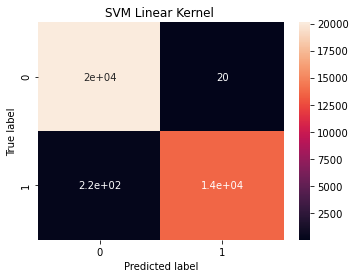

Accuracy: 0.9927900885789117


In [97]:
#Create a svm Classifier
from sklearn.model_selection import cross_val_score
clf = SVC(kernel='rbf')  
#Train the model using the training sets
clf.fit(X_train,y_train)
scores = cross_val_score(clf, X_train,y_train, cv=10)
print(np.mean(scores))
#Predict the response for test dataset
y1_pred = clf.predict(X_test)
 
# Creates a confusion matrix
cm = confusion_matrix(y_test, y1_pred) 
print(cm)
y_train_pred = clf.predict(X_train)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y1_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))


# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Making Prediction 
y2_pred = clf.predict(X_test) 
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

# LogisticRegression Model 

C:\Users\Massi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Massi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[19936   192]
 [  427 13426]]
Training accuracy on selected features: 0.982
Testing accuracy on selected features: 0.982


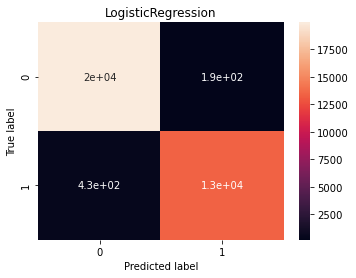

Accuracy: 0.9817839380830464


In [104]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(solver='lbfgs')  

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
y1_pred = clf.predict(X_test)
 
# Creates a confusion matrix
cm = confusion_matrix(y_test, y1_pred) 
print(cm)
y_train_pred = clf.predict(X_train)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y1_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))


# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('LogisticRegression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Making Prediction 
y2_pred = clf.predict(X_test) 
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y2_pred))

# DEEP NEURAL NET ALGORITHM FOR DDOS

In [101]:
# Function to create model, required for KerasClassifier
y_train=y_train.astype('int')
y_test = y_test.astype('int') 
'''X_train = X_train_pca
X_test = X_test_pca'''
def create_model(optimizer='adam', init='normal'):
    reset_random_seeds()
   # create model
    model = Sequential()
    model.add(Dense(6, input_dim=len(X_train.columns), kernel_initializer=initializers.RandomNormal(stddev=0.02),
                    activation='softplus'))
    model.add(Dropout(rate = 0.2) )
    
    model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


Epoch 1/75
7136/7136 [==============================] - 7s 923us/step - loss: 0.2310 - accuracy: 0.9041
Epoch 2/75
7136/7136 [==============================] - 7s 941us/step - loss: 0.0890 - accuracy: 0.9762
Epoch 3/75
7136/7136 [==============================] - 7s 960us/step - loss: 0.0796 - accuracy: 0.9770
Epoch 4/75
7136/7136 [==============================] - 7s 939us/step - loss: 0.0677 - accuracy: 0.9796
Epoch 5/75
7136/7136 [==============================] - 7s 974us/step - loss: 0.0681 - accuracy: 0.9786
Epoch 6/75
7136/7136 [==============================] - 7s 940us/step - loss: 0.0606 - accuracy: 0.9801
Epoch 7/75
7136/7136 [==============================] - 7s 955us/step - loss: 0.0593 - accuracy: 0.9801
Epoch 8/75
7136/7136 [==============================] - 7s 958us/step - loss: 0.0547 - accuracy: 0.9813
Epoch 9/75
7136/7136 [==============================] - 7s 932us/step - loss: 0.0509 - accuracy: 0.9820
Epoch 10/75
7136/7136 [==============================] - 7s 949u

7136/7136 [==============================] - 8s 1ms/step - loss: 0.0615 - accuracy: 0.9796
Epoch 7/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0575 - accuracy: 0.9808
Epoch 8/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0519 - accuracy: 0.9818
Epoch 9/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0508 - accuracy: 0.9818
Epoch 10/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0511 - accuracy: 0.9807
Epoch 11/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0484 - accuracy: 0.9823
Epoch 12/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0472 - accuracy: 0.9822
Epoch 13/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0450 - accuracy: 0.9822
Epoch 14/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0445 - accuracy: 0.9817
Epoch 15/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0424 - ac

7136/7136 [==============================] - 9s 1ms/step - loss: 0.0475 - accuracy: 0.9819
Epoch 13/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0459 - accuracy: 0.9820
Epoch 14/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0447 - accuracy: 0.9818
Epoch 15/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0442 - accuracy: 0.9828
Epoch 16/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0427 - accuracy: 0.9831
Epoch 17/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0420 - accuracy: 0.9826
Epoch 18/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0392 - accuracy: 0.9836
Epoch 19/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0414 - accuracy: 0.9817
Epoch 20/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0395 - accuracy: 0.9832
Epoch 21/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0395 -

7136/7136 [==============================] - 9s 1ms/step - loss: 0.0374 - accuracy: 0.9836
Epoch 19/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0382 - accuracy: 0.9822
Epoch 20/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0384 - accuracy: 0.9828
Epoch 21/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0374 - accuracy: 0.9831
Epoch 22/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0370 - accuracy: 0.9828
Epoch 23/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0373 - accuracy: 0.9833
Epoch 24/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0363 - accuracy: 0.9828
Epoch 25/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0344 - accuracy: 0.9843
Epoch 26/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0336 - accuracy: 0.9828
Epoch 27/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0338 -

7136/7136 [==============================] - 9s 1ms/step - loss: 0.0380 - accuracy: 0.9825
Epoch 25/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0362 - accuracy: 0.9833
Epoch 26/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0365 - accuracy: 0.9796
Epoch 27/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0343 - accuracy: 0.9825
Epoch 28/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0335 - accuracy: 0.9809
Epoch 29/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0327 - accuracy: 0.9825
Epoch 30/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0332 - accuracy: 0.9816
Epoch 31/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0346 - accuracy: 0.9811
Epoch 32/75
7136/7136 [==============================] - 8s 1ms/step - loss: 0.0333 - accuracy: 0.9816
Epoch 33/75
7136/7136 [==============================] - 9s 1ms/step - loss: 0.0322 -

7929/7929 [==============================] - 10s 1ms/step - loss: 0.0312 - accuracy: 0.9805
Epoch 31/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0320 - accuracy: 0.9798
Epoch 32/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0317 - accuracy: 0.9811
Epoch 33/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0335 - accuracy: 0.9810
Epoch 34/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0308 - accuracy: 0.9797
Epoch 35/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0295 - accuracy: 0.9811
Epoch 36/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0320 - accuracy: 0.9811
Epoch 37/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0315 - accuracy: 0.9801
Epoch 38/75
7929/7929 [==============================] - 10s 1ms/step - loss: 0.0293 - accuracy: 0.9814
Epoch 39/75
7929/7929 [==============================] - 14s 2ms/step - loss

C:\Users\Massi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
C:\Users\Massi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training accuracy on selected features: 0.993


C:\Users\Massi\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Testing accuracy on selected features: 0.992
[[20095    33]
 [  238 13615]] 0.9911967933177948 0.0012352975726109539 [0.         0.00163951 1.        ] [0.         0.98281961 1.        ] 0.9905900493536667


Text(0.5, 15.0, 'Predicted label:{0:.3f}')

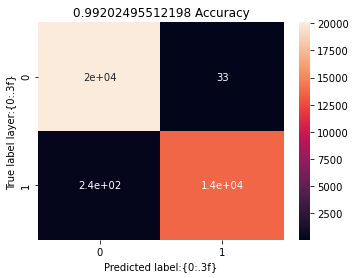

In [102]:

classifier = KerasClassifier(build_fn = create_model, batch_size = 10, epochs = 75)
precisions = cross_val_score(estimator = classifier, X = X_train, y = y_train, 
                             cv = 10, )#n_jobs = -1)
moyenne = precisions.mean() #pour tous les 10 precisions
variance  = precisions.std()

# Predicting the Test set results
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)[0:,1] 
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
y_train_pred = classifier.predict(X_train)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))

y_test_pred = classifier.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))




print(cm,moyenne,variance ,false_positive_rate, true_positive_rate,roc_auc)
cm_df = pd.DataFrame(cm,
                     index = [0,1],
                     columns = [0,1])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)

title = "%s Accuracy" % (accuracy_score(y_test, y_pred))
plt.title(title)
plt.ylabel('True label layer:{0:.3f}')
plt.xlabel('Predicted label:{0:.3f}')
#print(features[i])



# Summary 

Using 50% of the information from the feature selection technique we have an accuracy of around 0.99% for both the artificial neural network and the SVM algorithm. 